In [1]:
import os, sys
euapath = os.getcwd()+'/../cds-backend/code/'
sys.path.append(euapath)
try:
    import cds_eua3 as eua
except:
    print('could not import eua')
    print('please download https://github.com/MBlaschek/CEUAS/blob/master/CEUAS/public/cds-backend/code/cds_eua3.py and save in ', euapath)
    print('or get the whole repository from https://github.com/MBlaschek/CEUAS')

In [2]:
import numpy
import numpy as np
import pandas as pd
import sys, glob
import urllib3
import h5py
import cdsapi, zipfile, os, time
import warnings
import shutil
import xarray
from datetime import date
warnings.filterwarnings('ignore')
# import pycountry
import numba
import copy
import glob
from numba import njit
import pandas
import glob

In [41]:
def request(rqdict):
    data = eua.vm_request_wrapper(rqdict, overwrite=True, vm_url='http://srvx8.img.univie.ac.at:8002').to_dataframe()
    
    return data

In [3]:
def csv_request(rqdict):
    t0 = time.time()

    c = cdsapi.Client()
    r = c.retrieve(
        'insitu-comprehensive-upper-air-observation-network',rqdict)
    if True:
        r.download(target='download.zip')
        assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
#     z = zipfile.ZipFile('download.zip')
#     z.extractall(path='./test_requests/')
#     z.close()
    z = zipfile.ZipFile('download.zip')
    z.extractall(path='./test1/')
    z.close()
    
    files = glob.glob('./test1/*.csv')
    
    data = pd.read_csv(files[0])
    
    os.remove('download.zip')
    for i in files:
        os.remove(i)
    
    return data

In [4]:
def cdmrequest(rqdict):
    t0 = time.time()

    c = cdsapi.Client()
    r = c.retrieve(
        'insitu-comprehensive-upper-air-observation-network',rqdict)
    if True:
        r.download(target='download.zip')
        assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
#     z = zipfile.ZipFile('download.zip')
#     z.extractall(path='./test_requests/')
#     z.close()
    z = zipfile.ZipFile('download.zip')
    z.extractall(path='./test1/')
    z.close()
    
    files = glob.glob('./test1/*.nc')
    
    data = eua.CDMDataset(files[0])
    
    os.remove('download.zip')
    for i in files:
        os.remove(i)
    
    return data

In [5]:
#
# returns the whole dataframe instead of just the first bit whenever there are more files retrieved from the cds
# only relevant, if you would like to have a look at the data
#
def multi_request(rqdict):
    t0 = time.time()

    c = cdsapi.Client()
    r = c.retrieve(
        'insitu-comprehensive-upper-air-observation-network',rqdict)
    if True:
        r.download(target='download.zip')
        assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
#     z = zipfile.ZipFile('download.zip')
#     z.extractall(path='./test_requests/')
#     z.close()
    z = zipfile.ZipFile('download.zip')
    z.extractall(path='./test2/')
    z.close()
    
    datalist = []
    files = glob.glob('./test2/*.nc')
    with eua.CDMDataset(files[0]) as f:
        data = f.to_dataframe()
    if len(files) > 0:
        for i in files[1:]:
            with eua.CDMDataset(i) as f:
                add = f.to_dataframe()
            data = data.append(add, ignore_index=True)
#     if len(files) > 0:
#         for i in range(len(files)):
#             ds = xarray.open_dataset(files[i])            
#             to_be_removed = ['trajectory_index', 'trajectory']
#             for ivar in list(ds.variables):
#                 if 'string' in ivar:
#                     to_be_removed.append(ivar)

#                 if 'trajectory' in ds[ivar].dims and ivar not in list(ds.coords):
#                     report_id = ds[ivar].astype(object).sum(axis=1).astype(str)
#                     ds = ds.drop_vars(ivar)
#                     ds[ivar] = ('obs', report_id.values[ds.trajectory_index.values])  # todo obs ???

#                 if ds[ivar].ndim > 1:
#                     tmp= ds[ivar].astype(object).sum(axis=1).astype(str)
#                     ds = ds.drop_vars(ivar)
#                     idim = tmp.dims[0]
#                     ds[ivar] = (idim, tmp)

#             ds = ds.drop_vars(to_be_removed)
#             data = ds.to_dataframe()
#             datalist.append(data)
#         data = pd.concat(datalist, axis=0)
#     else:
#         files = glob.glob('./test2/*.csv')
#         data = pd.read_csv(files[0])
    
    os.remove('download.zip')
    try:
       shutil.rmtree('./test2/')
    except:
       print('Error while deleting directory')
    
    return data

In [35]:
data = eua.vm_request_wrapper({'variable':'temperature', 'area':['50','15','40','20'], 'date':['20190101','20190110'], 'cdm':'observations_table/data_policy_licence'}, overwrite=True, vm_url='http://srvx8.img.univie.ac.at:8000')


In [32]:
data = eua.vm_request_wrapper({'variable':'temperature', 'statid':'10393', 'date':['19000101','20201231'], 'cdm':'observations_table/data_policy_licence'}, overwrite=True, vm_url='http://srvx8.img.univie.ac.at:8000').to_dataframe()
data

,data_policy_licence,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,0,52.216702,14.1167,20000.0,30000000001,LINDENBERG (10393-1),211.350006,1905-04-04 06:00:00,nnnnnnnnnnn
1,0,52.216702,14.1167,25000.0,30000000001,LINDENBERG (10393-1),220.649994,1905-04-04 06:00:00,nnnnnnnnnnn
2,0,52.216702,14.1167,30000.0,30000000001,LINDENBERG (10393-1),228.449997,1905-04-04 06:00:00,nnnnnnnnnnn
3,0,52.216702,14.1167,40000.0,30000000001,LINDENBERG (10393-1),241.649994,1905-04-04 06:00:00,nnnnnnnnnnn
4,0,52.216702,14.1167,50000.0,30000000001,LINDENBERG (10393-1),254.850006,1905-04-04 06:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
35470877,0,52.220001,14.1200,92500.0,40102054687,LINDENBERG (10393-1),273.250000,2020-12-31 22:00:00,nnnnnnnnnnn
35470878,0,52.220001,14.1200,94300.0,40102054687,LINDENBERG (10393-1),274.250000,2020-12-31 22:00:00,nnnnnnnnnnn
35470879,0,52.220001,14.1200,96900.0,40102054687,LINDENBERG (10393-1),275.250000,2020-12-31 22:00:00,nnnnnnnnnnn
35470880,0,52.220001,14.1200,99100.0,40102054687,LINDENBERG (10393-1),272.549988,2020-12-31 22:00:00,nnnnnnnnnnn


In [31]:
data[data.time > '2019-09']

,data_policy_licence,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
3289645,0,48.248951,16.35688,480.0,10000055022,WIEN/HOHE WARTE (11035-1),241.119995,2019-09-01 11:31:01,nnnnnnnnnnn
3289646,0,48.248951,16.35688,490.0,10000055022,WIEN/HOHE WARTE (11035-1),241.169998,2019-09-01 11:31:01,nnnnnnnnnnn
3289647,0,48.248951,16.35688,500.0,10000055022,WIEN/HOHE WARTE (11035-1),241.220001,2019-09-01 11:31:01,nnnnnnnnnnn
3289648,0,48.248951,16.35688,510.0,10000055022,WIEN/HOHE WARTE (11035-1),240.699997,2019-09-01 11:31:01,nnnnnnnnnnn
3289649,0,48.248951,16.35688,520.0,10000055022,WIEN/HOHE WARTE (11035-1),239.639999,2019-09-01 11:31:01,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
6348029,4,48.248951,16.35718,98130.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn
6348030,4,48.248951,16.35718,98190.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn
6348031,4,48.248951,16.35718,98210.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn
6348032,4,48.248951,16.35718,98240.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn


In [33]:
data[~ np.isnan(data.ta)]

,data_policy_licence,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,0,52.216702,14.1167,20000.0,30000000001,LINDENBERG (10393-1),211.350006,1905-04-04 06:00:00,nnnnnnnnnnn
1,0,52.216702,14.1167,25000.0,30000000001,LINDENBERG (10393-1),220.649994,1905-04-04 06:00:00,nnnnnnnnnnn
2,0,52.216702,14.1167,30000.0,30000000001,LINDENBERG (10393-1),228.449997,1905-04-04 06:00:00,nnnnnnnnnnn
3,0,52.216702,14.1167,40000.0,30000000001,LINDENBERG (10393-1),241.649994,1905-04-04 06:00:00,nnnnnnnnnnn
4,0,52.216702,14.1167,50000.0,30000000001,LINDENBERG (10393-1),254.850006,1905-04-04 06:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
35470877,0,52.220001,14.1200,92500.0,40102054687,LINDENBERG (10393-1),273.250000,2020-12-31 22:00:00,nnnnnnnnnnn
35470878,0,52.220001,14.1200,94300.0,40102054687,LINDENBERG (10393-1),274.250000,2020-12-31 22:00:00,nnnnnnnnnnn
35470879,0,52.220001,14.1200,96900.0,40102054687,LINDENBERG (10393-1),275.250000,2020-12-31 22:00:00,nnnnnnnnnnn
35470880,0,52.220001,14.1200,99100.0,40102054687,LINDENBERG (10393-1),272.549988,2020-12-31 22:00:00,nnnnnnnnnnn


In [22]:
data[data.time == '2020-12-31 11:30:10'].plev.drop_duplicates()

6010901      690.0
6010902      700.0
6010903      710.0
6010904      720.0
6010905      730.0
            ...   
6014462    98130.0
6014463    98190.0
6014464    98210.0
6014465    98240.0
6014466    98320.0
Name: plev, Length: 3566, dtype: float32

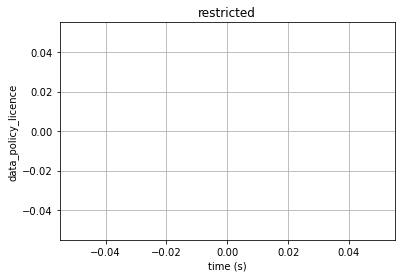

In [17]:
cdata = data[data.time == '2020-12-31 11:30:10']
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
ax.scatter(cdata.ta, cdata.plev)

ax.set(xlabel='time (s)', ylabel='data_policy_licence',
       title='restricted')
ax.grid()

fig.savefig("test.png")
plt.show()

In [7]:
data.z_coordinate_type.drop_duplicates()

0    1
Name: z_coordinate_type, dtype: int32

In [4]:
data[data.data_policy_licence != 4]

,data_policy_licence,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,0,48.250000,16.370001,900.0,20000016750,WIEN/HOHE WARTE (11035-1),231.300003,1970-01-01 00:00:00,nnnnnnnnnnn
1,0,48.250000,16.370001,1000.0,20000016750,WIEN/HOHE WARTE (11035-1),226.500000,1970-01-01 00:00:00,nnnnnnnnnnn
2,0,48.250000,16.370001,1100.0,20000016750,WIEN/HOHE WARTE (11035-1),222.100006,1970-01-01 00:00:00,nnnnnnnnnnn
3,0,48.250000,16.370001,2000.0,20000016750,WIEN/HOHE WARTE (11035-1),212.300003,1970-01-01 00:00:00,nnnnnnnnnnn
4,0,48.250000,16.370001,2100.0,20000016750,WIEN/HOHE WARTE (11035-1),212.899994,1970-01-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
3023388,0,48.248951,16.357180,87980.0,10000055084,WIEN/HOHE WARTE (11035-1),282.140015,2019-09-30 23:30:11,nnnnnnnnnnn
3023389,0,48.248951,16.357180,89460.0,10000055084,WIEN/HOHE WARTE (11035-1),283.119995,2019-09-30 23:30:11,nnnnnnnnnnn
3023390,0,48.248951,16.357180,92500.0,10000055084,WIEN/HOHE WARTE (11035-1),285.239990,2019-09-30 23:30:11,nnnnnnnnnnn
3023391,0,48.248951,16.357180,96020.0,10000055084,WIEN/HOHE WARTE (11035-1),287.859985,2019-09-30 23:30:11,nnnnnnnnnnn


In [5]:
data[data.data_policy_licence == 4]

,data_policy_licence,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
102404,4,48.250000,16.370001,800.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1973-12-27 12:00:00,nnnnnnnnnnn
102405,4,48.250000,16.370001,1000.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1973-12-27 12:00:00,nnnnnnnnnnn
102406,4,48.250000,16.370001,1400.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1973-12-27 12:00:00,nnnnnnnnnnn
102407,4,48.250000,16.370001,1800.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1973-12-27 12:00:00,nnnnnnnnnnn
102408,4,48.250000,16.370001,2000.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1973-12-27 12:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
6014462,4,48.248951,16.357180,98130.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn
6014463,4,48.248951,16.357180,98190.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn
6014464,4,48.248951,16.357180,98210.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn
6014465,4,48.248951,16.357180,98240.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn


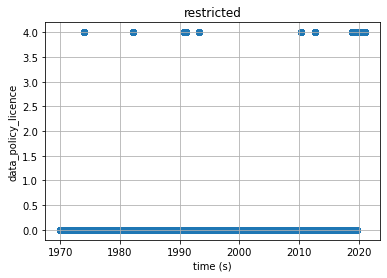

In [8]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
ax.scatter(data.time, data.data_policy_licence)

ax.set(xlabel='time (s)', ylabel='data_policy_licence',
       title='restricted')
ax.grid()

fig.savefig("test.png")
plt.show()

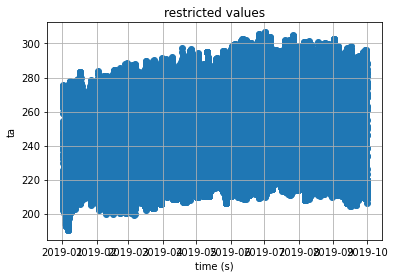

In [12]:
cdata = data[data.time > '2019']
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
ax.scatter(cdata.time, cdata.ta)

ax.set(xlabel='time (s)', ylabel='ta',
       title='restricted values')
ax.grid()

fig.savefig("test.png")
plt.show()

In [10]:
vd = eua.CDMDataset(glob.glob('/raid60/scratch/leo/scratch/converted_v7/*11035*')[0])
vd

File: <HDF5 file "0-20001-0-11035_CEUAS_merged_v1.nc" (mode r)>
Permissions: R (mblaschek)
Filesize: 1732.83 MB
Filename: /raid60/scratch/leo/scratch/converted_v7/0-20001-0-11035_CEUAS_merged_v1.nc
(G)roups/(V)ariables: 

 - G | advanced_homogenisation______________________ : : 6
 - G | crs__________________________________________ : : 4
 - V | dateindex____________________________________ : : (27738,)
 - G | era5fb_______________________________________ : : 72
 - G | header_table_________________________________ : : 56
 - G | observations_table___________________________ : : 50
 - G | observed_variable____________________________ : : 9
 - G | recordindices________________________________ : : 18
 - G | sensor_configuration_________________________ : : 12
 - G | source_configuration_________________________ : : 2
 - G | station_configuration________________________ : : 46
 - G | station_configuration_codes__________________ : : 7
 - G | station_type_________________________________ : : 

In [12]:
vd.recordindices['85'][:]

array([22716742, 22716742, 22716742, ..., 29056825, 29061210, 29064776])

In [13]:
vd.observations_table.observation_value[22716742:29064776]

array([220.75, 220.55, 216.25, ..., 278.95, 278.94, 279.11], dtype=float32)

In [14]:
vd.observations_table.data_policy_licence[22716742:29064776]

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

In [7]:
def test_statid():
    log = []
    log.append('\n\n---STATID---')
    cachworkaround = np.random.random_sample()
    for s in [None, 'all', 11035, '11035', '0-20001-0-11035', '0-20100-0-00701','11*', '1103*', '0-20100*', ['11035', 10393], ['0-20001-0-11035', '0-20001-0-10393']]:
        print('statid - testing: ', s)
        rd={
            'variable':'temperature',
            'statid':s,
            'date': '19781001-19781031',
            'cachworkaround': cachworkaround,
        } 
        try:
            print(rd)
            display(request(rd))
            log.append('\n1 request successful: ' + str(s))
        except Exception as e:
            print(e)
            log.append('\n0 request failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
            
    for s in ['110350', '1103', '0-20000-0-1103', '0-20000-0-110350']:
        print('statid - testing: ', s)
        rd={
            'variable':'temperature',
            'statid':s,
            'date': '19781001-19781031',
            'cachworkaround': cachworkaround,
        }
        try: 
            print(rd)
            display(request(rd))
            log.append('\n0 request falsely successful: ' + str(s))
        except Exception as e:
            print(e)
            log.append('\n1 request successfully failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
            
    print('statid - testing: finished')
    return log

In [8]:
test_statid()

VM Request failed {'variable': 'temperature', 'statid': None, 'date': '19781001-19781031', 'cachworkaround': 0.14966847486411372}


statid - testing:  None
{'variable': 'temperature', 'statid': None, 'date': '19781001-19781031', 'cachworkaround': 0.14966847486411372}
"No matching data found"
statid - testing:  all
{'variable': 'temperature', 'statid': 'all', 'date': '19781001-19781031', 'cachworkaround': 0.14966847486411372}


VM Request failed {'variable': 'temperature', 'statid': 'all', 'date': '19781001-19781031', 'cachworkaround': 0.14966847486411372}
VM Request failed {'variable': 'temperature', 'statid': 11035, 'date': '19781001-19781031', 'cachworkaround': 0.14966847486411372}


"No matching data found"
statid - testing:  11035
{'variable': 'temperature', 'statid': 11035, 'date': '19781001-19781031', 'cachworkaround': 0.14966847486411372}
"Invalid selection, specify either bbox, country or statid. Use \"statid\":\"all\" to select all stations "
statid - testing:  11035
{'variable': 'temperature', 'statid': '11035', 'date': '19781001-19781031', 'cachworkaround': 0.14966847486411372}


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,1800.0,20000028816,WIEN/HOHE WARTE (11035-1),218.899994,1978-10-01 00:00:00,nnnnnnnnnnn
1,48.25,16.370001,2000.0,20000028816,WIEN/HOHE WARTE (11035-1),218.500000,1978-10-01 00:00:00,nnnnnnnnnnn
2,48.25,16.370001,3000.0,20000028816,WIEN/HOHE WARTE (11035-1),216.899994,1978-10-01 00:00:00,nnnnnnnnnnn
3,48.25,16.370001,3200.0,20000028816,WIEN/HOHE WARTE (11035-1),216.699997,1978-10-01 00:00:00,nnnnnnnnnnn
4,48.25,16.370001,3700.0,20000028816,WIEN/HOHE WARTE (11035-1),218.500000,1978-10-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
2095,48.25,16.370001,50000.0,20000029118,WIEN/HOHE WARTE (11035-1),254.750000,1978-10-31 12:00:00,nnnnnnnnnnn
2096,48.25,16.370001,70000.0,20000029118,WIEN/HOHE WARTE (11035-1),274.549988,1978-10-31 12:00:00,nnnnnnnnnnn
2097,48.25,16.370001,85000.0,20000029118,WIEN/HOHE WARTE (11035-1),274.649994,1978-10-31 12:00:00,nnnnnnnnnnn
2098,48.25,16.370001,92500.0,20000029118,WIEN/HOHE WARTE (11035-1),280.149994,1978-10-31 12:00:00,nnnnnnnnnnn


statid - testing:  0-20001-0-11035
{'variable': 'temperature', 'statid': '0-20001-0-11035', 'date': '19781001-19781031', 'cachworkaround': 0.14966847486411372}


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,1800.0,20000028816,WIEN/HOHE WARTE (11035-1),218.899994,1978-10-01 00:00:00,nnnnnnnnnnn
1,48.25,16.370001,2000.0,20000028816,WIEN/HOHE WARTE (11035-1),218.500000,1978-10-01 00:00:00,nnnnnnnnnnn
2,48.25,16.370001,3000.0,20000028816,WIEN/HOHE WARTE (11035-1),216.899994,1978-10-01 00:00:00,nnnnnnnnnnn
3,48.25,16.370001,3200.0,20000028816,WIEN/HOHE WARTE (11035-1),216.699997,1978-10-01 00:00:00,nnnnnnnnnnn
4,48.25,16.370001,3700.0,20000028816,WIEN/HOHE WARTE (11035-1),218.500000,1978-10-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
2095,48.25,16.370001,50000.0,20000029118,WIEN/HOHE WARTE (11035-1),254.750000,1978-10-31 12:00:00,nnnnnnnnnnn
2096,48.25,16.370001,70000.0,20000029118,WIEN/HOHE WARTE (11035-1),274.549988,1978-10-31 12:00:00,nnnnnnnnnnn
2097,48.25,16.370001,85000.0,20000029118,WIEN/HOHE WARTE (11035-1),274.649994,1978-10-31 12:00:00,nnnnnnnnnnn
2098,48.25,16.370001,92500.0,20000029118,WIEN/HOHE WARTE (11035-1),280.149994,1978-10-31 12:00:00,nnnnnnnnnnn


statid - testing:  0-20100-0-00701
{'variable': 'temperature', 'statid': '0-20100-0-00701', 'date': '19781001-19781031', 'cachworkaround': 0.14966847486411372}


,lat,lon,plev,report_id,ta,time,trajectory_label
0,46.811578,6.942472,3000.0,0-20100-0-00701-001,213.35,1978-10-10 10:59:12,nnnnnnnnnnnnnnnnnnn
1,46.811578,6.942472,5000.0,0-20100-0-00701-001,210.85,1978-10-10 10:50:24,nnnnnnnnnnnnnnnnnnn
2,46.811578,6.942472,7000.0,0-20100-0-00701-001,209.15,1978-10-10 10:44:42,nnnnnnnnnnnnnnnnnnn
3,46.811578,6.942472,10000.0,0-20100-0-00701-001,207.85,1978-10-10 10:38:54,nnnnnnnnnnnnnnnnnnn
4,46.811578,6.942472,15000.0,0-20100-0-00701-001,205.55,1978-10-10 10:30:18,nnnnnnnnnnnnnnnnnnn
...,...,...,...,...,...,...,...
584,46.811578,6.942472,40000.0,0-20100-0-00701-055,245.25,1978-10-31 10:10:30,nnnnnnnnnnnnnnnnnnn
585,46.811578,6.942472,50000.0,0-20100-0-00701-055,257.05,1978-10-31 10:04:42,nnnnnnnnnnnnnnnnnnn
586,46.811578,6.942472,70000.0,0-20100-0-00701-055,275.15,1978-10-31 09:55:06,nnnnnnnnnnnnnnnnnnn
587,46.811578,6.942472,85000.0,0-20100-0-00701-055,283.65,1978-10-31 09:48:54,nnnnnnnnnnnnnnnnnnn


statid - testing:  11*
{'variable': 'temperature', 'statid': '11*', 'date': '19781001-19781031', 'cachworkaround': 0.14966847486411372}
'CDMDatasetList' object has no attribute 'to_dataframe'
statid - testing:  1103*
{'variable': 'temperature', 'statid': '1103*', 'date': '19781001-19781031', 'cachworkaround': 0.14966847486411372}


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,1800.0,20000028816,WIEN/HOHE WARTE (11035-1),218.899994,1978-10-01 00:00:00,nnnnnnnnnnn
1,48.25,16.370001,2000.0,20000028816,WIEN/HOHE WARTE (11035-1),218.500000,1978-10-01 00:00:00,nnnnnnnnnnn
2,48.25,16.370001,3000.0,20000028816,WIEN/HOHE WARTE (11035-1),216.899994,1978-10-01 00:00:00,nnnnnnnnnnn
3,48.25,16.370001,3200.0,20000028816,WIEN/HOHE WARTE (11035-1),216.699997,1978-10-01 00:00:00,nnnnnnnnnnn
4,48.25,16.370001,3700.0,20000028816,WIEN/HOHE WARTE (11035-1),218.500000,1978-10-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
2095,48.25,16.370001,50000.0,20000029118,WIEN/HOHE WARTE (11035-1),254.750000,1978-10-31 12:00:00,nnnnnnnnnnn
2096,48.25,16.370001,70000.0,20000029118,WIEN/HOHE WARTE (11035-1),274.549988,1978-10-31 12:00:00,nnnnnnnnnnn
2097,48.25,16.370001,85000.0,20000029118,WIEN/HOHE WARTE (11035-1),274.649994,1978-10-31 12:00:00,nnnnnnnnnnn
2098,48.25,16.370001,92500.0,20000029118,WIEN/HOHE WARTE (11035-1),280.149994,1978-10-31 12:00:00,nnnnnnnnnnn


statid - testing:  0-20100*
{'variable': 'temperature', 'statid': '0-20100*', 'date': '19781001-19781031', 'cachworkaround': 0.14966847486411372}


VM Request failed {'variable': 'temperature', 'statid': '0-20100*', 'date': '19781001-19781031', 'cachworkaround': 0.14966847486411372}
VM Request failed {'variable': 'temperature', 'statid': ['11035', 10393], 'date': '19781001-19781031', 'cachworkaround': 0.14966847486411372}


"No matching data found"
statid - testing:  ['11035', 10393]
{'variable': 'temperature', 'statid': ['11035', 10393], 'date': '19781001-19781031', 'cachworkaround': 0.14966847486411372}
"Invalid selection, specify either bbox, country or statid. Use \"statid\":\"all\" to select all stations "
statid - testing:  ['0-20001-0-11035', '0-20001-0-10393']
{'variable': 'temperature', 'statid': ['0-20001-0-11035', '0-20001-0-10393'], 'date': '19781001-19781031', 'cachworkaround': 0.14966847486411372}


VM Request failed {'variable': 'temperature', 'statid': '110350', 'date': '19781001-19781031', 'cachworkaround': 0.14966847486411372}
VM Request failed {'variable': 'temperature', 'statid': '1103', 'date': '19781001-19781031', 'cachworkaround': 0.14966847486411372}
VM Request failed {'variable': 'temperature', 'statid': '0-20000-0-1103', 'date': '19781001-19781031', 'cachworkaround': 0.14966847486411372}
VM Request failed {'variable': 'temperature', 'statid': '0-20000-0-110350', 'date': '19781001-19781031', 'cachworkaround': 0.14966847486411372}


'CDMDatasetList' object has no attribute 'to_dataframe'
statid - testing:  110350
{'variable': 'temperature', 'statid': '110350', 'date': '19781001-19781031', 'cachworkaround': 0.14966847486411372}
"Invalid selection, specify either bbox, country or statid. Use \"statid\":\"all\" to select all stations "
statid - testing:  1103
{'variable': 'temperature', 'statid': '1103', 'date': '19781001-19781031', 'cachworkaround': 0.14966847486411372}
"Invalid selection, specify either bbox, country or statid. Use \"statid\":\"all\" to select all stations "
statid - testing:  0-20000-0-1103
{'variable': 'temperature', 'statid': '0-20000-0-1103', 'date': '19781001-19781031', 'cachworkaround': 0.14966847486411372}
"Invalid selection, specify either bbox, country or statid. Use \"statid\":\"all\" to select all stations "
statid - testing:  0-20000-0-110350
{'variable': 'temperature', 'statid': '0-20000-0-110350', 'date': '19781001-19781031', 'cachworkaround': 0.14966847486411372}
"Invalid selection, 

['\n\n---STATID---',
 '\n0 request failed: None\n     "No matching data found"',
 '\n0 request failed: all\n     "No matching data found"',
 '\n0 request failed: 11035\n     "Invalid selection, specify either bbox, country or statid. Use \\"statid\\":\\"all\\" to select all stations "',
 '\n1 request successful: 11035',
 '\n1 request successful: 0-20001-0-11035',
 '\n1 request successful: 0-20100-0-00701',
 "\n0 request failed: 11*\n     'CDMDatasetList' object has no attribute 'to_dataframe'",
 '\n1 request successful: 1103*',
 '\n0 request failed: 0-20100*\n     "No matching data found"',
 '\n0 request failed: [\'11035\', 10393]\n     "Invalid selection, specify either bbox, country or statid. Use \\"statid\\":\\"all\\" to select all stations "',
 "\n0 request failed: ['0-20001-0-11035', '0-20001-0-10393']\n     'CDMDatasetList' object has no attribute 'to_dataframe'",
 '\n1 request successfully failed: 110350\n     "Invalid selection, specify either bbox, country or statid. Use \\"s

In [7]:
def test_variable():
    log = []
    log.append('\n\n---VARIABLE---')
    cachworkaround = np.random.random_sample()
    for s in ['temperature','dew_point_temperature', 'u_component_of_wind', 'v_component_of_wind', 'relative_humidity', 'specific_humidity', 'wind_direction', 'wind_speed', 'geopotential']:
        print('variable - testing: ', s)
        rd={
            'variable': s,
            'statid': '11035',
            'date': '20150101-20150131',
            'cachworkaround': cachworkaround,
        } 
        try:
            display(request(rd))
            log.append('\n1 request successful: ' + str(s))
        except Exception as e:
            log.append('\n0 request failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
            
    for s in ['temperature', 'dew_point', 'wind', 'humidity', 'sonde_type']:
        print('variable - testing: ', s)
        rd={
            'variable': s,
            'statid': '11035',
            'date': '20150101-20150131',
            'cachworkaround': cachworkaround,
        } 
        try: 
            display(request(rd))
            log.append('\n0 request falsely successful: ' + str(s))
        except Exception as e:
            print(e)
            log.append('\n1 request successfully failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
            
    print('variable - testing: finished')
    return log

In [8]:
test_variable()

variable - testing:  temperature


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.250000,16.360001,910.0,10000051065,WIEN/HOHE WARTE (11035-1),214.899994,2015-01-01 12:00:00,nnnnnnnnnnn
1,48.250000,16.360001,980.0,10000051065,WIEN/HOHE WARTE (11035-1),215.899994,2015-01-01 12:00:00,nnnnnnnnnnn
2,48.250000,16.360001,1000.0,10000051065,WIEN/HOHE WARTE (11035-1),215.300003,2015-01-01 12:00:00,nnnnnnnnnnn
3,48.250000,16.360001,1120.0,10000051065,WIEN/HOHE WARTE (11035-1),215.100006,2015-01-01 12:00:00,nnnnnnnnnnn
4,48.250000,16.360001,1190.0,10000051065,WIEN/HOHE WARTE (11035-1),209.699997,2015-01-01 12:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
6031,48.248901,16.357300,85250.0,10000051145,WIEN/HOHE WARTE (11035-1),271.470001,2015-01-31 23:30:09,nnnnnnnnnnn
6032,48.248901,16.357300,85540.0,10000051145,WIEN/HOHE WARTE (11035-1),271.690002,2015-01-31 23:30:09,nnnnnnnnnnn
6033,48.248901,16.357300,91660.0,10000051145,WIEN/HOHE WARTE (11035-1),273.670013,2015-01-31 23:30:09,nnnnnnnnnnn
6034,48.248901,16.357300,92500.0,10000051145,WIEN/HOHE WARTE (11035-1),273.089996,2015-01-31 23:30:09,nnnnnnnnnnn


variable - testing:  dew_point_temperature


,dew_point_temperature,lat,lon,plev,report_id,station_id,time,trajectory_label
0,187.899994,48.250000,16.360001,910.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn
1,187.899994,48.250000,16.360001,980.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn
2,187.300003,48.250000,16.360001,1000.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn
3,187.100006,48.250000,16.360001,1120.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn
4,184.699997,48.250000,16.360001,1190.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
6021,260.730011,48.248901,16.357300,85250.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn
6022,260.910004,48.248901,16.357300,85540.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn
6023,265.450012,48.248901,16.357300,91660.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn
6024,268.019989,48.248901,16.357300,92500.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn


variable - testing:  u_component_of_wind


,lat,lon,plev,report_id,station_id,time,trajectory_label,ua
0,48.250000,16.360001,910.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn,27.712812
1,48.250000,16.360001,970.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn,29.908157
2,48.250000,16.360001,1000.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn,29.001850
3,48.250000,16.360001,1080.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn,26.282927
4,48.250000,16.360001,1150.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn,14.912988
...,...,...,...,...,...,...,...,...
6455,48.248901,16.357300,85540.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn,0.881049
6456,48.248901,16.357300,91660.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn,-1.667180
6457,48.248901,16.357300,92500.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn,-1.180919
6458,48.248901,16.357300,94490.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn,-0.985890


variable - testing:  v_component_of_wind


,lat,lon,plev,report_id,station_id,time,trajectory_label,va
0,48.250000,16.360001,910.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn,-16.000000
1,48.250000,16.360001,970.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn,-13.946403
2,48.250000,16.360001,1000.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn,-13.523785
3,48.250000,16.360001,1080.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn,-12.255930
4,48.250000,16.360001,1150.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn,-21.297953
...,...,...,...,...,...,...,...,...
6455,48.248901,16.357300,85540.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn,1.088004
6456,48.248901,16.357300,91660.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn,1.726416
6457,48.248901,16.357300,92500.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn,1.222878
6458,48.248901,16.357300,94490.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn,1.854190


variable - testing:  relative_humidity


,hur,lat,lon,plev,report_id,station_id,time,trajectory_label
0,0.018269,48.250000,16.360001,910.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn
1,0.016112,48.250000,16.360001,980.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn
2,0.015643,48.250000,16.360001,1000.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn
3,0.015489,48.250000,16.360001,1120.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn
4,0.020350,48.250000,16.360001,1190.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
6021,0.436792,48.248901,16.357300,85250.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn
6022,0.436065,48.248901,16.357300,85540.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn
6023,0.540391,48.248901,16.357300,91660.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn
6024,0.686344,48.248901,16.357300,92500.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn


variable - testing:  specific_humidity


,hus,lat,lon,plev,report_id,station_id,time,trajectory_label
0,0.000029,48.250000,16.360001,910.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn
1,0.000027,48.250000,16.360001,980.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn
2,0.000024,48.250000,16.360001,1000.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn
3,0.000020,48.250000,16.360001,1120.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn
4,0.000012,48.250000,16.360001,1190.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
6086,0.001742,48.248901,16.357300,85540.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn
6087,0.002329,48.248901,16.357300,91660.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn
6088,0.002811,48.248901,16.357300,92500.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn
6089,0.003221,48.248901,16.357300,94490.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn


variable - testing:  wind_direction


,lat,lon,plev,report_id,station_id,time,trajectory_label,wind_from_direction
0,48.250000,16.360001,910.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn,120.000000
1,48.250000,16.360001,970.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn,115.000015
2,48.250000,16.360001,1000.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn,115.000015
3,48.250000,16.360001,1080.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn,115.000015
4,48.250000,16.360001,1150.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn,145.000000
...,...,...,...,...,...,...,...,...
6455,48.248901,16.357300,85540.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn,39.000000
6456,48.248901,16.357300,91660.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn,316.000000
6457,48.248901,16.357300,92500.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn,316.000000
6458,48.248901,16.357300,94490.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn,332.000000


variable - testing:  wind_speed


,lat,lon,plev,report_id,station_id,time,trajectory_label,wind_speed
0,48.250000,16.360001,910.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn,32.0
1,48.250000,16.360001,970.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn,33.0
2,48.250000,16.360001,1000.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn,32.0
3,48.250000,16.360001,1080.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn,29.0
4,48.250000,16.360001,1150.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn,26.0
...,...,...,...,...,...,...,...,...
6455,48.248901,16.357300,85540.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn,1.4
6456,48.248901,16.357300,91660.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn,2.4
6457,48.248901,16.357300,92500.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn,1.7
6458,48.248901,16.357300,94490.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn,2.1


variable - testing:  geopotential


,geopotential,lat,lon,plev,report_id,station_id,time,trajectory_label
0,297240.000000,48.250000,16.360001,1000.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn
1,277680.000000,48.250000,16.360001,1380.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn
2,269280.000000,48.250000,16.360001,1590.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn
3,262280.000000,48.250000,16.360001,1790.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn
4,255760.000000,48.250000,16.360001,2000.0,10000051065,WIEN/HOHE WARTE (11035-1),2015-01-01 12:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
6077,6089.929688,48.248901,16.357300,91660.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn
6078,5374.044434,48.248901,16.357300,92500.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn
6079,3706.913818,48.248901,16.357300,94490.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn
6080,1961.329956,48.248901,16.357300,96620.0,10000051145,WIEN/HOHE WARTE (11035-1),2015-01-31 23:30:09,nnnnnnnnnnn


variable - testing:  temperature


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.250000,16.360001,910.0,10000051065,WIEN/HOHE WARTE (11035-1),214.899994,2015-01-01 12:00:00,nnnnnnnnnnn
1,48.250000,16.360001,980.0,10000051065,WIEN/HOHE WARTE (11035-1),215.899994,2015-01-01 12:00:00,nnnnnnnnnnn
2,48.250000,16.360001,1000.0,10000051065,WIEN/HOHE WARTE (11035-1),215.300003,2015-01-01 12:00:00,nnnnnnnnnnn
3,48.250000,16.360001,1120.0,10000051065,WIEN/HOHE WARTE (11035-1),215.100006,2015-01-01 12:00:00,nnnnnnnnnnn
4,48.250000,16.360001,1190.0,10000051065,WIEN/HOHE WARTE (11035-1),209.699997,2015-01-01 12:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
6031,48.248901,16.357300,85250.0,10000051145,WIEN/HOHE WARTE (11035-1),271.470001,2015-01-31 23:30:09,nnnnnnnnnnn
6032,48.248901,16.357300,85540.0,10000051145,WIEN/HOHE WARTE (11035-1),271.690002,2015-01-31 23:30:09,nnnnnnnnnnn
6033,48.248901,16.357300,91660.0,10000051145,WIEN/HOHE WARTE (11035-1),273.670013,2015-01-31 23:30:09,nnnnnnnnnnn
6034,48.248901,16.357300,92500.0,10000051145,WIEN/HOHE WARTE (11035-1),273.089996,2015-01-31 23:30:09,nnnnnnnnnnn


VM Request failed {'variable': 'dew_point', 'statid': '11035', 'date': '20150101-20150131', 'cachworkaround': 0.5992970508880893}
VM Request failed {'variable': 'wind', 'statid': '11035', 'date': '20150101-20150131', 'cachworkaround': 0.5992970508880893}
VM Request failed {'variable': 'humidity', 'statid': '11035', 'date': '20150101-20150131', 'cachworkaround': 0.5992970508880893}
VM Request failed {'variable': 'sonde_type', 'statid': '11035', 'date': '20150101-20150131', 'cachworkaround': 0.5992970508880893}


variable - testing:  dew_point
"Invalid variable selected: dew_point"
variable - testing:  wind
"Invalid variable selected: wind"
variable - testing:  humidity
"Invalid variable selected: humidity"
variable - testing:  sonde_type
"Invalid variable selected: sonde_type"
variable - testing: finished


['\n\n---VARIABLE---',
 '\n1 request successful: temperature',
 '\n1 request successful: dew_point_temperature',
 '\n1 request successful: u_component_of_wind',
 '\n1 request successful: v_component_of_wind',
 '\n1 request successful: relative_humidity',
 '\n1 request successful: specific_humidity',
 '\n1 request successful: wind_direction',
 '\n1 request successful: wind_speed',
 '\n1 request successful: geopotential',
 '\n0 request falsely successful: temperature',
 '\n1 request successfully failed: dew_point\n     "Invalid variable selected: dew_point"',
 '\n1 request successfully failed: wind\n     "Invalid variable selected: wind"',
 '\n1 request successfully failed: humidity\n     "Invalid variable selected: humidity"',
 '\n1 request successfully failed: sonde_type\n     "Invalid variable selected: sonde_type"']

In [9]:
def test_optional():
    log = []
    log.append('\n\n---OPTIONAL---')
    cachworkaround = np.random.random_sample()
    for s in ['sonde_type', 'bias_estimate', 'obs_minus_an', 'obs_minus_bg']:
        print('optional - testing: ', s)
        rd={
            'variable': 'temperature',
            'statid': ['11035'], # '0-20100-0-00701'],
            'date': '19781001-19781031',
            'optional': s,
            'cachworkaround': cachworkaround,
        } 
        try:
            display(request(rd))
            log.append('\n1 request successful: ' + str(s))
        except Exception as e:
            log.append('\n0 request failed: ' + str(s)+ ' - ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
            
    for s in ['sonde', 'air_temperature', 'dew_point_temperature']:
        print('optional - testing: ', s)
        rd={
            'variable': 'temperature',
            'statid': ['11035'],# '0-20100-0-00701'],
            'date': '19781001-19781031',
            'optional': s,
            'cachworkaround': cachworkaround,
        } 
        try: 
            display(request(rd))
            log.append('\n0 request falsely successful: ' + str(s))
        except Exception as e:
            print(e)
            log.append('\n1 request successfully failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
            
    print('optional - testing: finished')
    return log

In [10]:
test_optional()

optional - testing:  sonde_type


,lat,lon,plev,report_id,sonde_type,station_id,ta,time,trajectory_label
0,48.25,16.370001,1800.0,20000028816,Z0m,WIEN/HOHE WARTE (11035-1),218.899994,1978-10-01 00:00:00,nnnnnnnnnnn
1,48.25,16.370001,2000.0,20000028816,Z0m,WIEN/HOHE WARTE (11035-1),218.500000,1978-10-01 00:00:00,nnnnnnnnnnn
2,48.25,16.370001,3000.0,20000028816,Z0m,WIEN/HOHE WARTE (11035-1),216.899994,1978-10-01 00:00:00,nnnnnnnnnnn
3,48.25,16.370001,3200.0,20000028816,Z0m,WIEN/HOHE WARTE (11035-1),216.699997,1978-10-01 00:00:00,nnnnnnnnnnn
4,48.25,16.370001,3700.0,20000028816,Z0m,WIEN/HOHE WARTE (11035-1),218.500000,1978-10-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
2095,48.25,16.370001,50000.0,20000029118,Z0m,WIEN/HOHE WARTE (11035-1),254.750000,1978-10-31 12:00:00,nnnnnnnnnnn
2096,48.25,16.370001,70000.0,20000029118,Z0m,WIEN/HOHE WARTE (11035-1),274.549988,1978-10-31 12:00:00,nnnnnnnnnnn
2097,48.25,16.370001,85000.0,20000029118,Z0m,WIEN/HOHE WARTE (11035-1),274.649994,1978-10-31 12:00:00,nnnnnnnnnnn
2098,48.25,16.370001,92500.0,20000029118,Z0m,WIEN/HOHE WARTE (11035-1),280.149994,1978-10-31 12:00:00,nnnnnnnnnnn


optional - testing:  bias_estimate


,bias_estimate,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,-2.102900,48.25,16.370001,1800.0,20000028816,WIEN/HOHE WARTE (11035-1),218.899994,1978-10-01 00:00:00,nnnnnnnnnnn
1,-1.944721,48.25,16.370001,2000.0,20000028816,WIEN/HOHE WARTE (11035-1),218.500000,1978-10-01 00:00:00,nnnnnnnnnnn
2,-1.619388,48.25,16.370001,3000.0,20000028816,WIEN/HOHE WARTE (11035-1),216.899994,1978-10-01 00:00:00,nnnnnnnnnnn
3,-1.564498,48.25,16.370001,3200.0,20000028816,WIEN/HOHE WARTE (11035-1),216.699997,1978-10-01 00:00:00,nnnnnnnnnnn
4,-1.441019,48.25,16.370001,3700.0,20000028816,WIEN/HOHE WARTE (11035-1),218.500000,1978-10-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
2095,-0.415489,48.25,16.370001,50000.0,20000029118,WIEN/HOHE WARTE (11035-1),254.750000,1978-10-31 12:00:00,nnnnnnnnnnn
2096,-0.098400,48.25,16.370001,70000.0,20000029118,WIEN/HOHE WARTE (11035-1),274.549988,1978-10-31 12:00:00,nnnnnnnnnnn
2097,-0.258605,48.25,16.370001,85000.0,20000029118,WIEN/HOHE WARTE (11035-1),274.649994,1978-10-31 12:00:00,nnnnnnnnnnn
2098,0.802753,48.25,16.370001,92500.0,20000029118,WIEN/HOHE WARTE (11035-1),280.149994,1978-10-31 12:00:00,nnnnnnnnnnn


optional - testing:  obs_minus_an


,lat,lon,obs_minus_an,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,0.739726,1800.0,20000028816,WIEN/HOHE WARTE (11035-1),218.899994,1978-10-01 00:00:00,nnnnnnnnnnn
1,48.25,16.370001,1.245839,2000.0,20000028816,WIEN/HOHE WARTE (11035-1),218.500000,1978-10-01 00:00:00,nnnnnnnnnnn
2,48.25,16.370001,0.164918,3000.0,20000028816,WIEN/HOHE WARTE (11035-1),216.899994,1978-10-01 00:00:00,nnnnnnnnnnn
3,48.25,16.370001,-0.155562,3200.0,20000028816,WIEN/HOHE WARTE (11035-1),216.699997,1978-10-01 00:00:00,nnnnnnnnnnn
4,48.25,16.370001,1.723150,3700.0,20000028816,WIEN/HOHE WARTE (11035-1),218.500000,1978-10-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
2095,48.25,16.370001,0.359155,50000.0,20000029118,WIEN/HOHE WARTE (11035-1),254.750000,1978-10-31 12:00:00,nnnnnnnnnnn
2096,48.25,16.370001,0.441951,70000.0,20000029118,WIEN/HOHE WARTE (11035-1),274.549988,1978-10-31 12:00:00,nnnnnnnnnnn
2097,48.25,16.370001,-0.843451,85000.0,20000029118,WIEN/HOHE WARTE (11035-1),274.649994,1978-10-31 12:00:00,nnnnnnnnnnn
2098,48.25,16.370001,-0.955119,92500.0,20000029118,WIEN/HOHE WARTE (11035-1),280.149994,1978-10-31 12:00:00,nnnnnnnnnnn


optional - testing:  obs_minus_bg


,lat,lon,obs_minus_bg,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,0.727057,1800.0,20000028816,WIEN/HOHE WARTE (11035-1),218.899994,1978-10-01 00:00:00,nnnnnnnnnnn
1,48.25,16.370001,1.289499,2000.0,20000028816,WIEN/HOHE WARTE (11035-1),218.500000,1978-10-01 00:00:00,nnnnnnnnnnn
2,48.25,16.370001,0.384863,3000.0,20000028816,WIEN/HOHE WARTE (11035-1),216.899994,1978-10-01 00:00:00,nnnnnnnnnnn
3,48.25,16.370001,0.125737,3200.0,20000028816,WIEN/HOHE WARTE (11035-1),216.699997,1978-10-01 00:00:00,nnnnnnnnnnn
4,48.25,16.370001,1.916423,3700.0,20000028816,WIEN/HOHE WARTE (11035-1),218.500000,1978-10-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
2095,48.25,16.370001,0.292728,50000.0,20000029118,WIEN/HOHE WARTE (11035-1),254.750000,1978-10-31 12:00:00,nnnnnnnnnnn
2096,48.25,16.370001,0.870772,70000.0,20000029118,WIEN/HOHE WARTE (11035-1),274.549988,1978-10-31 12:00:00,nnnnnnnnnnn
2097,48.25,16.370001,-1.249381,85000.0,20000029118,WIEN/HOHE WARTE (11035-1),274.649994,1978-10-31 12:00:00,nnnnnnnnnnn
2098,48.25,16.370001,-0.471006,92500.0,20000029118,WIEN/HOHE WARTE (11035-1),280.149994,1978-10-31 12:00:00,nnnnnnnnnnn


VM Request failed {'variable': 'temperature', 'statid': ['11035'], 'date': '19781001-19781031', 'optional': 'sonde', 'cachworkaround': 0.8680746975724034}
VM Request failed {'variable': 'temperature', 'statid': ['11035'], 'date': '19781001-19781031', 'optional': 'air_temperature', 'cachworkaround': 0.8680746975724034}
VM Request failed {'variable': 'temperature', 'statid': ['11035'], 'date': '19781001-19781031', 'optional': 'dew_point_temperature', 'cachworkaround': 0.8680746975724034}


optional - testing:  sonde
"Invalid optional selected: sonde"
optional - testing:  air_temperature
"Invalid optional selected: air_temperature"
optional - testing:  dew_point_temperature
"Invalid optional selected: dew_point_temperature"
optional - testing: finished


['\n\n---OPTIONAL---',
 '\n1 request successful: sonde_type',
 '\n1 request successful: bias_estimate',
 '\n1 request successful: obs_minus_an',
 '\n1 request successful: obs_minus_bg',
 '\n1 request successfully failed: sonde\n     "Invalid optional selected: sonde"',
 '\n1 request successfully failed: air_temperature\n     "Invalid optional selected: air_temperature"',
 '\n1 request successfully failed: dew_point_temperature\n     "Invalid optional selected: dew_point_temperature"']

In [42]:
def test_area():
    log = []
    log.append('\n\n---AREA---')
    cachworkaround = np.random.random_sample()
    for s in [[80,140,-40,359], [49,16,48,17], [49,-180,48,180], [49,0,48,360], [90, -180, -90, 180]]:
        print('area - testing: ', s)
        rd={
            'variable': 'temperature',
            'area': s,
            'date': '20001001-20001031',
            'cachworkaround': cachworkaround,
        } 
        try:
            display(request(rd))
            log.append('\n1 request successful: ' + str(s))
        except Exception as e:
            log.append('\n0 request failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
            
    for s in [[80,140,70], [80,140,70,150,0],[0,0,0,0], [40,20,50,0], [49,-180,48,360]]:
        print('area - testing: ', s)
        rd={
            'variable': 'temperature',
            'area': s,
            'date': '19781001-19781031',
            'cachworkaround': cachworkaround,
        } 
        try: 
            display(request(rd))
            log.append('\n0 request falsely successful: ' + str(s))
        except Exception as e:
            print(e)
            log.append('\n1 request successfully failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
            
    print('area - testing: finished')
    return log

In [43]:
test_area()

area - testing:  [80, 140, -40, 359]
area - testing:  [49, 16, 48, 17]


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,610.0,10000031731,WIEN/HOHE WARTE (11035-1),238.699997,2000-10-01 00:00:00,nnnnnnnnnnn
1,48.25,16.370001,870.0,10000031731,WIEN/HOHE WARTE (11035-1),235.500000,2000-10-01 00:00:00,nnnnnnnnnnn
2,48.25,16.370001,980.0,10000031731,WIEN/HOHE WARTE (11035-1),227.300003,2000-10-01 00:00:00,nnnnnnnnnnn
3,48.25,16.370001,1000.0,10000031731,WIEN/HOHE WARTE (11035-1),227.300003,2000-10-01 00:00:00,nnnnnnnnnnn
4,48.25,16.370001,1100.0,10000031731,WIEN/HOHE WARTE (11035-1),227.300003,2000-10-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3890,48.25,16.370001,79400.0,10000031854,WIEN/HOHE WARTE (11035-1),280.399994,2000-10-31 12:00:00,nnnnnnnnnnn
3891,48.25,16.370001,85000.0,10000031854,WIEN/HOHE WARTE (11035-1),284.600006,2000-10-31 12:00:00,nnnnnnnnnnn
3892,48.25,16.370001,91400.0,10000031854,WIEN/HOHE WARTE (11035-1),288.799988,2000-10-31 12:00:00,nnnnnnnnnnn
3893,48.25,16.370001,92500.0,10000031854,WIEN/HOHE WARTE (11035-1),290.000000,2000-10-31 12:00:00,nnnnnnnnnnn


area - testing:  [49, -180, 48, 180]
area - testing:  [49, 0, 48, 360]
area - testing:  [90, -180, -90, 180]


VM Request failed {'variable': 'temperature', 'area': [80, 140, 70], 'date': '19781001-19781031', 'cachworkaround': 0.5468537569787274}


area - testing:  [80, 140, 70]
"list index out of range"
area - testing:  [80, 140, 70, 150, 0]


VM Request failed {'variable': 'temperature', 'area': [0, 0, 0, 0], 'date': '19781001-19781031', 'cachworkaround': 0.5468537569787274}
VM Request failed {'variable': 'temperature', 'area': [40, 20, 50, 0], 'date': '19781001-19781031', 'cachworkaround': 0.5468537569787274}
VM Request failed {'variable': 'temperature', 'area': [49, -180, 48, 360], 'date': '19781001-19781031', 'cachworkaround': 0.5468537569787274}


'CDMDatasetList' object has no attribute 'to_dataframe'
area - testing:  [0, 0, 0, 0]
"Invalid selection, bounding box: lower<upper [-90, 90], left<right [-180, 360]"
area - testing:  [40, 20, 50, 0]
"Invalid selection, bounding box: lower<upper [-90, 90], left<right [-180, 360]"
area - testing:  [49, -180, 48, 360]
"Invalid selection, bounding box: lower<upper [-90, 90], left<right [-180, 360]"
area - testing: finished


['\n\n---AREA---',
 "\n0 request failed: [80, 140, -40, 359]\n     'CDMDatasetList' object has no attribute 'to_dataframe'",
 '\n1 request successful: [49, 16, 48, 17]',
 "\n0 request failed: [49, -180, 48, 180]\n     'CDMDatasetList' object has no attribute 'to_dataframe'",
 "\n0 request failed: [49, 0, 48, 360]\n     'CDMDatasetList' object has no attribute 'to_dataframe'",
 "\n0 request failed: [90, -180, -90, 180]\n     'CDMDatasetList' object has no attribute 'to_dataframe'",
 '\n1 request successfully failed: [80, 140, 70]\n     "list index out of range"',
 "\n1 request successfully failed: [80, 140, 70, 150, 0]\n     'CDMDatasetList' object has no attribute 'to_dataframe'",
 '\n1 request successfully failed: [0, 0, 0, 0]\n     "Invalid selection, bounding box: lower<upper [-90, 90], left<right [-180, 360]"',
 '\n1 request successfully failed: [40, 20, 50, 0]\n     "Invalid selection, bounding box: lower<upper [-90, 90], left<right [-180, 360]"',
 '\n1 request successfully failed

In [17]:
def test_country():
    log = []
    log.append('\n\n---COUNTRY---')
    cachworkaround = np.random.random_sample()
    for s in ['GLOBE', 'ALL', 'NOR', ["NOR","DEU"]]:
        print('country - testing: ', s)
        rd={
            'variable': 'temperature',
            'country': s,
            'date': '19781001-19781031',
            'cachworkaround': cachworkaround,
        } 
        try:
            display(request(rd))
            log.append('\n1 request successful: ' + str(s))
        except Exception as e:
            log.append('\n0 request failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
            
    for s in ['NORWAY', 'nor',]:
        print('country - testing: ', s)
        rd={
            'variable': 'temperature',
            'country': s,
            'date': '19781001-19781031',
            'cachworkaround': cachworkaround,
        } 
        try: 
            display(request(rd))
            log.append('\n0 request falsely successful: ' + str(s))
        except Exception as e:
            print(e)
            log.append('\n1 request successfully failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
            
    print('country - testing: finished')
    return log

In [18]:
test_country()

VM Request failed {'variable': 'temperature', 'country': 'GLOBE', 'date': '19781001-19781031', 'cachworkaround': 0.4839241990371811}
VM Request failed {'variable': 'temperature', 'country': 'ALL', 'date': '19781001-19781031', 'cachworkaround': 0.4839241990371811}


country - testing:  GLOBE
country - testing:  ALL
country - testing:  NOR
country - testing:  ['NOR', 'DEU']


VM Request failed {'variable': 'temperature', 'country': ['NOR', 'DEU'], 'date': '19781001-19781031', 'cachworkaround': 0.4839241990371811}
VM Request failed {'variable': 'temperature', 'country': 'NORWAY', 'date': '19781001-19781031', 'cachworkaround': 0.4839241990371811}
VM Request failed {'variable': 'temperature', 'country': 'nor', 'date': '19781001-19781031', 'cachworkaround': 0.4839241990371811}


country - testing:  NORWAY
"Invalid selection, NORWAY is not a valid country code"
country - testing:  nor
"Invalid selection, nor is not a valid country code"
country - testing: finished


['\n\n---COUNTRY---',
 '\n0 request failed: GLOBE\n     "No matching data found"',
 '\n0 request failed: ALL\n     "No matching data found"',
 "\n0 request failed: NOR\n     'CDMDatasetList' object has no attribute 'to_dataframe'",
 '\n0 request failed: [\'NOR\', \'DEU\']\n     "No matching data found"',
 '\n1 request successfully failed: NORWAY\n     "Invalid selection, NORWAY is not a valid country code"',
 '\n1 request successfully failed: nor\n     "Invalid selection, nor is not a valid country code"']

In [20]:
def test_date(): 
    log = []
    log.append('\n\n---DATE---')
    cachworkaround = np.random.random_sample()
    for s in [None, '20000231', '20000101', '20000101-20000201', ['20000101', '20000103', '20000106'], ['20000102', '20000101']]:
        print('date - testing: ', s)
        rd={
            'variable': 'temperature',
            'statid': '11035',
            'date': s,
            'cachworkaround': cachworkaround,
        } 
        try:
            display(request(rd))
            log.append('\n1 request successful: ' + str(s))
        except Exception as e:
            log.append('\n0 request failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
            
    for s in ['2000011', '20000100', '00000000', '20000132', '20001301', '20000201-20000101', '20000101/20000201']:
        print('date - testing: ', s)
        rd={
            'variable': 'temperature',
            'statid': '11035',
            'date': s,
            'cachworkaround': cachworkaround,
        } 
        try: 
            display(request(rd))
            log.append('\n0 request falsely successful: ' + str(s))
        except Exception as e:
            print(e)
            log.append('\n1 request successfully failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
            
    print('date - testing: finished')
    return log

In [21]:
test_date()

date - testing:  None


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.250000,16.370001,4300.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
1,48.250000,16.370001,4400.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
2,48.250000,16.370001,5300.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
3,48.250000,16.370001,9200.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
4,48.250000,16.370001,10300.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
6348029,48.248951,16.357180,98130.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn
6348030,48.248951,16.357180,98190.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn
6348031,48.248951,16.357180,98210.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn
6348032,48.248951,16.357180,98240.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn


date - testing:  20000231


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,570.0,10000030872,WIEN/HOHE WARTE (11035-1),230.100006,2000-02-29 00:00:00,nnnnnnnnnnn
1,48.25,16.370001,650.0,10000030872,WIEN/HOHE WARTE (11035-1),230.100006,2000-02-29 00:00:00,nnnnnnnnnnn
2,48.25,16.370001,680.0,10000030872,WIEN/HOHE WARTE (11035-1),228.500000,2000-02-29 00:00:00,nnnnnnnnnnn
3,48.25,16.370001,720.0,10000030872,WIEN/HOHE WARTE (11035-1),223.100006,2000-02-29 00:00:00,nnnnnnnnnnn
4,48.25,16.370001,1000.0,10000030872,WIEN/HOHE WARTE (11035-1),220.699997,2000-02-29 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
129,48.25,16.370001,92400.0,10000030874,WIEN/HOHE WARTE (11035-1),278.200012,2000-02-29 12:00:00,nnnnnnnnnnn
130,48.25,16.370001,92500.0,10000030874,WIEN/HOHE WARTE (11035-1),278.200012,2000-02-29 12:00:00,nnnnnnnnnnn
131,48.25,16.370001,93500.0,10000030874,WIEN/HOHE WARTE (11035-1),275.399994,2000-02-29 12:00:00,nnnnnnnnnnn
132,48.25,16.370001,94000.0,10000030874,WIEN/HOHE WARTE (11035-1),275.200012,2000-02-29 12:00:00,nnnnnnnnnnn


date - testing:  20000101


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-1),211.300003,2000-01-01 00:00:00,nnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-1),206.500000,2000-01-01 00:00:00,nnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-1),202.500000,2000-01-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
125,48.23,16.370001,85000.0,10000030637,WIEN/HOHE WARTE (11035-1),266.299988,2000-01-01 12:00:00,nnnnnnnnnnn
126,48.23,16.370001,89800.0,10000030637,WIEN/HOHE WARTE (11035-1),270.100006,2000-01-01 12:00:00,nnnnnnnnnnn
127,48.23,16.370001,91500.0,10000030637,WIEN/HOHE WARTE (11035-1),269.100006,2000-01-01 12:00:00,nnnnnnnnnnn
128,48.23,16.370001,92500.0,10000030637,WIEN/HOHE WARTE (11035-1),269.700012,2000-01-01 12:00:00,nnnnnnnnnnn


date - testing:  20000101-20000201


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-1),211.300003,2000-01-01 00:00:00,nnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-1),206.500000,2000-01-01 00:00:00,nnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-1),202.500000,2000-01-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3968,48.23,16.370001,90900.0,10000030762,WIEN/HOHE WARTE (11035-1),281.799988,2000-02-01 12:00:00,nnnnnnnnnnn
3969,48.23,16.370001,91400.0,10000030762,WIEN/HOHE WARTE (11035-1),281.600006,2000-02-01 12:00:00,nnnnnnnnnnn
3970,48.23,16.370001,92500.0,10000030762,WIEN/HOHE WARTE (11035-1),281.799988,2000-02-01 12:00:00,nnnnnnnnnnn
3971,48.23,16.370001,95700.0,10000030762,WIEN/HOHE WARTE (11035-1),282.799988,2000-02-01 12:00:00,nnnnnnnnnnn


date - testing:  ['20000101', '20000103', '20000106']


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-1),211.300003,2000-01-01 00:00:00,nnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-1),206.500000,2000-01-01 00:00:00,nnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-1),202.500000,2000-01-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
757,48.23,16.370001,96100.0,10000030657,WIEN/HOHE WARTE (11035-1),272.299988,2000-01-06 12:00:00,nnnnnnnnnnn
758,48.23,16.370001,96800.0,10000030657,WIEN/HOHE WARTE (11035-1),272.700012,2000-01-06 12:00:00,nnnnnnnnnnn
759,48.23,16.370001,97600.0,10000030657,WIEN/HOHE WARTE (11035-1),271.700012,2000-01-06 12:00:00,nnnnnnnnnnn
760,48.23,16.370001,97900.0,10000030657,WIEN/HOHE WARTE (11035-1),270.700012,2000-01-06 12:00:00,nnnnnnnnnnn


date - testing:  ['20000102', '20000101']


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-1),211.300003,2000-01-01 00:00:00,nnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-1),206.500000,2000-01-01 00:00:00,nnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-1),202.500000,2000-01-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
242,48.23,16.370001,94800.0,10000030641,WIEN/HOHE WARTE (11035-1),272.100006,2000-01-02 12:00:00,nnnnnnnnnnn
243,48.23,16.370001,97800.0,10000030641,WIEN/HOHE WARTE (11035-1),273.600006,2000-01-02 12:00:00,nnnnnnnnnnn
244,48.23,16.370001,98300.0,10000030641,WIEN/HOHE WARTE (11035-1),271.500000,2000-01-02 12:00:00,nnnnnnnnnnn
245,48.23,16.370001,99100.0,10000030641,WIEN/HOHE WARTE (11035-1),271.100006,2000-01-02 12:00:00,nnnnnnnnnnn


VM Request failed {'variable': 'temperature', 'statid': '11035', 'date': '2000011', 'cachworkaround': 0.3859360888234412}
VM Request failed {'variable': 'temperature', 'statid': '11035', 'date': '20000100', 'cachworkaround': 0.3859360888234412}
VM Request failed {'variable': 'temperature', 'statid': '11035', 'date': '00000000', 'cachworkaround': 0.3859360888234412}
VM Request failed {'variable': 'temperature', 'statid': '11035', 'date': '20000132', 'cachworkaround': 0.3859360888234412}
VM Request failed {'variable': 'temperature', 'statid': '11035', 'date': '20001301', 'cachworkaround': 0.3859360888234412}
VM Request failed {'variable': 'temperature', 'statid': '11035', 'date': '20000201-20000101', 'cachworkaround': 0.3859360888234412}
VM Request failed {'variable': 'temperature', 'statid': '11035', 'date': '20000101/20000201', 'cachworkaround': 0.3859360888234412}


date - testing:  2000011
"only valid dates allowed for date: 2000011"
date - testing:  20000100
"only valid dates allowed for date: 20000100"
date - testing:  00000000
"only valid dates allowed for date: 00000000"
date - testing:  20000132
"only valid dates allowed for date: 20000132"
date - testing:  20001301
"only valid dates allowed for date: 20001301"
date - testing:  20000201-20000101
"starting date has to be before ending date: 20000201 - 20000101"
date - testing:  20000101/20000201
"only valid dates allowed for date: 20000101/20000201"
date - testing: finished


['\n\n---DATE---',
 '\n1 request successful: None',
 '\n1 request successful: 20000231',
 '\n1 request successful: 20000101',
 '\n1 request successful: 20000101-20000201',
 "\n1 request successful: ['20000101', '20000103', '20000106']",
 "\n1 request successful: ['20000102', '20000101']",
 '\n1 request successfully failed: 2000011\n     "only valid dates allowed for date: 2000011"',
 '\n1 request successfully failed: 20000100\n     "only valid dates allowed for date: 20000100"',
 '\n1 request successfully failed: 00000000\n     "only valid dates allowed for date: 00000000"',
 '\n1 request successfully failed: 20000132\n     "only valid dates allowed for date: 20000132"',
 '\n1 request successfully failed: 20001301\n     "only valid dates allowed for date: 20001301"',
 '\n1 request successfully failed: 20000201-20000101\n     "starting date has to be before ending date: 20000201 - 20000101"',
 '\n1 request successfully failed: 20000101/20000201\n     "only valid dates allowed for date: 

In [22]:
def test_period(): 
    log = []
    log.append('\n\n---PERIOD---')
    # not working: ['1979-01-01/1980-08-16']
    cachworkaround = np.random.random_sample()
    for s in [None, '1979-01-01/1980-08-16']:
        print('period - testing: ', s)
        rd={
            'variable': 'temperature',
            'statid': '11035',
            'period': s,
            'cachworkaround': cachworkaround,
        } 
        try:
            display(request(rd))
            log.append('\n1 request successful: ' + str(s))
        except Exception as e:
            log.append('\n0 request failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
            
    for s in ['1980-01-02/1980-01-01']:
        print('period - testing: ', s)
        rd={
            'variable': 'temperature',
            'statid': '11035',
            'period': s,
            'cachworkaround': cachworkaround,
        } 
        try: 
            display(request(rd))
            log.append('\n0 request falsely successful: ' + str(s))
        except Exception as e:
            print(e)
            log.append('\n1 request successfully failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
            
    print('period - testing: finished')
    return log

In [23]:
test_period()

period - testing:  None


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.250000,16.370001,4300.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
1,48.250000,16.370001,4400.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
2,48.250000,16.370001,5300.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
3,48.250000,16.370001,9200.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
4,48.250000,16.370001,10300.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
6348029,48.248951,16.357180,98130.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn
6348030,48.248951,16.357180,98190.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn
6348031,48.248951,16.357180,98210.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn
6348032,48.248951,16.357180,98240.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn


period - testing:  1979-01-01/1980-08-16


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.250000,16.370001,4300.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
1,48.250000,16.370001,4400.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
2,48.250000,16.370001,5300.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
3,48.250000,16.370001,9200.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
4,48.250000,16.370001,10300.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
6348029,48.248951,16.357180,98130.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn
6348030,48.248951,16.357180,98190.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn
6348031,48.248951,16.357180,98210.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn
6348032,48.248951,16.357180,98240.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn


period - testing:  1980-01-02/1980-01-01


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.250000,16.370001,4300.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
1,48.250000,16.370001,4400.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
2,48.250000,16.370001,5300.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
3,48.250000,16.370001,9200.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
4,48.250000,16.370001,10300.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
6348029,48.248951,16.357180,98130.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn
6348030,48.248951,16.357180,98190.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn
6348031,48.248951,16.357180,98210.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn
6348032,48.248951,16.357180,98240.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn


period - testing: finished


['\n\n---PERIOD---',
 '\n1 request successful: None',
 '\n1 request successful: 1979-01-01/1980-08-16',
 '\n0 request falsely successful: 1980-01-02/1980-01-01']

In [26]:
def test_pressure_level():
    log = []
    log.append('\n\n---PRESSURE LEVEL---')
    cachworkaround = np.random.random_sample()
    for s in [10000, '10000', [10000, 20000], ['10000', '20000']]:
        print('pressure_level - testing: ', s)
        rd={
            'variable': 'temperature',
            'statid': '11035',
            'date': '20100101',
            'pressure_level': s,
            'cachworkaround': cachworkaround,
        } 
        try:
            display(request(rd))
            log.append('\n1 request successful: ' + str(s))
        except Exception as e:
            log.append('\n0 request failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
        
    for s in ['0', '2000']:
        print('pressure_level - testing: ', s)
        rd={
            'variable': 'temperature',
            'statid': '11035',
            'date': '20100101',
            'pressure_level': s,
            'cachworkaround': cachworkaround,
        } 
        try: 
            display(request(rd))
            log.append('\n0 request falsely successful: ' + str(s))
        except Exception as e:
            print(e)
            log.append('\n1 request successfully failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
        
    print('pressure_level - testing: finished')
    return log

In [27]:
test_pressure_level()

pressure_level - testing:  10000


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,10000.0,10000045408,WIEN/HOHE WARTE (11035-1),216.300003,2010-01-01 00:00:00,nnnnnnnnnnn
1,48.25,16.370001,10000.0,10000045410,WIEN/HOHE WARTE (11035-1),216.500000,2010-01-01 12:00:00,nnnnnnnnnnn


pressure_level - testing:  10000


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,10000.0,10000045408,WIEN/HOHE WARTE (11035-1),216.300003,2010-01-01 00:00:00,nnnnnnnnnnn
1,48.25,16.370001,10000.0,10000045410,WIEN/HOHE WARTE (11035-1),216.500000,2010-01-01 12:00:00,nnnnnnnnnnn


pressure_level - testing:  [10000, 20000]


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,10000.0,10000045408,WIEN/HOHE WARTE (11035-1),216.300003,2010-01-01 00:00:00,nnnnnnnnnnn
1,48.25,16.370001,20000.0,10000045408,WIEN/HOHE WARTE (11035-1),218.699997,2010-01-01 00:00:00,nnnnnnnnnnn
2,48.25,16.370001,10000.0,10000045410,WIEN/HOHE WARTE (11035-1),216.500000,2010-01-01 12:00:00,nnnnnnnnnnn
3,48.25,16.370001,20000.0,10000045410,WIEN/HOHE WARTE (11035-1),215.699997,2010-01-01 12:00:00,nnnnnnnnnnn


pressure_level - testing:  ['10000', '20000']


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,10000.0,10000045408,WIEN/HOHE WARTE (11035-1),216.300003,2010-01-01 00:00:00,nnnnnnnnnnn
1,48.25,16.370001,20000.0,10000045408,WIEN/HOHE WARTE (11035-1),218.699997,2010-01-01 00:00:00,nnnnnnnnnnn
2,48.25,16.370001,10000.0,10000045410,WIEN/HOHE WARTE (11035-1),216.500000,2010-01-01 12:00:00,nnnnnnnnnnn
3,48.25,16.370001,20000.0,10000045410,WIEN/HOHE WARTE (11035-1),215.699997,2010-01-01 12:00:00,nnnnnnnnnnn


VM Request failed {'variable': 'temperature', 'statid': '11035', 'date': '20100101', 'pressure_level': '0', 'cachworkaround': 0.928870583916626}


pressure_level - testing:  0
"invalid selection, pressure_level out of range [5-1100 hPa]: 0 Pa"
pressure_level - testing:  2000


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,2000.0,10000045408,WIEN/HOHE WARTE (11035-1),219.899994,2010-01-01 00:00:00,nnnnnnnnnnn
1,48.25,16.370001,2000.0,10000045410,WIEN/HOHE WARTE (11035-1),215.899994,2010-01-01 12:00:00,nnnnnnnnnnn


pressure_level - testing: finished


['\n\n---PRESSURE LEVEL---',
 '\n1 request successful: 10000',
 '\n1 request successful: 10000',
 '\n1 request successful: [10000, 20000]',
 "\n1 request successful: ['10000', '20000']",
 '\n1 request successfully failed: 0\n     "invalid selection, pressure_level out of range [5-1100 hPa]: 0 Pa"',
 '\n0 request falsely successful: 2000']

In [28]:
def test_time():
    log = []
    log.append('\n\n---TIME---')
    cachworkaround = np.random.random_sample()
    for s in [[22,23,0,1,2,3], ["22","23","00","01","02","03"], '', '0', '00', ["00"], [0,12], ["0","12"]]:
        print('time - testing: ', s)
        rd={
            'variable': 'temperature',
            'statid': '11035',
            'date': '20100101-20100201',
            'time': s,
#             'da': False,
            'cachworkaround': cachworkaround,
        } 
        try:
            display(request(rd))
            log.append('\n1 request successful: ' + str(s))
        except Exception as e:
            log.append('\n0 request failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
            
    for s in ['24', '25', '12.5', ]:
        print('time - testing: ', s)
        rd={
            'variable': 'temperature',
            'statid': '11035',
            'date': '20100101-20100201',
            'time': s,
#             'da': False,
            'cachworkaround': cachworkaround,
        } 
        try: 
            display(request(rd))
            log.append('\n0 request falsely successful: ' + str(s))
        except Exception as e:
            print(e)
            log.append('\n1 request successfully failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
            
    print('time - testing: finished')
    return log

In [29]:
test_time()

time - testing:  [22, 23, 0, 1, 2, 3]


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,640.0,10000045408,WIEN/HOHE WARTE (11035-1),224.500000,2010-01-01,nnnnnnnnnnn
1,48.25,16.370001,700.0,10000045408,WIEN/HOHE WARTE (11035-1),223.300003,2010-01-01,nnnnnnnnnnn
2,48.25,16.370001,790.0,10000045408,WIEN/HOHE WARTE (11035-1),224.500000,2010-01-01,nnnnnnnnnnn
3,48.25,16.370001,880.0,10000045408,WIEN/HOHE WARTE (11035-1),220.500000,2010-01-01,nnnnnnnnnnn
4,48.25,16.370001,1000.0,10000045408,WIEN/HOHE WARTE (11035-1),224.300003,2010-01-01,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
1703,48.25,16.370001,79700.0,10000045532,WIEN/HOHE WARTE (11035-1),258.500000,2010-02-01,nnnnnnnnnnn
1704,48.25,16.370001,84000.0,10000045532,WIEN/HOHE WARTE (11035-1),262.500000,2010-02-01,nnnnnnnnnnn
1705,48.25,16.370001,85000.0,10000045532,WIEN/HOHE WARTE (11035-1),262.899994,2010-02-01,nnnnnnnnnnn
1706,48.25,16.370001,87000.0,10000045532,WIEN/HOHE WARTE (11035-1),263.700012,2010-02-01,nnnnnnnnnnn


time - testing:  ['22', '23', '00', '01', '02', '03']


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,640.0,10000045408,WIEN/HOHE WARTE (11035-1),224.500000,2010-01-01,nnnnnnnnnnn
1,48.25,16.370001,700.0,10000045408,WIEN/HOHE WARTE (11035-1),223.300003,2010-01-01,nnnnnnnnnnn
2,48.25,16.370001,790.0,10000045408,WIEN/HOHE WARTE (11035-1),224.500000,2010-01-01,nnnnnnnnnnn
3,48.25,16.370001,880.0,10000045408,WIEN/HOHE WARTE (11035-1),220.500000,2010-01-01,nnnnnnnnnnn
4,48.25,16.370001,1000.0,10000045408,WIEN/HOHE WARTE (11035-1),224.300003,2010-01-01,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
1703,48.25,16.370001,79700.0,10000045532,WIEN/HOHE WARTE (11035-1),258.500000,2010-02-01,nnnnnnnnnnn
1704,48.25,16.370001,84000.0,10000045532,WIEN/HOHE WARTE (11035-1),262.500000,2010-02-01,nnnnnnnnnnn
1705,48.25,16.370001,85000.0,10000045532,WIEN/HOHE WARTE (11035-1),262.899994,2010-02-01,nnnnnnnnnnn
1706,48.25,16.370001,87000.0,10000045532,WIEN/HOHE WARTE (11035-1),263.700012,2010-02-01,nnnnnnnnnnn


VM Request failed {'variable': 'temperature', 'statid': '11035', 'date': '20100101-20100201', 'time': '', 'cachworkaround': 0.14085955536739758}


time - testing:  
time - testing:  0


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,640.0,10000045408,WIEN/HOHE WARTE (11035-1),224.500000,2010-01-01,nnnnnnnnnnn
1,48.25,16.370001,700.0,10000045408,WIEN/HOHE WARTE (11035-1),223.300003,2010-01-01,nnnnnnnnnnn
2,48.25,16.370001,790.0,10000045408,WIEN/HOHE WARTE (11035-1),224.500000,2010-01-01,nnnnnnnnnnn
3,48.25,16.370001,880.0,10000045408,WIEN/HOHE WARTE (11035-1),220.500000,2010-01-01,nnnnnnnnnnn
4,48.25,16.370001,1000.0,10000045408,WIEN/HOHE WARTE (11035-1),224.300003,2010-01-01,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
1703,48.25,16.370001,79700.0,10000045532,WIEN/HOHE WARTE (11035-1),258.500000,2010-02-01,nnnnnnnnnnn
1704,48.25,16.370001,84000.0,10000045532,WIEN/HOHE WARTE (11035-1),262.500000,2010-02-01,nnnnnnnnnnn
1705,48.25,16.370001,85000.0,10000045532,WIEN/HOHE WARTE (11035-1),262.899994,2010-02-01,nnnnnnnnnnn
1706,48.25,16.370001,87000.0,10000045532,WIEN/HOHE WARTE (11035-1),263.700012,2010-02-01,nnnnnnnnnnn


time - testing:  00


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,640.0,10000045408,WIEN/HOHE WARTE (11035-1),224.500000,2010-01-01,nnnnnnnnnnn
1,48.25,16.370001,700.0,10000045408,WIEN/HOHE WARTE (11035-1),223.300003,2010-01-01,nnnnnnnnnnn
2,48.25,16.370001,790.0,10000045408,WIEN/HOHE WARTE (11035-1),224.500000,2010-01-01,nnnnnnnnnnn
3,48.25,16.370001,880.0,10000045408,WIEN/HOHE WARTE (11035-1),220.500000,2010-01-01,nnnnnnnnnnn
4,48.25,16.370001,1000.0,10000045408,WIEN/HOHE WARTE (11035-1),224.300003,2010-01-01,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
1703,48.25,16.370001,79700.0,10000045532,WIEN/HOHE WARTE (11035-1),258.500000,2010-02-01,nnnnnnnnnnn
1704,48.25,16.370001,84000.0,10000045532,WIEN/HOHE WARTE (11035-1),262.500000,2010-02-01,nnnnnnnnnnn
1705,48.25,16.370001,85000.0,10000045532,WIEN/HOHE WARTE (11035-1),262.899994,2010-02-01,nnnnnnnnnnn
1706,48.25,16.370001,87000.0,10000045532,WIEN/HOHE WARTE (11035-1),263.700012,2010-02-01,nnnnnnnnnnn


time - testing:  ['00']


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,640.0,10000045408,WIEN/HOHE WARTE (11035-1),224.500000,2010-01-01,nnnnnnnnnnn
1,48.25,16.370001,700.0,10000045408,WIEN/HOHE WARTE (11035-1),223.300003,2010-01-01,nnnnnnnnnnn
2,48.25,16.370001,790.0,10000045408,WIEN/HOHE WARTE (11035-1),224.500000,2010-01-01,nnnnnnnnnnn
3,48.25,16.370001,880.0,10000045408,WIEN/HOHE WARTE (11035-1),220.500000,2010-01-01,nnnnnnnnnnn
4,48.25,16.370001,1000.0,10000045408,WIEN/HOHE WARTE (11035-1),224.300003,2010-01-01,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
1703,48.25,16.370001,79700.0,10000045532,WIEN/HOHE WARTE (11035-1),258.500000,2010-02-01,nnnnnnnnnnn
1704,48.25,16.370001,84000.0,10000045532,WIEN/HOHE WARTE (11035-1),262.500000,2010-02-01,nnnnnnnnnnn
1705,48.25,16.370001,85000.0,10000045532,WIEN/HOHE WARTE (11035-1),262.899994,2010-02-01,nnnnnnnnnnn
1706,48.25,16.370001,87000.0,10000045532,WIEN/HOHE WARTE (11035-1),263.700012,2010-02-01,nnnnnnnnnnn


time - testing:  [0, 12]


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,640.0,10000045408,WIEN/HOHE WARTE (11035-1),224.500000,2010-01-01 00:00:00,nnnnnnnnnnn
1,48.25,16.370001,700.0,10000045408,WIEN/HOHE WARTE (11035-1),223.300003,2010-01-01 00:00:00,nnnnnnnnnnn
2,48.25,16.370001,790.0,10000045408,WIEN/HOHE WARTE (11035-1),224.500000,2010-01-01 00:00:00,nnnnnnnnnnn
3,48.25,16.370001,880.0,10000045408,WIEN/HOHE WARTE (11035-1),220.500000,2010-01-01 00:00:00,nnnnnnnnnnn
4,48.25,16.370001,1000.0,10000045408,WIEN/HOHE WARTE (11035-1),224.300003,2010-01-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3483,48.25,16.370001,3810.0,10000045534,WIEN/HOHE WARTE (11035-1),208.699997,2010-02-01 12:00:00,nnnnnnnnnnn
3484,48.25,16.370001,4010.0,10000045534,WIEN/HOHE WARTE (11035-1),211.500000,2010-02-01 12:00:00,nnnnnnnnnnn
3485,48.25,16.370001,4530.0,10000045534,WIEN/HOHE WARTE (11035-1),213.100006,2010-02-01 12:00:00,nnnnnnnnnnn
3486,48.25,16.370001,7560.0,10000045534,WIEN/HOHE WARTE (11035-1),208.300003,2010-02-01 12:00:00,nnnnnnnnnnn


time - testing:  ['0', '12']


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,640.0,10000045408,WIEN/HOHE WARTE (11035-1),224.500000,2010-01-01 00:00:00,nnnnnnnnnnn
1,48.25,16.370001,700.0,10000045408,WIEN/HOHE WARTE (11035-1),223.300003,2010-01-01 00:00:00,nnnnnnnnnnn
2,48.25,16.370001,790.0,10000045408,WIEN/HOHE WARTE (11035-1),224.500000,2010-01-01 00:00:00,nnnnnnnnnnn
3,48.25,16.370001,880.0,10000045408,WIEN/HOHE WARTE (11035-1),220.500000,2010-01-01 00:00:00,nnnnnnnnnnn
4,48.25,16.370001,1000.0,10000045408,WIEN/HOHE WARTE (11035-1),224.300003,2010-01-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3483,48.25,16.370001,3810.0,10000045534,WIEN/HOHE WARTE (11035-1),208.699997,2010-02-01 12:00:00,nnnnnnnnnnn
3484,48.25,16.370001,4010.0,10000045534,WIEN/HOHE WARTE (11035-1),211.500000,2010-02-01 12:00:00,nnnnnnnnnnn
3485,48.25,16.370001,4530.0,10000045534,WIEN/HOHE WARTE (11035-1),213.100006,2010-02-01 12:00:00,nnnnnnnnnnn
3486,48.25,16.370001,7560.0,10000045534,WIEN/HOHE WARTE (11035-1),208.300003,2010-02-01 12:00:00,nnnnnnnnnnn


VM Request failed {'variable': 'temperature', 'statid': '11035', 'date': '20100101-20100201', 'time': '24', 'cachworkaround': 0.14085955536739758}
VM Request failed {'variable': 'temperature', 'statid': '11035', 'date': '20100101-20100201', 'time': '25', 'cachworkaround': 0.14085955536739758}
VM Request failed {'variable': 'temperature', 'statid': '11035', 'date': '20100101-20100201', 'time': '12.5', 'cachworkaround': 0.14085955536739758}


time - testing:  24
""
time - testing:  25
"invalid selection, time allows only integer, 25"
time - testing:  12.5
"invalid selection, time allows only integer, 12.5"
time - testing: finished


['\n\n---TIME---',
 '\n1 request successful: [22, 23, 0, 1, 2, 3]',
 "\n1 request successful: ['22', '23', '00', '01', '02', '03']",
 '\n0 request failed: \n     "invalid selection, time allows only integer, "',
 '\n1 request successful: 0',
 '\n1 request successful: 00',
 "\n1 request successful: ['00']",
 '\n1 request successful: [0, 12]',
 "\n1 request successful: ['0', '12']",
 '\n1 request successfully failed: 24\n     ""',
 '\n1 request successfully failed: 25\n     "invalid selection, time allows only integer, 25"',
 '\n1 request successfully failed: 12.5\n     "invalid selection, time allows only integer, 12.5"']

In [31]:
def test_format():
    log = []
    log.append('\n\n---FORMAT---')
    cachworkaround = np.random.random_sample()
    for s in [None, 'nc']:
        print('format - testing: ', s)
        rd={
            'variable': 'temperature',
            'statid': '11035',
            'date': '20100101-20100201',
            'format': s,
            'cachworkaround': cachworkaround,
        } 
        try:
            display(request(rd))
            log.append('\n1 request successful: ' + str(s))
        except Exception as e:
            log.append('\n0 request failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
            
    for s in ['csv',]:
        print('format - testing: ', s)
        rd={
            'variable': 'temperature',
            'statid': '11035',
            'date': '20100101-20100201',
            'format': s,
            'cachworkaround': cachworkaround,
        } 
        try:
            display(csv_request(rd))
            log.append('\n1 request successful: ' + str(s))
        except Exception as e:
            log.append('\n0 request failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
            
    for s in ['netcdf', 'csb', 'txt']:
        print('format - testing: ', s)
        rd={
            'variable': 'temperature',
            'statid': '11035',
            'date': '20100101-20100201',
            'format': s,
            'cachworkaround': cachworkaround,
        } 
        try: 
            display(request(rd))
            log.append('\n0 request falsely successful: ' + str(s))
        except Exception as e:
            print(e)
            log.append('\n1 request successfully failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
            
    print('format - testing: finished')
    return log

In [32]:
test_format()

format - testing:  None


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,640.0,10000045408,WIEN/HOHE WARTE (11035-1),224.500000,2010-01-01 00:00:00,nnnnnnnnnnn
1,48.25,16.370001,700.0,10000045408,WIEN/HOHE WARTE (11035-1),223.300003,2010-01-01 00:00:00,nnnnnnnnnnn
2,48.25,16.370001,790.0,10000045408,WIEN/HOHE WARTE (11035-1),224.500000,2010-01-01 00:00:00,nnnnnnnnnnn
3,48.25,16.370001,880.0,10000045408,WIEN/HOHE WARTE (11035-1),220.500000,2010-01-01 00:00:00,nnnnnnnnnnn
4,48.25,16.370001,1000.0,10000045408,WIEN/HOHE WARTE (11035-1),224.300003,2010-01-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3809,48.25,16.370001,3810.0,10000045534,WIEN/HOHE WARTE (11035-1),208.699997,2010-02-01 12:00:00,nnnnnnnnnnn
3810,48.25,16.370001,4010.0,10000045534,WIEN/HOHE WARTE (11035-1),211.500000,2010-02-01 12:00:00,nnnnnnnnnnn
3811,48.25,16.370001,4530.0,10000045534,WIEN/HOHE WARTE (11035-1),213.100006,2010-02-01 12:00:00,nnnnnnnnnnn
3812,48.25,16.370001,7560.0,10000045534,WIEN/HOHE WARTE (11035-1),208.300003,2010-02-01 12:00:00,nnnnnnnnnnn


format - testing:  nc


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,640.0,10000045408,WIEN/HOHE WARTE (11035-1),224.500000,2010-01-01 00:00:00,nnnnnnnnnnn
1,48.25,16.370001,700.0,10000045408,WIEN/HOHE WARTE (11035-1),223.300003,2010-01-01 00:00:00,nnnnnnnnnnn
2,48.25,16.370001,790.0,10000045408,WIEN/HOHE WARTE (11035-1),224.500000,2010-01-01 00:00:00,nnnnnnnnnnn
3,48.25,16.370001,880.0,10000045408,WIEN/HOHE WARTE (11035-1),220.500000,2010-01-01 00:00:00,nnnnnnnnnnn
4,48.25,16.370001,1000.0,10000045408,WIEN/HOHE WARTE (11035-1),224.300003,2010-01-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3809,48.25,16.370001,3810.0,10000045534,WIEN/HOHE WARTE (11035-1),208.699997,2010-02-01 12:00:00,nnnnnnnnnnn
3810,48.25,16.370001,4010.0,10000045534,WIEN/HOHE WARTE (11035-1),211.500000,2010-02-01 12:00:00,nnnnnnnnnnn
3811,48.25,16.370001,4530.0,10000045534,WIEN/HOHE WARTE (11035-1),213.100006,2010-02-01 12:00:00,nnnnnnnnnnn
3812,48.25,16.370001,7560.0,10000045534,WIEN/HOHE WARTE (11035-1),208.300003,2010-02-01 12:00:00,nnnnnnnnnnn


VM Request failed {'variable': 'temperature', 'statid': '11035', 'date': '20100101-20100201', 'format': 'netcdf', 'cachworkaround': 0.10675205781633013}
VM Request failed {'variable': 'temperature', 'statid': '11035', 'date': '20100101-20100201', 'format': 'csb', 'cachworkaround': 0.10675205781633013}
VM Request failed {'variable': 'temperature', 'statid': '11035', 'date': '20100101-20100201', 'format': 'txt', 'cachworkaround': 0.10675205781633013}


format - testing:  csv
format - testing:  netcdf
"Invalid format selected [nc, csv]: netcdf"
format - testing:  csb
"Invalid format selected [nc, csv]: csb"
format - testing:  txt
"Invalid format selected [nc, csv]: txt"
format - testing: finished


['\n\n---FORMAT---',
 '\n1 request successful: None',
 '\n1 request successful: nc',
 "\n0 request failed: csv\n     name 'csv_request' is not defined",
 '\n1 request successfully failed: netcdf\n     "Invalid format selected [nc, csv]: netcdf"',
 '\n1 request successfully failed: csb\n     "Invalid format selected [nc, csv]: csb"',
 '\n1 request successfully failed: txt\n     "Invalid format selected [nc, csv]: txt"']

In [33]:
def test_ymd():
    log = []
    # if one of them is None -> no date selected = the whole dataset - change?
    cachworkaround = np.random.random_sample()
    log.append('\n\n---YEAR---')
    for s in [None, 2000, '2000', ['2000', '2001'], [2000, 2001]]:
        print('y - testing: ', s)
        rd={
            'variable': 'temperature',
            'statid': '11035',
            'year': s,
            'month': '01',
            'day':'01',
            'cachworkaround': cachworkaround,
        } 
        try:
            display(request(rd))
            log.append('\n1 request successful: ' + str(s))
        except Exception as e:
            log.append('\n0 request failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
            
    for s in [0, '20000', '-2000']:
        print('y - testing: ', s)
        rd={
            'variable': 'temperature',
            'statid': '11035',
            'year': s,
            'month': '01',
            'day':'01',
            'cachworkaround': cachworkaround,
        } 
        try: 
            display(request(rd))
            log.append('\n0 request falsely successful: ' + str(s))
        except Exception as e:
            print(e)
            log.append('\n1 request successfully failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
            
    log.append('\n\n---MONTH---')
    for s in [None, 1, '1', '01', ['01', '02'], ['1', '2'], [1, 2]]:
        print('m - testing: ', s)
        rd={
            'variable': 'temperature',
            'statid': '11035',
            'year': '2000',
            'month': s,
            'day':'01',
            'cachworkaround': cachworkaround,
        } 
        try:
            display(request(rd))
            log.append('\n1 request successful: ' + str(s))
        except Exception as e:
            log.append('\n0 request failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
    
    for s in ['00', 0, '13']:
        print('m - testing: ', s)
        rd={
            'variable': 'air_temperature',
            'statid': '11035',
            'year': '2000',
            'month': s,
            'day':'01',
            'cachworkaround': cachworkaround,
        } 
        try: 
            display(request(rd))
            log.append('\n0 request falsely successful: ' + str(s))
        except Exception as e:
            print(e)
            log.append('\n1 request successfully failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
            
    log.append('\n\n---DAY---')
    for s in ['01', '31', ['01', '02'], ['1', '2'], [1, 2]]:
        print('d - testing: ', s)
        rd={
            'variable': 'air_temperature',
            'statid': '11035',
            'year': '2000',
            'month': '01',
            'day':s,
            'cachworkaround': cachworkaround,
        } 
        try:
            display(request(rd))
            log.append('\n1 request successful: ' + str(s))
        except Exception as e:
            log.append('\n0 request failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
    
    for s in ['00', 0, '32']:
        print('d - testing: ', s)
        rd={
            'variable': 'air_temperature',
            'statid': '11035',
            'year': '2000',
            'month': '01',
            'day':s,
            'cachworkaround': cachworkaround,
        } 
        try: 
            display(request(rd))
            log.append('\n0 request falsely successful: ' + str(s))
        except Exception as e:
            print(e)
            log.append('\n1 request successfully failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
            
    print('ymd - testing: finished')
    return log

In [34]:
test_ymd()

y - testing:  None


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.250000,16.370001,4300.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
1,48.250000,16.370001,4400.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
2,48.250000,16.370001,5300.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
3,48.250000,16.370001,9200.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
4,48.250000,16.370001,10300.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,1925-01-24 09:22:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
6348029,48.248951,16.357180,98130.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn
6348030,48.248951,16.357180,98190.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn
6348031,48.248951,16.357180,98210.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn
6348032,48.248951,16.357180,98240.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2020-12-31 11:30:10,nnnnnnnnnnn


y - testing:  2000


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-1),211.300003,2000-01-01 00:00:00,nnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-1),206.500000,2000-01-01 00:00:00,nnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-1),202.500000,2000-01-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3858,48.23,16.370001,88100.0,10000030758,WIEN/HOHE WARTE (11035-1),277.399994,2000-01-31 12:00:00,nnnnnnnnnnn
3859,48.23,16.370001,89200.0,10000030758,WIEN/HOHE WARTE (11035-1),276.799988,2000-01-31 12:00:00,nnnnnnnnnnn
3860,48.23,16.370001,92500.0,10000030758,WIEN/HOHE WARTE (11035-1),279.200012,2000-01-31 12:00:00,nnnnnnnnnnn
3861,48.23,16.370001,97400.0,10000030758,WIEN/HOHE WARTE (11035-1),283.399994,2000-01-31 12:00:00,nnnnnnnnnnn


y - testing:  2000


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-1),211.300003,2000-01-01 00:00:00,nnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-1),206.500000,2000-01-01 00:00:00,nnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-1),202.500000,2000-01-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3858,48.23,16.370001,88100.0,10000030758,WIEN/HOHE WARTE (11035-1),277.399994,2000-01-31 12:00:00,nnnnnnnnnnn
3859,48.23,16.370001,89200.0,10000030758,WIEN/HOHE WARTE (11035-1),276.799988,2000-01-31 12:00:00,nnnnnnnnnnn
3860,48.23,16.370001,92500.0,10000030758,WIEN/HOHE WARTE (11035-1),279.200012,2000-01-31 12:00:00,nnnnnnnnnnn
3861,48.23,16.370001,97400.0,10000030758,WIEN/HOHE WARTE (11035-1),283.399994,2000-01-31 12:00:00,nnnnnnnnnnn


y - testing:  ['2000', '2001']


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-1),211.300003,2000-01-01 00:00:00,nnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-1),206.500000,2000-01-01 00:00:00,nnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-1),202.500000,2000-01-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
49609,48.25,16.370001,84500.0,10000032224,WIEN/HOHE WARTE (11035-1),264.100006,2001-01-31 12:00:00,nnnnnnnnnnn
49610,48.25,16.370001,84800.0,10000032224,WIEN/HOHE WARTE (11035-1),264.100006,2001-01-31 12:00:00,nnnnnnnnnnn
49611,48.25,16.370001,85000.0,10000032224,WIEN/HOHE WARTE (11035-1),264.100006,2001-01-31 12:00:00,nnnnnnnnnnn
49612,48.25,16.370001,92500.0,10000032224,WIEN/HOHE WARTE (11035-1),269.899994,2001-01-31 12:00:00,nnnnnnnnnnn


y - testing:  [2000, 2001]


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-1),211.300003,2000-01-01 00:00:00,nnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-1),206.500000,2000-01-01 00:00:00,nnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-1),202.500000,2000-01-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
49609,48.25,16.370001,84500.0,10000032224,WIEN/HOHE WARTE (11035-1),264.100006,2001-01-31 12:00:00,nnnnnnnnnnn
49610,48.25,16.370001,84800.0,10000032224,WIEN/HOHE WARTE (11035-1),264.100006,2001-01-31 12:00:00,nnnnnnnnnnn
49611,48.25,16.370001,85000.0,10000032224,WIEN/HOHE WARTE (11035-1),264.100006,2001-01-31 12:00:00,nnnnnnnnnnn
49612,48.25,16.370001,92500.0,10000032224,WIEN/HOHE WARTE (11035-1),269.899994,2001-01-31 12:00:00,nnnnnnnnnnn


VM Request failed {'variable': 'temperature', 'statid': '11035', 'year': 0, 'month': '01', 'day': '01', 'cachworkaround': 0.2754819553148422}
VM Request failed {'variable': 'temperature', 'statid': '11035', 'year': '20000', 'month': '01', 'day': '01', 'cachworkaround': 0.2754819553148422}
VM Request failed {'variable': 'temperature', 'statid': '11035', 'year': '-2000', 'month': '01', 'day': '01', 'cachworkaround': 0.2754819553148422}


y - testing:  0
"list index out of range"
y - testing:  20000
"list index out of range"
y - testing:  -2000
"list index out of range"
m - testing:  None


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-1),211.300003,2000-01-01 00:00:00,nnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-1),206.500000,2000-01-01 00:00:00,nnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-1),202.500000,2000-01-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
45236,48.25,16.370001,84900.0,10000032098,WIEN/HOHE WARTE (11035-1),265.100006,2000-12-31 12:00:00,nnnnnnnnnnn
45237,48.25,16.370001,85000.0,10000032098,WIEN/HOHE WARTE (11035-1),265.100006,2000-12-31 12:00:00,nnnnnnnnnnn
45238,48.25,16.370001,85200.0,10000032098,WIEN/HOHE WARTE (11035-1),264.700012,2000-12-31 12:00:00,nnnnnnnnnnn
45239,48.25,16.370001,92500.0,10000032098,WIEN/HOHE WARTE (11035-1),270.500000,2000-12-31 12:00:00,nnnnnnnnnnn


m - testing:  1


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-1),211.300003,2000-01-01 00:00:00,nnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-1),206.500000,2000-01-01 00:00:00,nnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-1),202.500000,2000-01-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3858,48.23,16.370001,88100.0,10000030758,WIEN/HOHE WARTE (11035-1),277.399994,2000-01-31 12:00:00,nnnnnnnnnnn
3859,48.23,16.370001,89200.0,10000030758,WIEN/HOHE WARTE (11035-1),276.799988,2000-01-31 12:00:00,nnnnnnnnnnn
3860,48.23,16.370001,92500.0,10000030758,WIEN/HOHE WARTE (11035-1),279.200012,2000-01-31 12:00:00,nnnnnnnnnnn
3861,48.23,16.370001,97400.0,10000030758,WIEN/HOHE WARTE (11035-1),283.399994,2000-01-31 12:00:00,nnnnnnnnnnn


m - testing:  1


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-1),211.300003,2000-01-01 00:00:00,nnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-1),206.500000,2000-01-01 00:00:00,nnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-1),202.500000,2000-01-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3858,48.23,16.370001,88100.0,10000030758,WIEN/HOHE WARTE (11035-1),277.399994,2000-01-31 12:00:00,nnnnnnnnnnn
3859,48.23,16.370001,89200.0,10000030758,WIEN/HOHE WARTE (11035-1),276.799988,2000-01-31 12:00:00,nnnnnnnnnnn
3860,48.23,16.370001,92500.0,10000030758,WIEN/HOHE WARTE (11035-1),279.200012,2000-01-31 12:00:00,nnnnnnnnnnn
3861,48.23,16.370001,97400.0,10000030758,WIEN/HOHE WARTE (11035-1),283.399994,2000-01-31 12:00:00,nnnnnnnnnnn


m - testing:  01


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-1),211.300003,2000-01-01 00:00:00,nnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-1),206.500000,2000-01-01 00:00:00,nnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-1),202.500000,2000-01-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3858,48.23,16.370001,88100.0,10000030758,WIEN/HOHE WARTE (11035-1),277.399994,2000-01-31 12:00:00,nnnnnnnnnnn
3859,48.23,16.370001,89200.0,10000030758,WIEN/HOHE WARTE (11035-1),276.799988,2000-01-31 12:00:00,nnnnnnnnnnn
3860,48.23,16.370001,92500.0,10000030758,WIEN/HOHE WARTE (11035-1),279.200012,2000-01-31 12:00:00,nnnnnnnnnnn
3861,48.23,16.370001,97400.0,10000030758,WIEN/HOHE WARTE (11035-1),283.399994,2000-01-31 12:00:00,nnnnnnnnnnn


m - testing:  ['01', '02']


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-1),211.300003,2000-01-01 00:00:00,nnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-1),206.500000,2000-01-01 00:00:00,nnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-1),202.500000,2000-01-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
7531,48.25,16.370001,92400.0,10000030874,WIEN/HOHE WARTE (11035-1),278.200012,2000-02-29 12:00:00,nnnnnnnnnnn
7532,48.25,16.370001,92500.0,10000030874,WIEN/HOHE WARTE (11035-1),278.200012,2000-02-29 12:00:00,nnnnnnnnnnn
7533,48.25,16.370001,93500.0,10000030874,WIEN/HOHE WARTE (11035-1),275.399994,2000-02-29 12:00:00,nnnnnnnnnnn
7534,48.25,16.370001,94000.0,10000030874,WIEN/HOHE WARTE (11035-1),275.200012,2000-02-29 12:00:00,nnnnnnnnnnn


m - testing:  ['1', '2']


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-1),211.300003,2000-01-01 00:00:00,nnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-1),206.500000,2000-01-01 00:00:00,nnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-1),202.500000,2000-01-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
7531,48.25,16.370001,92400.0,10000030874,WIEN/HOHE WARTE (11035-1),278.200012,2000-02-29 12:00:00,nnnnnnnnnnn
7532,48.25,16.370001,92500.0,10000030874,WIEN/HOHE WARTE (11035-1),278.200012,2000-02-29 12:00:00,nnnnnnnnnnn
7533,48.25,16.370001,93500.0,10000030874,WIEN/HOHE WARTE (11035-1),275.399994,2000-02-29 12:00:00,nnnnnnnnnnn
7534,48.25,16.370001,94000.0,10000030874,WIEN/HOHE WARTE (11035-1),275.200012,2000-02-29 12:00:00,nnnnnnnnnnn


m - testing:  [1, 2]


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-1),211.300003,2000-01-01 00:00:00,nnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-1),206.500000,2000-01-01 00:00:00,nnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-1),205.899994,2000-01-01 00:00:00,nnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-1),202.500000,2000-01-01 00:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
7531,48.25,16.370001,92400.0,10000030874,WIEN/HOHE WARTE (11035-1),278.200012,2000-02-29 12:00:00,nnnnnnnnnnn
7532,48.25,16.370001,92500.0,10000030874,WIEN/HOHE WARTE (11035-1),278.200012,2000-02-29 12:00:00,nnnnnnnnnnn
7533,48.25,16.370001,93500.0,10000030874,WIEN/HOHE WARTE (11035-1),275.399994,2000-02-29 12:00:00,nnnnnnnnnnn
7534,48.25,16.370001,94000.0,10000030874,WIEN/HOHE WARTE (11035-1),275.200012,2000-02-29 12:00:00,nnnnnnnnnnn


VM Request failed {'variable': 'air_temperature', 'statid': '11035', 'year': '2000', 'month': '00', 'day': '01', 'cachworkaround': 0.2754819553148422}
VM Request failed {'variable': 'air_temperature', 'statid': '11035', 'year': '2000', 'month': 0, 'day': '01', 'cachworkaround': 0.2754819553148422}
VM Request failed {'variable': 'air_temperature', 'statid': '11035', 'year': '2000', 'month': '13', 'day': '01', 'cachworkaround': 0.2754819553148422}
VM Request failed {'variable': 'air_temperature', 'statid': '11035', 'year': '2000', 'month': '01', 'day': '01', 'cachworkaround': 0.2754819553148422}
VM Request failed {'variable': 'air_temperature', 'statid': '11035', 'year': '2000', 'month': '01', 'day': '31', 'cachworkaround': 0.2754819553148422}
VM Request failed {'variable': 'air_temperature', 'statid': '11035', 'year': '2000', 'month': '01', 'day': ['01', '02'], 'cachworkaround': 0.2754819553148422}
VM Request failed {'variable': 'air_temperature', 'statid': '11035', 'year': '2000', 'mon

m - testing:  00
"Invalid variable selected: air_temperature"
m - testing:  0
"Invalid variable selected: air_temperature"
m - testing:  13
"Invalid variable selected: air_temperature"
d - testing:  01
d - testing:  31
d - testing:  ['01', '02']
d - testing:  ['1', '2']
d - testing:  [1, 2]
d - testing:  00
"Invalid variable selected: air_temperature"
d - testing:  0
"Invalid variable selected: air_temperature"
d - testing:  32
"Invalid variable selected: air_temperature"
ymd - testing: finished


['\n\n---YEAR---',
 '\n1 request successful: None',
 '\n1 request successful: 2000',
 '\n1 request successful: 2000',
 "\n1 request successful: ['2000', '2001']",
 '\n1 request successful: [2000, 2001]',
 '\n1 request successfully failed: 0\n     "list index out of range"',
 '\n1 request successfully failed: 20000\n     "list index out of range"',
 '\n1 request successfully failed: -2000\n     "list index out of range"',
 '\n\n---MONTH---',
 '\n1 request successful: None',
 '\n1 request successful: 1',
 '\n1 request successful: 1',
 '\n1 request successful: 01',
 "\n1 request successful: ['01', '02']",
 "\n1 request successful: ['1', '2']",
 '\n1 request successful: [1, 2]',
 '\n1 request successfully failed: 00\n     "Invalid variable selected: air_temperature"',
 '\n1 request successfully failed: 0\n     "Invalid variable selected: air_temperature"',
 '\n1 request successfully failed: 13\n     "Invalid variable selected: air_temperature"',
 '\n\n---DAY---',
 '\n0 request failed: 01\n

In [18]:
def test_size():
    log = []
    log.append('\n\n---SIZE---')
    cachworkaround = np.random.random_sample()
    s = 'air_temperature 11035'
    print('size - testing: ', s)
    rd={
        'variable': 'air_temperature',
        'statid': '11035',
        'cachworkaround': cachworkaround,
    } 
    try:
        display(request(rd))
        log.append('\n1 request successful: ' + str(s))
    except Exception as e:
        log.append('\n0 request failed: ' + str(s) + '\n     ' + e.args[0].split('try later b')[-1])
    
    s = 'air_temperature 10393'
    print('size - testing: ', s)
    rd={
        'variable': 'air_temperature',
        'statid': '10393',
        'cachworkaround': cachworkaround,
    } 
    try:
        display(request(rd))
        log.append('\n1 request successful: ' + str(s))
    except Exception as e:
        log.append('\n0 request failed: ' + str(s) + '\n     ' + e.args[0].split('try later b')[-1])
        
    s = 'air_temperature 1 month all stations'
    print('size - testing: ', s)
    rd={
        'variable': 'air_temperature',
        'date': '20100101-20100201',
        'cachworkaround': cachworkaround,
    } 
    try:
        display(request(rd))
        log.append('\n1 request successful: ' + str(s))
    except Exception as e:
        log.append('\n0 request failed: ' + str(s) + '\n     ' + e.args[0].split('try later b')[-1])
            
    s = 'air_temperature everything'
    print('size - testing: ', s)
    rd={
        'variable': 'air_temperature',
        'cachworkaround': cachworkaround,
    }
    try: 
        display(request(rd))
        log.append('\n0 request falsely successful: ' + str(s))
    except Exception as e:
        print(e)
        log.append('\n1 request successfully failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
    
    s = 'all variables 1 month all stations'
    print('size - testing: ', s)
    rd={
        'variable': ['air_temperature', 'dew_point_temperature', 'eastward_wind_speed', 'northward_wind_speed', 'relative_humidity', 'specific_humidity', 'wind_from_direction', 'wind_speed'],
        'date': '20100101-20100201',
        'cachworkaround': cachworkaround,
    }
    try: 
        display(request(rd))
        log.append('\n0 request falsely successful: ' + str(s))
    except Exception as e:
        print(e)
        log.append('\n1 request successfully failed: ' + str(s)+ '\n     ' + e.args[0].split('try later b')[-1])
            
    print('size - testing: finished')
    return log

In [35]:
def test_20300():
    log = []
    log.append('\n\n---20300---')
    cachworkaround = np.random.random_sample()
    s = 'country'
    print('20300 - testing: ', s)
    rd={
        'variable': 'temperature',
        'country': 'KAZ',
        'date': '20191230-20191231',
        'cachworkaround': cachworkaround,
    } 
    try:
        check_data = multi_request(rd)
#         check_data = check_data[check_data.lat == 50][check_data.lon == 50]
        display(check_data)
        if(len(check_data) < 1):
            log.append('\n0 request failed: ' + str(s))
        else:
            log.append('\n1 request successful: ' + str(s))
    except Exception as e:
        log.append('\n0 request failed: ' + str(s) + '\n     ' + e.args[0].split('try later b')[-1])
    
    s = 'area'
    print('20300 - testing: ', s)
    rd={
        'variable': 'temperature',
        'area': [-77,-42,-78,-41],
#         'date': '20021001-20021101',
        'cachworkaround': cachworkaround,
    } 
    try:
        display(request(rd))
        log.append('\n1 request successful: ' + str(s))
    except Exception as e:
        log.append('\n0 request failed: ' + str(s) + '\n     ' + e.args[0].split('try later b')[-1])
        
    s = '20300*'
    print('20300 - testing: ', s)
    rd={
        'variable': 'temperature',
        'statid': '0-20300*',
#         'date': '20021001-20021101',
        'cachworkaround': cachworkaround,
    } 
    try:
        display(request(rd))
        log.append('\n1 request successful: ' + str(s))
    except Exception as e:
        log.append('\n0 request failed: ' + str(s) + '\n     ' + e.args[0].split('try later b')[-1])
            
    print('20300 - testing: finished')
    return log

In [36]:
test_20300()

20300 - testing:  country
20300 - testing:  area


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,-77.730003,-41.119999,3000.0,20000000001,ELLSWORTH IGY,224.949997,1957-03-15 18:00:00,nnnnnnnnnnn
1,-77.730003,-41.119999,4000.0,20000000001,ELLSWORTH IGY,225.449997,1957-03-15 18:00:00,nnnnnnnnnnn
2,-77.730003,-41.119999,5000.0,20000000001,ELLSWORTH IGY,225.850006,1957-03-15 18:00:00,nnnnnnnnnnn
3,-77.730003,-41.119999,6000.0,20000000001,ELLSWORTH IGY,226.250000,1957-03-15 18:00:00,nnnnnnnnnnn
4,-77.730003,-41.119999,7000.0,20000000001,ELLSWORTH IGY,226.050003,1957-03-15 18:00:00,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
64694,-77.730011,-41.119999,75000.0,20000002073,ELLSWORTH IGY,257.200012,1962-11-30 12:00:00,nnnnnnnnnnn
64695,-77.730011,-41.119999,80000.0,20000002073,ELLSWORTH IGY,259.200012,1962-11-30 12:00:00,nnnnnnnnnnn
64696,-77.730011,-41.119999,85000.0,20000002073,ELLSWORTH IGY,261.399994,1962-11-30 12:00:00,nnnnnnnnnnn
64697,-77.730011,-41.119999,90000.0,20000002073,ELLSWORTH IGY,261.399994,1962-11-30 12:00:00,nnnnnnnnnnn


VM Request failed {'variable': 'temperature', 'statid': '0-20300*', 'cachworkaround': 0.04238213519048628}


20300 - testing:  20300*
20300 - testing: finished


['\n\n---20300---',
 "\n0 request failed: country\n     name 'multi_request' is not defined",
 '\n1 request successful: area',
 '\n0 request failed: 20300*\n     "Unable to open object (object \'85\' doesn\'t exist)"']

In [37]:
def test_optional():
    log = []
    log.append('\n\n---optional---')
    cachworkaround = np.random.random_sample()
    s = ['sonde_type', 'bias_estimate','obs_minus_an','obs_minus_bg',
         'RISE_bias_estimate', 'RICH_bias_estimate', 'RASE_bias_estimate', 'RAOBCORE_bias_estimate', 
         'desroziers_30', 'desroziers_60', 'desroziers_90', 'desroziers_180', 
         'wind_bias_estimate', 'humidity_bias_estimate']
    var = ['temperature', 'temperature', 'temperature', 'temperature',
           'temperature', 'temperature', 'temperature', 'temperature',
           'temperature', 'temperature', 'temperature', 'temperature',
           'u_component_of_wind', 'relative_humidity']
    for i in range(len(s)):
        print('optional - testing: ', s[i])
        rd={
            'variable': var[i],
            'statid': '11035',
            'optional': s[i],
            'date': '20191230-20191231',
            'cachworkaround': cachworkaround,
        } 
        try:
            check_data = request(rd)
            display(check_data)
            if(len(check_data) < 1):
                log.append('\n0 request failed: ' + str(s[i]))
            else:
                log.append('\n1 request successful: ' + str(s[i]))
        except Exception as e:
            log.append('\n0 request failed: ' + str(s) + '\n     ' + e.args[0].split('try later b')[-1])
            
    print('optional - testing: finished')
    return log

In [39]:
test_optional()

optional - testing:  sonde_type


,lat,lon,plev,report_id,sonde_type,station_id,ta,time,trajectory_label
0,48.248951,16.356859,560.0,nnnnnnnnnnn,nnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
1,48.248951,16.356859,570.0,nnnnnnnnnnn,nnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
2,48.248951,16.356859,580.0,nnnnnnnnnnn,nnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
3,48.248951,16.356859,590.0,nnnnnnnnnnn,nnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
4,48.248951,16.356859,600.0,nnnnnnnnnnn,nnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,48.248951,16.357180,92500.0,nnnnnnnnnnn,nnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5664,48.248951,16.357180,93430.0,nnnnnnnnnnn,nnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5665,48.248951,16.357180,97960.0,nnnnnnnnnnn,nnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5666,48.248951,16.357180,100000.0,nnnnnnnnnnn,nnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn


optional - testing:  bias_estimate


,bias_estimate,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,0.0,48.248951,16.356859,560.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
1,0.0,48.248951,16.356859,570.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
2,0.0,48.248951,16.356859,580.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
3,0.0,48.248951,16.356859,590.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
4,0.0,48.248951,16.356859,600.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,0.0,48.248951,16.357180,92500.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5664,0.0,48.248951,16.357180,93430.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5665,0.0,48.248951,16.357180,97960.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5666,0.0,48.248951,16.357180,100000.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn


optional - testing:  obs_minus_an


,lat,lon,obs_minus_an,plev,report_id,station_id,ta,time,trajectory_label
0,48.248951,16.356859,-1.340239,560.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
1,48.248951,16.356859,-0.847053,570.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
2,48.248951,16.356859,-0.613867,580.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
3,48.248951,16.356859,-0.330681,590.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
4,48.248951,16.356859,-0.567495,600.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,48.248951,16.357180,-0.255160,92500.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5664,48.248951,16.357180,0.103390,93430.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5665,48.248951,16.357180,0.515455,97960.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5666,48.248951,16.357180,2.375421,100000.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn


optional - testing:  obs_minus_bg


,lat,lon,obs_minus_bg,plev,report_id,station_id,ta,time,trajectory_label
0,48.248951,16.356859,-2.445801,560.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
1,48.248951,16.356859,-1.908885,570.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
2,48.248951,16.356859,-1.631969,580.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
3,48.248951,16.356859,-1.305054,590.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
4,48.248951,16.356859,-1.498138,600.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,48.248951,16.357180,0.580931,92500.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5664,48.248951,16.357180,1.124605,93430.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5665,48.248951,16.357180,1.348505,97960.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5666,48.248951,16.357180,2.602726,100000.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn


optional - testing:  RISE_bias_estimate


,RISE_bias_estimate,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,NaN,48.248951,16.356859,560.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
1,NaN,48.248951,16.356859,570.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
2,NaN,48.248951,16.356859,580.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
3,NaN,48.248951,16.356859,590.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
4,NaN,48.248951,16.356859,600.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,NaN,48.248951,16.357180,92500.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5664,NaN,48.248951,16.357180,93430.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5665,NaN,48.248951,16.357180,97960.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5666,NaN,48.248951,16.357180,100000.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn


optional - testing:  RICH_bias_estimate


,RICH_bias_estimate,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,NaN,48.248951,16.356859,560.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
1,NaN,48.248951,16.356859,570.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
2,NaN,48.248951,16.356859,580.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
3,NaN,48.248951,16.356859,590.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
4,NaN,48.248951,16.356859,600.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,0.0,48.248951,16.357180,92500.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5664,NaN,48.248951,16.357180,93430.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5665,NaN,48.248951,16.357180,97960.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5666,0.0,48.248951,16.357180,100000.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn


optional - testing:  RASE_bias_estimate


,RASE_bias_estimate,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,NaN,48.248951,16.356859,560.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
1,NaN,48.248951,16.356859,570.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
2,NaN,48.248951,16.356859,580.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
3,NaN,48.248951,16.356859,590.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
4,NaN,48.248951,16.356859,600.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,NaN,48.248951,16.357180,92500.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5664,NaN,48.248951,16.357180,93430.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5665,NaN,48.248951,16.357180,97960.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5666,NaN,48.248951,16.357180,100000.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn


optional - testing:  RAOBCORE_bias_estimate


,RAOBCORE_bias_estimate,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,NaN,48.248951,16.356859,560.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
1,NaN,48.248951,16.356859,570.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
2,NaN,48.248951,16.356859,580.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
3,NaN,48.248951,16.356859,590.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
4,NaN,48.248951,16.356859,600.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,-0.0,48.248951,16.357180,92500.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5664,NaN,48.248951,16.357180,93430.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5665,NaN,48.248951,16.357180,97960.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5666,-0.0,48.248951,16.357180,100000.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn


optional - testing:  desroziers_30


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.248951,16.356859,560.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
1,48.248951,16.356859,570.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
2,48.248951,16.356859,580.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
3,48.248951,16.356859,590.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
4,48.248951,16.356859,600.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
5663,48.248951,16.357180,92500.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5664,48.248951,16.357180,93430.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5665,48.248951,16.357180,97960.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5666,48.248951,16.357180,100000.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn


optional - testing:  desroziers_60


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.248951,16.356859,560.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
1,48.248951,16.356859,570.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
2,48.248951,16.356859,580.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
3,48.248951,16.356859,590.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
4,48.248951,16.356859,600.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
5663,48.248951,16.357180,92500.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5664,48.248951,16.357180,93430.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5665,48.248951,16.357180,97960.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5666,48.248951,16.357180,100000.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn


optional - testing:  desroziers_90


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.248951,16.356859,560.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
1,48.248951,16.356859,570.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
2,48.248951,16.356859,580.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
3,48.248951,16.356859,590.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
4,48.248951,16.356859,600.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
5663,48.248951,16.357180,92500.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5664,48.248951,16.357180,93430.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5665,48.248951,16.357180,97960.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5666,48.248951,16.357180,100000.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn


optional - testing:  desroziers_180


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.248951,16.356859,560.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
1,48.248951,16.356859,570.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
2,48.248951,16.356859,580.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
3,48.248951,16.356859,590.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
4,48.248951,16.356859,600.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
5663,48.248951,16.357180,92500.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5664,48.248951,16.357180,93430.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5665,48.248951,16.357180,97960.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5666,48.248951,16.357180,100000.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn


optional - testing:  wind_bias_estimate


,lat,lon,plev,report_id,station_id,time,trajectory_label,ua,wind_bias_estimate
0,48.248951,16.356859,560.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),2019-12-30 11:32:22,nnnnnnnnnnn,NaN,3.676357e-06
1,48.248951,16.356859,570.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),2019-12-30 11:32:22,nnnnnnnnnnn,NaN,1.444098e-06
2,48.248951,16.356859,580.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),2019-12-30 11:32:22,nnnnnnnnnnn,NaN,-2.888129e-06
3,48.248951,16.356859,590.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),2019-12-30 11:32:22,nnnnnnnnnnn,NaN,3.368372e-06
4,48.248951,16.356859,600.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),2019-12-30 11:32:22,nnnnnnnnnnn,NaN,8.341267e-07
...,...,...,...,...,...,...,...,...,...
5667,48.248951,16.357180,93430.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),2019-12-31 23:41:21,nnnnnnnnnnn,NaN,-3.678761e-08
5668,48.248951,16.357180,97960.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),2019-12-31 23:41:21,nnnnnnnnnnn,NaN,-3.260780e-07
5669,48.248951,16.357180,100000.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),2019-12-31 23:41:21,nnnnnnnnnnn,NaN,3.529369e-08
5670,48.248951,16.357180,100440.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),2019-12-31 23:41:21,nnnnnnnnnnn,NaN,2.148883e-07


optional - testing:  humidity_bias_estimate


,humidity_bias_estimate,hur,lat,lon,plev,report_id,station_id,time,trajectory_label
0,0000000000,NaN,48.248951,16.356859,560.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),2019-12-30 11:32:22,nnnnnnnnnnn
1,0000000001,NaN,48.248951,16.356859,570.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),2019-12-30 11:32:22,nnnnnnnnnnn
2,0000000002,NaN,48.248951,16.356859,580.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),2019-12-30 11:32:22,nnnnnnnnnnn
3,0000000003,NaN,48.248951,16.356859,590.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),2019-12-30 11:32:22,nnnnnnnnnnn
4,0000000004,NaN,48.248951,16.356859,600.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),2019-12-30 11:32:22,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,0000005663,NaN,48.248951,16.357180,92500.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),2019-12-31 23:41:21,nnnnnnnnnnn
5664,0000005664,NaN,48.248951,16.357180,93430.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),2019-12-31 23:41:21,nnnnnnnnnnn
5665,0000005665,NaN,48.248951,16.357180,97960.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),2019-12-31 23:41:21,nnnnnnnnnnn
5666,0000005666,NaN,48.248951,16.357180,100000.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),2019-12-31 23:41:21,nnnnnnnnnnn


optional - testing: finished


['\n\n---optional---',
 '\n1 request successful: sonde_type',
 '\n1 request successful: bias_estimate',
 '\n1 request successful: obs_minus_an',
 '\n1 request successful: obs_minus_bg',
 '\n1 request successful: RISE_bias_estimate',
 '\n1 request successful: RICH_bias_estimate',
 '\n1 request successful: RASE_bias_estimate',
 '\n1 request successful: RAOBCORE_bias_estimate',
 '\n1 request successful: desroziers_30',
 '\n1 request successful: desroziers_60',
 '\n1 request successful: desroziers_90',
 '\n1 request successful: desroziers_180',
 '\n1 request successful: wind_bias_estimate',
 '\n1 request successful: humidity_bias_estimate']

In [40]:
def test_toolbox():
    log = []
    log.append('\n\n---toolbox---')
    cachworkaround = np.random.random_sample()
    s = 'bias_estimate'
    print('toolbox - testing: ', s)
    rd={
        'variable': 'temperature',
        'statid': '11035',
        'optional': s,
        'toolbox': 'True',
        'date': '20191230-20191231',
        'cachworkaround': cachworkaround,
    } 
    try:
        check_data = request(rd)
        display(check_data)
        if(len(check_data) < 1):
            log.append('\n0 request failed: ' + str(s))
        else:
            log.append('\n1 request successful: ' + str(s))
    except Exception as e:
        log.append('\n0 request failed: ' + str(s) + '\n     ' + e.args[0].split('try later b')[-1])
            
    print('toolbox - testing: finished')
    return log

In [41]:
test_toolbox()

toolbox - testing:  bias_estimate


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.248951,16.356859,560.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),0.0,2019-12-30 11:32:22,nnnnnnnnnnn
1,48.248951,16.356859,570.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),0.0,2019-12-30 11:32:22,nnnnnnnnnnn
2,48.248951,16.356859,580.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),0.0,2019-12-30 11:32:22,nnnnnnnnnnn
3,48.248951,16.356859,590.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),0.0,2019-12-30 11:32:22,nnnnnnnnnnn
4,48.248951,16.356859,600.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),0.0,2019-12-30 11:32:22,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
5663,48.248951,16.357180,92500.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),0.0,2019-12-31 23:41:21,nnnnnnnnnnn
5664,48.248951,16.357180,93430.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),0.0,2019-12-31 23:41:21,nnnnnnnnnnn
5665,48.248951,16.357180,97960.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),0.0,2019-12-31 23:41:21,nnnnnnnnnnn
5666,48.248951,16.357180,100000.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),0.0,2019-12-31 23:41:21,nnnnnnnnnnn


toolbox - testing: finished


['\n\n---toolbox---', '\n1 request successful: bias_estimate']

In [44]:
def test_cdm():
    log = []
    log.append('\n\n---cdm---')
    cachworkaround = np.random.random_sample()
    s = ['era5fb/date@hdr', 'sensor_configuration/comments', 'sensor_configuration/observing_method', 'header_table/location_accuracy',
         'crs', 'observations_table/location_method', 'era5fb/obsvalue@body']
    for i in s:
        print('cds - testing: ', i)
        rd={
            'variable': 'temperature',
            'statid': '11035',
            'cdm': [i],
            'date': '20191230-20191231',
            'cachworkaround': cachworkaround,
        } 
        try:
            check_data = request(rd)
            display(check_data)
            if(len(check_data['lat'][:]) < 1):
                log.append('\n0 request failed: ' + str(i))
            else:
                log.append('\n1 request successful: ' + str(i))
        except Exception as e:
            log.append('\n0 request failed: ' + str(s) + '\n     ' + e.args[0].split('try later b')[-1])
            
    print('cdm - testing: finished')
    return log

In [45]:
test_cdm()

cds - testing:  era5fb/date@hdr


,date@hdr,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,20191230,48.248951,16.356859,560.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
1,20191230,48.248951,16.356859,570.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
2,20191230,48.248951,16.356859,580.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
3,20191230,48.248951,16.356859,590.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
4,20191230,48.248951,16.356859,600.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,20191231,48.248951,16.357180,92500.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5664,20191231,48.248951,16.357180,93430.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5665,20191231,48.248951,16.357180,97960.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5666,20191231,48.248951,16.357180,100000.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn


cds - testing:  sensor_configuration/comments
cds - testing:  sensor_configuration/observing_method
cds - testing:  header_table/location_accuracy
cds - testing:  crs
cds - testing:  observations_table/location_method


,lat,location_method,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.248951,-2147483648,16.356859,560.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
1,48.248951,-2147483648,16.356859,570.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
2,48.248951,-2147483648,16.356859,580.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
3,48.248951,-2147483648,16.356859,590.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
4,48.248951,-2147483648,16.356859,600.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,48.248951,-2147483648,16.357180,92500.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5664,48.248951,-2147483648,16.357180,93430.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5665,48.248951,-2147483648,16.357180,97960.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5666,48.248951,-2147483648,16.357180,100000.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn


cds - testing:  era5fb/obsvalue@body


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.248951,16.356859,560.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
1,48.248951,16.356859,570.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
2,48.248951,16.356859,580.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
3,48.248951,16.356859,590.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
4,48.248951,16.356859,600.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-30 11:32:22,nnnnnnnnnnn
...,...,...,...,...,...,...,...,...
5663,48.248951,16.357180,92500.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5664,48.248951,16.357180,93430.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5665,48.248951,16.357180,97960.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn
5666,48.248951,16.357180,100000.0,nnnnnnnnnnn,WIEN/HOHE WARTE (11035-1),NaN,2019-12-31 23:41:21,nnnnnnnnnnn


cdm - testing: finished


['\n\n---cdm---',
 '\n1 request successful: era5fb/date@hdr',
 "\n0 request failed: ['era5fb/date@hdr', 'sensor_configuration/comments', 'sensor_configuration/observing_method', 'header_table/location_accuracy', 'crs', 'observations_table/location_method', 'era5fb/obsvalue@body']\n     'NoneType' object is not iterable",
 "\n0 request failed: ['era5fb/date@hdr', 'sensor_configuration/comments', 'sensor_configuration/observing_method', 'header_table/location_accuracy', 'crs', 'observations_table/location_method', 'era5fb/obsvalue@body']\n     'NoneType' object is not iterable",
 "\n0 request failed: ['era5fb/date@hdr', 'sensor_configuration/comments', 'sensor_configuration/observing_method', 'header_table/location_accuracy', 'crs', 'observations_table/location_method', 'era5fb/obsvalue@body']\n     'NoneType' object is not iterable",
 "\n0 request failed: ['era5fb/date@hdr', 'sensor_configuration/comments', 'sensor_configuration/observing_method', 'header_table/location_accuracy', 'crs'

In [23]:
def server_test():
    log = []
    log.append('Testing Server Requests \n')
    log.append('0 = failed | 1 = succeeded \n')
    a = !git rev-parse HEAD
    log.append('GIT revision: ' + str(a) + ' \n')
    log.append(str(date.today())+ ' \n')
    try: log.extend(test_statid())
    except: log.append('\nstatid - test: failed \n')
    try: log.extend(test_variable())
    except: log.append('\nvariable - test: failed \n')
    try: log.extend(test_optional())
    except: log.append('\noptional - test: failed \n')
    try: log.extend(test_area())
    except: log.append('\narea - test: failed \n')
    try: log.extend(test_country())
    except: log.append('\ncountry - test: failed \n')
    try: log.extend(test_date())
    except: log.append('\ndate - test: failed \n')
    try: log.extend(test_period())
    except: log.append('\nperiod - test: failed \n')
    try: log.extend(test_pressure_level())
    except: log.append('\npressure_level - test: failed \n')
    try: log.extend(test_time())
    except: log.append('\ntime - test: failed \n')
    try: log.extend(test_format())
    except: log.append('\nformat - test: failed \n')
    try: log.extend(test_ymd())
    except: log.append('\nymd - test: failed \n')
    log.append('\nsize - test: disabled \n')
#     try: log.extend(test_size())
#     except: log.append('\nsize - test: failed \n')
    try: log.extend(test_20300())
    except: log.append('\n20300 - test: failed \n')
    try: log.extend(test_optional())
    except: log.append('\noptional - test: failed \n')
    try: log.extend(test_toolbox())
    except: log.append('\ntoolbox - test: failed \n')
    try: log.extend(test_cdm())
    except: log.append('\ncdm - test: failed \n')
        
    writelog=open(str(date.today()) + '_server_test_log.txt','w')
    writelog.writelines(log)
    writelog.close()

In [24]:
server_test()

2021-05-25 15:23:55,789 INFO Welcome to the CDS
2021-05-25 15:23:55,790 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


statid - testing:  None
{'variable': 'air_temperature', 'statid': None, 'date': '19781001-19781031', 'cachworkaround': 0.3922359178501481}


2021-05-25 15:23:55,945 INFO Request is queued
2021-05-25 15:23:56,980 INFO Request is running
2021-05-25 15:24:04,216 INFO Request is completed
2021-05-25 15:24:04,217 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949043.4364147-12884-6-d6b66c96-d4a1-4ee1-97df-b399c7db1964.zip to download.zip (75.3M)
2021-05-25 15:24:08,936 INFO Download rate 16M/s    
2021-05-25 15:24:11,407 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,50.279999,57.150002,12300.0,20000020980,AKTOBE,218.100006,1978-10-01 00:00:00,nnnnnnnnnnnnnn
1,50.279999,57.150002,15000.0,20000020980,AKTOBE,217.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
2,50.279999,57.150002,16900.0,20000020980,AKTOBE,217.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
3,50.279999,57.150002,20000.0,20000020980,AKTOBE,214.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
4,50.279999,57.150002,20100.0,20000020980,AKTOBE,214.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3882,50.279999,57.150002,70000.0,20000021103,AKTOBE,260.100006,1978-10-31 18:00:00,nnnnnnnnnnnnnn
3883,50.279999,57.150002,74000.0,20000021103,AKTOBE,263.299988,1978-10-31 18:00:00,nnnnnnnnnnnnnn
3884,50.279999,57.150002,85000.0,20000021103,AKTOBE,270.299988,1978-10-31 18:00:00,nnnnnnnnnnnnnn
3885,50.279999,57.150002,89500.0,20000021103,AKTOBE,273.799988,1978-10-31 18:00:00,nnnnnnnnnnnnnn


2021-05-25 15:24:12,233 INFO Welcome to the CDS
2021-05-25 15:24:12,234 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


statid - testing:  all
{'variable': 'air_temperature', 'statid': 'all', 'date': '19781001-19781031', 'cachworkaround': 0.3922359178501481}


2021-05-25 15:24:12,382 INFO Request is queued
2021-05-25 15:24:13,416 INFO Request is running
2021-05-25 15:24:20,659 INFO Request is completed
2021-05-25 15:24:20,661 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949059.7273762-14136-19-3a713632-210f-49c6-a9b0-6f9cb1c6b553.zip to download.zip (75.3M)
2021-05-25 15:24:25,073 INFO Download rate 17.1M/s  
2021-05-25 15:24:27,632 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,50.279999,57.150002,12300.0,20000020980,AKTOBE,218.100006,1978-10-01 00:00:00,nnnnnnnnnnnnnn
1,50.279999,57.150002,15000.0,20000020980,AKTOBE,217.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
2,50.279999,57.150002,16900.0,20000020980,AKTOBE,217.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
3,50.279999,57.150002,20000.0,20000020980,AKTOBE,214.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
4,50.279999,57.150002,20100.0,20000020980,AKTOBE,214.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3882,50.279999,57.150002,70000.0,20000021103,AKTOBE,260.100006,1978-10-31 18:00:00,nnnnnnnnnnnnnn
3883,50.279999,57.150002,74000.0,20000021103,AKTOBE,263.299988,1978-10-31 18:00:00,nnnnnnnnnnnnnn
3884,50.279999,57.150002,85000.0,20000021103,AKTOBE,270.299988,1978-10-31 18:00:00,nnnnnnnnnnnnnn
3885,50.279999,57.150002,89500.0,20000021103,AKTOBE,273.799988,1978-10-31 18:00:00,nnnnnnnnnnnnnn


2021-05-25 15:24:28,412 INFO Welcome to the CDS
2021-05-25 15:24:28,414 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


statid - testing:  11035
{'variable': 'air_temperature', 'statid': 11035, 'date': '19781001-19781031', 'cachworkaround': 0.3922359178501481}


2021-05-25 15:24:28,569 INFO Request is queued
2021-05-25 15:24:29,606 INFO Request is completed
2021-05-25 15:24:29,608 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949068.881952-18068-6-9b9a3615-0f61-4f51-b4ec-464bfcc3ccdb.zip to download.zip (111.5K)
2021-05-25 15:24:29,755 INFO Download rate 762K/s
2021-05-25 15:24:29,770 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,1800.0,20000028816,WIEN/HOHE WARTE (11035-0),218.899994,1978-10-01 00:00:00,nnnnnnnnnnnnnn
1,48.25,16.370001,2000.0,20000028816,WIEN/HOHE WARTE (11035-0),218.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
2,48.25,16.370001,3000.0,20000028816,WIEN/HOHE WARTE (11035-0),216.899994,1978-10-01 00:00:00,nnnnnnnnnnnnnn
3,48.25,16.370001,3200.0,20000028816,WIEN/HOHE WARTE (11035-0),216.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
4,48.25,16.370001,3700.0,20000028816,WIEN/HOHE WARTE (11035-0),218.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
2095,48.25,16.370001,50000.0,20000029118,WIEN/HOHE WARTE (11035-0),254.750000,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2096,48.25,16.370001,70000.0,20000029118,WIEN/HOHE WARTE (11035-0),274.549988,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2097,48.25,16.370001,85000.0,20000029118,WIEN/HOHE WARTE (11035-0),274.649994,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2098,48.25,16.370001,92500.0,20000029118,WIEN/HOHE WARTE (11035-0),280.149994,1978-10-31 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:24:29,988 INFO Welcome to the CDS
2021-05-25 15:24:29,990 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


statid - testing:  11035
{'variable': 'air_temperature', 'statid': '11035', 'date': '19781001-19781031', 'cachworkaround': 0.3922359178501481}


2021-05-25 15:24:30,144 INFO Request is queued
2021-05-25 15:24:31,180 INFO Request is completed
2021-05-25 15:24:31,181 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949070.2893298-21867-8-51fbdfb4-eb52-4648-9ed5-2c4fccace88e.zip to download.zip (111.5K)
2021-05-25 15:24:31,322 INFO Download rate 792.5K/s
2021-05-25 15:24:31,333 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,1800.0,20000028816,WIEN/HOHE WARTE (11035-0),218.899994,1978-10-01 00:00:00,nnnnnnnnnnnnnn
1,48.25,16.370001,2000.0,20000028816,WIEN/HOHE WARTE (11035-0),218.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
2,48.25,16.370001,3000.0,20000028816,WIEN/HOHE WARTE (11035-0),216.899994,1978-10-01 00:00:00,nnnnnnnnnnnnnn
3,48.25,16.370001,3200.0,20000028816,WIEN/HOHE WARTE (11035-0),216.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
4,48.25,16.370001,3700.0,20000028816,WIEN/HOHE WARTE (11035-0),218.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
2095,48.25,16.370001,50000.0,20000029118,WIEN/HOHE WARTE (11035-0),254.750000,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2096,48.25,16.370001,70000.0,20000029118,WIEN/HOHE WARTE (11035-0),274.549988,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2097,48.25,16.370001,85000.0,20000029118,WIEN/HOHE WARTE (11035-0),274.649994,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2098,48.25,16.370001,92500.0,20000029118,WIEN/HOHE WARTE (11035-0),280.149994,1978-10-31 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:24:31,583 INFO Welcome to the CDS
2021-05-25 15:24:31,584 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


statid - testing:  0-20001-0-11035
{'variable': 'air_temperature', 'statid': '0-20001-0-11035', 'date': '19781001-19781031', 'cachworkaround': 0.3922359178501481}


2021-05-25 15:24:31,728 INFO Request is queued
2021-05-25 15:24:32,762 INFO Request is completed
2021-05-25 15:24:32,763 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949071.8908577-22647-9-76d34781-331f-4a5f-977a-cbae04905d92.zip to download.zip (111.5K)
2021-05-25 15:24:32,926 INFO Download rate 685.2K/s
2021-05-25 15:24:32,936 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,1800.0,20000028816,WIEN/HOHE WARTE (11035-0),218.899994,1978-10-01 00:00:00,nnnnnnnnnnnnnn
1,48.25,16.370001,2000.0,20000028816,WIEN/HOHE WARTE (11035-0),218.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
2,48.25,16.370001,3000.0,20000028816,WIEN/HOHE WARTE (11035-0),216.899994,1978-10-01 00:00:00,nnnnnnnnnnnnnn
3,48.25,16.370001,3200.0,20000028816,WIEN/HOHE WARTE (11035-0),216.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
4,48.25,16.370001,3700.0,20000028816,WIEN/HOHE WARTE (11035-0),218.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
2095,48.25,16.370001,50000.0,20000029118,WIEN/HOHE WARTE (11035-0),254.750000,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2096,48.25,16.370001,70000.0,20000029118,WIEN/HOHE WARTE (11035-0),274.549988,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2097,48.25,16.370001,85000.0,20000029118,WIEN/HOHE WARTE (11035-0),274.649994,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2098,48.25,16.370001,92500.0,20000029118,WIEN/HOHE WARTE (11035-0),280.149994,1978-10-31 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:24:33,123 INFO Welcome to the CDS
2021-05-25 15:24:33,123 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


statid - testing:  0-20100-0-00701
{'variable': 'air_temperature', 'statid': '0-20100-0-00701', 'date': '19781001-19781031', 'cachworkaround': 0.3922359178501481}


2021-05-25 15:24:33,272 INFO Request is queued
2021-05-25 15:24:34,307 INFO Request is completed
2021-05-25 15:24:34,308 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949073.3954368-18373-6-a67ad1ae-1c6b-4449-84cd-209877a80608.zip to download.zip (35.2K)
2021-05-25 15:24:34,397 INFO Download rate 399.6K/s
2021-05-25 15:24:34,409 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,ta,time,trajectory_label
0,46.811578,6.942472,3000.0,0-20100-0-00701-001,213.35,1978-10-10 10:59:12,nnnnnnnnnnnnnnnnnnn
1,46.811578,6.942472,5000.0,0-20100-0-00701-001,210.85,1978-10-10 10:50:24,nnnnnnnnnnnnnnnnnnn
2,46.811578,6.942472,7000.0,0-20100-0-00701-001,209.15,1978-10-10 10:44:42,nnnnnnnnnnnnnnnnnnn
3,46.811578,6.942472,10000.0,0-20100-0-00701-001,207.85,1978-10-10 10:38:54,nnnnnnnnnnnnnnnnnnn
4,46.811578,6.942472,15000.0,0-20100-0-00701-001,205.55,1978-10-10 10:30:18,nnnnnnnnnnnnnnnnnnn
...,...,...,...,...,...,...,...
584,46.811578,6.942472,40000.0,0-20100-0-00701-055,245.25,1978-10-31 10:10:30,nnnnnnnnnnnnnnnnnnn
585,46.811578,6.942472,50000.0,0-20100-0-00701-055,257.05,1978-10-31 10:04:42,nnnnnnnnnnnnnnnnnnn
586,46.811578,6.942472,70000.0,0-20100-0-00701-055,275.15,1978-10-31 09:55:06,nnnnnnnnnnnnnnnnnnn
587,46.811578,6.942472,85000.0,0-20100-0-00701-055,283.65,1978-10-31 09:48:54,nnnnnnnnnnnnnnnnnnn


2021-05-25 15:24:34,600 INFO Welcome to the CDS
2021-05-25 15:24:34,601 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


statid - testing:  11*
{'variable': 'air_temperature', 'statid': '11*', 'date': '19781001-19781031', 'cachworkaround': 0.3922359178501481}


2021-05-25 15:24:34,748 INFO Request is queued
2021-05-25 15:24:35,782 INFO Request is completed
2021-05-25 15:24:35,783 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949075.1685371-20150-6-0062d9e2-4e60-4edf-88eb-0957a097e6c6.zip to download.zip (449.5K)
2021-05-25 15:24:36,065 INFO Download rate 1.6M/s 
2021-05-25 15:24:36,083 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,49.029999,20.32,1000.0,20000001181,POPRAD-GANOVCE,223.899994,1978-10-01 00:00:00,nnnnnnnnnnnnnn
1,49.029999,20.32,1700.0,20000001181,POPRAD-GANOVCE,217.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
2,49.029999,20.32,2000.0,20000001181,POPRAD-GANOVCE,217.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
3,49.029999,20.32,2520.0,20000001181,POPRAD-GANOVCE,217.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
4,49.029999,20.32,2800.0,20000001181,POPRAD-GANOVCE,215.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3240,49.029999,20.32,63000.0,20000001304,POPRAD-GANOVCE,264.299988,1978-10-31 18:00:00,nnnnnnnnnnnnnn
3241,49.029999,20.32,70000.0,20000001304,POPRAD-GANOVCE,266.500000,1978-10-31 18:00:00,nnnnnnnnnnnnnn
3242,49.029999,20.32,75000.0,20000001304,POPRAD-GANOVCE,267.299988,1978-10-31 18:00:00,nnnnnnnnnnnnnn
3243,49.029999,20.32,82000.0,20000001304,POPRAD-GANOVCE,270.500000,1978-10-31 18:00:00,nnnnnnnnnnnnnn


2021-05-25 15:24:36,277 INFO Welcome to the CDS
2021-05-25 15:24:36,278 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


statid - testing:  1103*
{'variable': 'air_temperature', 'statid': '1103*', 'date': '19781001-19781031', 'cachworkaround': 0.3922359178501481}


2021-05-25 15:24:36,431 INFO Request is queued
2021-05-25 15:24:37,467 INFO Request is completed
2021-05-25 15:24:37,468 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949076.8059502-21322-6-616ed5ca-3d3c-45d1-9f1c-4352bae25fb8.zip to download.zip (111.5K)
2021-05-25 15:24:37,634 INFO Download rate 676.7K/s
2021-05-25 15:24:37,645 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,1800.0,20000028816,WIEN/HOHE WARTE (11035-0),218.899994,1978-10-01 00:00:00,nnnnnnnnnnnnnn
1,48.25,16.370001,2000.0,20000028816,WIEN/HOHE WARTE (11035-0),218.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
2,48.25,16.370001,3000.0,20000028816,WIEN/HOHE WARTE (11035-0),216.899994,1978-10-01 00:00:00,nnnnnnnnnnnnnn
3,48.25,16.370001,3200.0,20000028816,WIEN/HOHE WARTE (11035-0),216.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
4,48.25,16.370001,3700.0,20000028816,WIEN/HOHE WARTE (11035-0),218.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
2095,48.25,16.370001,50000.0,20000029118,WIEN/HOHE WARTE (11035-0),254.750000,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2096,48.25,16.370001,70000.0,20000029118,WIEN/HOHE WARTE (11035-0),274.549988,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2097,48.25,16.370001,85000.0,20000029118,WIEN/HOHE WARTE (11035-0),274.649994,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2098,48.25,16.370001,92500.0,20000029118,WIEN/HOHE WARTE (11035-0),280.149994,1978-10-31 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:24:37,838 INFO Welcome to the CDS
2021-05-25 15:24:37,839 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


statid - testing:  0-20100*
{'variable': 'air_temperature', 'statid': '0-20100*', 'date': '19781001-19781031', 'cachworkaround': 0.3922359178501481}


2021-05-25 15:24:37,994 INFO Request is queued
2021-05-25 15:24:39,030 INFO Request is completed
2021-05-25 15:24:39,030 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949078.2742276-21583-8-56a258d1-a6af-47d3-9125-b55ec5c85eac.zip to download.zip (118.7K)
2021-05-25 15:24:39,195 INFO Download rate 721.8K/s
2021-05-25 15:24:39,227 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,ta,time,trajectory_label
0,46.811578,6.942472,3000.0,0-20100-0-00701-001,213.35,1978-10-10 10:59:12,nnnnnnnnnnnnnnnnnnn
1,46.811578,6.942472,5000.0,0-20100-0-00701-001,210.85,1978-10-10 10:50:24,nnnnnnnnnnnnnnnnnnn
2,46.811578,6.942472,7000.0,0-20100-0-00701-001,209.15,1978-10-10 10:44:42,nnnnnnnnnnnnnnnnnnn
3,46.811578,6.942472,10000.0,0-20100-0-00701-001,207.85,1978-10-10 10:38:54,nnnnnnnnnnnnnnnnnnn
4,46.811578,6.942472,15000.0,0-20100-0-00701-001,205.55,1978-10-10 10:30:18,nnnnnnnnnnnnnnnnnnn
...,...,...,...,...,...,...,...
584,46.811578,6.942472,40000.0,0-20100-0-00701-055,245.25,1978-10-31 10:10:30,nnnnnnnnnnnnnnnnnnn
585,46.811578,6.942472,50000.0,0-20100-0-00701-055,257.05,1978-10-31 10:04:42,nnnnnnnnnnnnnnnnnnn
586,46.811578,6.942472,70000.0,0-20100-0-00701-055,275.15,1978-10-31 09:55:06,nnnnnnnnnnnnnnnnnnn
587,46.811578,6.942472,85000.0,0-20100-0-00701-055,283.65,1978-10-31 09:48:54,nnnnnnnnnnnnnnnnnnn


2021-05-25 15:24:39,423 INFO Welcome to the CDS
2021-05-25 15:24:39,424 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


statid - testing:  ['11035', 10393]
{'variable': 'air_temperature', 'statid': ['11035', 10393], 'date': '19781001-19781031', 'cachworkaround': 0.3922359178501481}


2021-05-25 15:24:39,581 INFO Request is queued
2021-05-25 15:24:40,617 INFO Request is completed
2021-05-25 15:24:40,618 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949079.8406687-1775-9-08650289-95a0-49ce-ac40-23277863b573.zip to download.zip (244.6K)
2021-05-25 15:24:40,822 INFO Download rate 1.2M/s 
2021-05-25 15:24:40,851 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,1800.0,20000028816,WIEN/HOHE WARTE (11035-0),218.899994,1978-10-01 00:00:00,nnnnnnnnnnnnnn
1,48.25,16.370001,2000.0,20000028816,WIEN/HOHE WARTE (11035-0),218.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
2,48.25,16.370001,3000.0,20000028816,WIEN/HOHE WARTE (11035-0),216.899994,1978-10-01 00:00:00,nnnnnnnnnnnnnn
3,48.25,16.370001,3200.0,20000028816,WIEN/HOHE WARTE (11035-0),216.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
4,48.25,16.370001,3700.0,20000028816,WIEN/HOHE WARTE (11035-0),218.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
2095,48.25,16.370001,50000.0,20000029118,WIEN/HOHE WARTE (11035-0),254.750000,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2096,48.25,16.370001,70000.0,20000029118,WIEN/HOHE WARTE (11035-0),274.549988,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2097,48.25,16.370001,85000.0,20000029118,WIEN/HOHE WARTE (11035-0),274.649994,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2098,48.25,16.370001,92500.0,20000029118,WIEN/HOHE WARTE (11035-0),280.149994,1978-10-31 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:24:41,118 INFO Welcome to the CDS
2021-05-25 15:24:41,120 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


statid - testing:  ['0-20001-0-11035', '0-20001-0-10393']
{'variable': 'air_temperature', 'statid': ['0-20001-0-11035', '0-20001-0-10393'], 'date': '19781001-19781031', 'cachworkaround': 0.3922359178501481}


2021-05-25 15:24:41,294 INFO Request is queued
2021-05-25 15:24:42,330 INFO Request is completed
2021-05-25 15:24:42,331 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949081.7450802-12082-18-9545c4b5-e3be-49d3-bc37-fb1abc5c9832.zip to download.zip (244.6K)
2021-05-25 15:24:42,572 INFO Download rate 1016.1K/s
2021-05-25 15:24:42,588 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,1800.0,20000028816,WIEN/HOHE WARTE (11035-0),218.899994,1978-10-01 00:00:00,nnnnnnnnnnnnnn
1,48.25,16.370001,2000.0,20000028816,WIEN/HOHE WARTE (11035-0),218.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
2,48.25,16.370001,3000.0,20000028816,WIEN/HOHE WARTE (11035-0),216.899994,1978-10-01 00:00:00,nnnnnnnnnnnnnn
3,48.25,16.370001,3200.0,20000028816,WIEN/HOHE WARTE (11035-0),216.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
4,48.25,16.370001,3700.0,20000028816,WIEN/HOHE WARTE (11035-0),218.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
2095,48.25,16.370001,50000.0,20000029118,WIEN/HOHE WARTE (11035-0),254.750000,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2096,48.25,16.370001,70000.0,20000029118,WIEN/HOHE WARTE (11035-0),274.549988,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2097,48.25,16.370001,85000.0,20000029118,WIEN/HOHE WARTE (11035-0),274.649994,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2098,48.25,16.370001,92500.0,20000029118,WIEN/HOHE WARTE (11035-0),280.149994,1978-10-31 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:24:42,779 INFO Welcome to the CDS
2021-05-25 15:24:42,780 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


statid - testing:  110350
{'variable': 'air_temperature', 'statid': '110350', 'date': '19781001-19781031', 'cachworkaround': 0.3922359178501481}


2021-05-25 15:24:42,930 INFO Request is queued
2021-05-25 15:24:43,966 INFO Request is failed
2021-05-25 15:24:43,967 ERROR Message: an internal error occurred processing your request
2021-05-25 15:24:43,967 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:24:43,968 ERROR   Traceback (most recent call last):
2021-05-25 15:24:43,968 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:24:43,969 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:24:43,969 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:24:43,970 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:24:43,971 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
statid - testing:  1103
{'variable': 'air_temperature', 'statid': '1103', 'date': '19781001-19781031', 'cachworkaround': 0.3922359178501481}


2021-05-25 15:24:44,477 INFO Request is queued
2021-05-25 15:24:45,513 INFO Request is failed
2021-05-25 15:24:45,514 ERROR Message: an internal error occurred processing your request
2021-05-25 15:24:45,515 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:24:45,515 ERROR   Traceback (most recent call last):
2021-05-25 15:24:45,516 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:24:45,516 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:24:45,516 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:24:45,517 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:24:45,517 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
statid - testing:  0-20000-0-1103
{'variable': 'air_temperature', 'statid': '0-20000-0-1103', 'date': '19781001-19781031', 'cachworkaround': 0.3922359178501481}


2021-05-25 15:24:45,805 INFO Request is queued
2021-05-25 15:24:46,843 INFO Request is failed
2021-05-25 15:24:46,844 ERROR Message: an internal error occurred processing your request
2021-05-25 15:24:46,845 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:24:46,845 ERROR   Traceback (most recent call last):
2021-05-25 15:24:46,846 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:24:46,846 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:24:46,847 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:24:46,847 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:24:46,848 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
statid - testing:  0-20000-0-110350
{'variable': 'air_temperature', 'statid': '0-20000-0-110350', 'date': '19781001-19781031', 'cachworkaround': 0.3922359178501481}


2021-05-25 15:24:47,128 INFO Request is queued
2021-05-25 15:24:48,165 INFO Request is failed
2021-05-25 15:24:48,166 ERROR Message: an internal error occurred processing your request
2021-05-25 15:24:48,167 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:24:48,167 ERROR   Traceback (most recent call last):
2021-05-25 15:24:48,168 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:24:48,168 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:24:48,169 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:24:48,169 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:24:48,170 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
statid - testing: finished
variable - testing:  air_temperature


2021-05-25 15:24:48,448 INFO Request is queued
2021-05-25 15:24:49,482 INFO Request is completed
2021-05-25 15:24:49,483 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949088.6054578-21853-11-e1316604-e95a-4429-b4ac-6d162bae4c67.zip to download.zip (277.5K)
2021-05-25 15:24:49,702 INFO Download rate 1.2M/s 
2021-05-25 15:24:49,714 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.250000,16.360001,910.0,10000051065,WIEN/HOHE WARTE (11035-0),214.899994,2015-01-01 12:00:00,nnnnnnnnnnnnnn
1,48.250000,16.360001,980.0,10000051065,WIEN/HOHE WARTE (11035-0),215.899994,2015-01-01 12:00:00,nnnnnnnnnnnnnn
2,48.250000,16.360001,1000.0,10000051065,WIEN/HOHE WARTE (11035-0),215.300003,2015-01-01 12:00:00,nnnnnnnnnnnnnn
3,48.250000,16.360001,1120.0,10000051065,WIEN/HOHE WARTE (11035-0),215.100006,2015-01-01 12:00:00,nnnnnnnnnnnnnn
4,48.250000,16.360001,1190.0,10000051065,WIEN/HOHE WARTE (11035-0),209.699997,2015-01-01 12:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
6031,48.248901,16.357300,85250.0,10000051145,WIEN/HOHE WARTE (11035-0),271.470001,2015-01-31 23:30:09,nnnnnnnnnnnnnn
6032,48.248901,16.357300,85540.0,10000051145,WIEN/HOHE WARTE (11035-0),271.690002,2015-01-31 23:30:09,nnnnnnnnnnnnnn
6033,48.248901,16.357300,91660.0,10000051145,WIEN/HOHE WARTE (11035-0),273.670013,2015-01-31 23:30:09,nnnnnnnnnnnnnn
6034,48.248901,16.357300,92500.0,10000051145,WIEN/HOHE WARTE (11035-0),273.089996,2015-01-31 23:30:09,nnnnnnnnnnnnnn


2021-05-25 15:24:49,910 INFO Welcome to the CDS
2021-05-25 15:24:49,911 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


variable - testing:  dew_point_temperature


2021-05-25 15:24:50,062 INFO Request is queued
2021-05-25 15:24:51,098 INFO Request is completed
2021-05-25 15:24:51,098 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949090.3152833-18572-18-92064e50-e5d5-414b-ba3c-3692f4c7373e.zip to download.zip (277.2K)
2021-05-25 15:24:51,319 INFO Download rate 1.2M/s 
2021-05-25 15:24:51,330 INFO Reading Profile on slice(None, None, None)


,dew_point_temperature,lat,lon,plev,report_id,station_id,time,trajectory_label
0,187.899994,48.250000,16.360001,910.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn
1,187.899994,48.250000,16.360001,980.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn
2,187.300003,48.250000,16.360001,1000.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn
3,187.100006,48.250000,16.360001,1120.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn
4,184.699997,48.250000,16.360001,1190.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
6021,260.730011,48.248901,16.357300,85250.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn
6022,260.910004,48.248901,16.357300,85540.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn
6023,265.450012,48.248901,16.357300,91660.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn
6024,268.019989,48.248901,16.357300,92500.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn


2021-05-25 15:24:51,530 INFO Welcome to the CDS
2021-05-25 15:24:51,530 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


variable - testing:  eastward_wind_speed


2021-05-25 15:24:51,692 INFO Request is queued
2021-05-25 15:24:52,728 INFO Request is completed
2021-05-25 15:24:52,729 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949092.0157635-25975-11-300e44a0-ddc5-40cf-a325-d3ee6cc1611b.zip to download.zip (301K)
2021-05-25 15:24:52,949 INFO Download rate 1.3M/s 
2021-05-25 15:24:52,962 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,time,trajectory_label,ua
0,48.250000,16.360001,910.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn,27.712812
1,48.250000,16.360001,970.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn,29.908157
2,48.250000,16.360001,1000.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn,29.001850
3,48.250000,16.360001,1080.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn,26.282927
4,48.250000,16.360001,1150.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn,14.912988
...,...,...,...,...,...,...,...,...
6455,48.248901,16.357300,85540.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn,0.881049
6456,48.248901,16.357300,91660.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn,-1.667180
6457,48.248901,16.357300,92500.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn,-1.180919
6458,48.248901,16.357300,94490.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn,-0.985890


2021-05-25 15:24:53,172 INFO Welcome to the CDS
2021-05-25 15:24:53,173 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


variable - testing:  northward_wind_speed


2021-05-25 15:24:53,329 INFO Request is queued
2021-05-25 15:24:54,367 INFO Request is completed
2021-05-25 15:24:54,369 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949093.5493326-12043-12-40254f45-b83c-4c7b-b586-3e659f002f27.zip to download.zip (301.1K)
2021-05-25 15:24:54,664 INFO Download rate 1M/s   
2021-05-25 15:24:54,732 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,time,trajectory_label,va
0,48.250000,16.360001,910.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn,-16.000000
1,48.250000,16.360001,970.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn,-13.946403
2,48.250000,16.360001,1000.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn,-13.523785
3,48.250000,16.360001,1080.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn,-12.255930
4,48.250000,16.360001,1150.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn,-21.297953
...,...,...,...,...,...,...,...,...
6455,48.248901,16.357300,85540.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn,1.088004
6456,48.248901,16.357300,91660.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn,1.726416
6457,48.248901,16.357300,92500.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn,1.222878
6458,48.248901,16.357300,94490.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn,1.854190


2021-05-25 15:24:55,038 INFO Welcome to the CDS
2021-05-25 15:24:55,039 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


variable - testing:  relative_humidity


2021-05-25 15:24:55,205 INFO Request is queued
2021-05-25 15:24:56,241 INFO Request is completed
2021-05-25 15:24:56,242 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949095.3558476-21289-9-10506269-397a-47ad-9865-e27c0ba2b95b.zip to download.zip (283.5K)
2021-05-25 15:24:56,497 INFO Download rate 1.1M/s 
2021-05-25 15:24:56,510 INFO Reading Profile on slice(None, None, None)


,hur,lat,lon,plev,report_id,station_id,time,trajectory_label
0,0.018269,48.250000,16.360001,910.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn
1,0.016112,48.250000,16.360001,980.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn
2,0.015643,48.250000,16.360001,1000.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn
3,0.015489,48.250000,16.360001,1120.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn
4,0.020350,48.250000,16.360001,1190.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
6021,0.436792,48.248901,16.357300,85250.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn
6022,0.436065,48.248901,16.357300,85540.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn
6023,0.540391,48.248901,16.357300,91660.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn
6024,0.686344,48.248901,16.357300,92500.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn


2021-05-25 15:24:56,705 INFO Welcome to the CDS
2021-05-25 15:24:56,705 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


variable - testing:  specific_humidity


2021-05-25 15:24:56,855 INFO Request is queued
2021-05-25 15:24:57,894 INFO Request is completed
2021-05-25 15:24:57,897 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949097.1058173-10505-12-58d59694-cf6a-4c6c-b3ce-f6fcb9db67d3.zip to download.zip (286.8K)
2021-05-25 15:24:58,145 INFO Download rate 1.1M/s 
2021-05-25 15:24:58,172 INFO Reading Profile on slice(None, None, None)


,hus,lat,lon,plev,report_id,station_id,time,trajectory_label
0,0.000029,48.250000,16.360001,910.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn
1,0.000027,48.250000,16.360001,980.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn
2,0.000024,48.250000,16.360001,1000.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn
3,0.000020,48.250000,16.360001,1120.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn
4,0.000012,48.250000,16.360001,1190.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
6086,0.001742,48.248901,16.357300,85540.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn
6087,0.002329,48.248901,16.357300,91660.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn
6088,0.002811,48.248901,16.357300,92500.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn
6089,0.003221,48.248901,16.357300,94490.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn


2021-05-25 15:24:58,488 INFO Welcome to the CDS
2021-05-25 15:24:58,490 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


variable - testing:  wind_from_direction


2021-05-25 15:24:58,665 INFO Request is queued
2021-05-25 15:24:59,703 INFO Request is completed
2021-05-25 15:24:59,704 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949099.0396905-19600-8-06f342a1-6e62-490b-84e4-1d070f0f0204.zip to download.zip (288.4K)
2021-05-25 15:24:59,956 INFO Download rate 1.1M/s 
2021-05-25 15:24:59,967 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,time,trajectory_label,wind_from_direction
0,48.250000,16.360001,910.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn,300.0
1,48.250000,16.360001,970.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn,295.0
2,48.250000,16.360001,1000.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn,295.0
3,48.250000,16.360001,1080.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn,295.0
4,48.250000,16.360001,1150.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn,325.0
...,...,...,...,...,...,...,...,...
6455,48.248901,16.357300,85540.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn,219.0
6456,48.248901,16.357300,91660.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn,136.0
6457,48.248901,16.357300,92500.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn,136.0
6458,48.248901,16.357300,94490.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn,152.0


2021-05-25 15:25:00,164 INFO Welcome to the CDS
2021-05-25 15:25:00,165 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


variable - testing:  wind_speed


2021-05-25 15:25:00,330 INFO Request is queued
2021-05-25 15:25:01,366 INFO Request is completed
2021-05-25 15:25:01,367 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949100.6193182-12094-13-8f289a50-1368-4201-bc50-43f0e3f85536.zip to download.zip (290.6K)
2021-05-25 15:25:01,638 INFO Download rate 1M/s   
2021-05-25 15:25:01,680 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,time,trajectory_label,wind_speed
0,48.250000,16.360001,910.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn,32.0
1,48.250000,16.360001,970.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn,33.0
2,48.250000,16.360001,1000.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn,32.0
3,48.250000,16.360001,1080.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn,29.0
4,48.250000,16.360001,1150.0,10000051065,WIEN/HOHE WARTE (11035-0),2015-01-01 12:00:00,nnnnnnnnnnnnnn,26.0
...,...,...,...,...,...,...,...,...
6455,48.248901,16.357300,85540.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn,1.4
6456,48.248901,16.357300,91660.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn,2.4
6457,48.248901,16.357300,92500.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn,1.7
6458,48.248901,16.357300,94490.0,10000051145,WIEN/HOHE WARTE (11035-0),2015-01-31 23:30:09,nnnnnnnnnnnnnn,2.1


2021-05-25 15:25:01,894 INFO Welcome to the CDS
2021-05-25 15:25:01,895 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


variable - testing:  temperature


2021-05-25 15:25:02,048 INFO Request is queued
2021-05-25 15:25:03,083 INFO Request is completed
2021-05-25 15:25:03,083 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949088.6054578-21853-11-e1316604-e95a-4429-b4ac-6d162bae4c67.zip to download.zip (277.5K)
2021-05-25 15:25:03,417 INFO Download rate 832.1K/s
2021-05-25 15:25:03,449 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.250000,16.360001,910.0,10000051065,WIEN/HOHE WARTE (11035-0),214.899994,2015-01-01 12:00:00,nnnnnnnnnnnnnn
1,48.250000,16.360001,980.0,10000051065,WIEN/HOHE WARTE (11035-0),215.899994,2015-01-01 12:00:00,nnnnnnnnnnnnnn
2,48.250000,16.360001,1000.0,10000051065,WIEN/HOHE WARTE (11035-0),215.300003,2015-01-01 12:00:00,nnnnnnnnnnnnnn
3,48.250000,16.360001,1120.0,10000051065,WIEN/HOHE WARTE (11035-0),215.100006,2015-01-01 12:00:00,nnnnnnnnnnnnnn
4,48.250000,16.360001,1190.0,10000051065,WIEN/HOHE WARTE (11035-0),209.699997,2015-01-01 12:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
6031,48.248901,16.357300,85250.0,10000051145,WIEN/HOHE WARTE (11035-0),271.470001,2015-01-31 23:30:09,nnnnnnnnnnnnnn
6032,48.248901,16.357300,85540.0,10000051145,WIEN/HOHE WARTE (11035-0),271.690002,2015-01-31 23:30:09,nnnnnnnnnnnnnn
6033,48.248901,16.357300,91660.0,10000051145,WIEN/HOHE WARTE (11035-0),273.670013,2015-01-31 23:30:09,nnnnnnnnnnnnnn
6034,48.248901,16.357300,92500.0,10000051145,WIEN/HOHE WARTE (11035-0),273.089996,2015-01-31 23:30:09,nnnnnnnnnnnnnn


2021-05-25 15:25:03,652 INFO Welcome to the CDS
2021-05-25 15:25:03,653 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


variable - testing:  dew_point


2021-05-25 15:25:03,801 INFO Request is queued
2021-05-25 15:25:04,837 INFO Request is failed
2021-05-25 15:25:04,838 ERROR Message: an internal error occurred processing your request
2021-05-25 15:25:04,839 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:25:04,840 ERROR   Traceback (most recent call last):
2021-05-25 15:25:04,841 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:25:04,841 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:25:04,842 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:25:04,843 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:25:04,846 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
variable - testing:  wind


2021-05-25 15:25:05,149 INFO Request is queued
2021-05-25 15:25:06,186 INFO Request is failed
2021-05-25 15:25:06,188 ERROR Message: an internal error occurred processing your request
2021-05-25 15:25:06,188 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:25:06,189 ERROR   Traceback (most recent call last):
2021-05-25 15:25:06,190 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:25:06,190 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:25:06,191 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:25:06,192 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:25:06,192 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
variable - testing:  humidity


2021-05-25 15:25:06,479 INFO Request is queued
2021-05-25 15:25:07,514 INFO Request is failed
2021-05-25 15:25:07,515 ERROR Message: an internal error occurred processing your request
2021-05-25 15:25:07,516 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:25:07,516 ERROR   Traceback (most recent call last):
2021-05-25 15:25:07,517 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:25:07,517 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:25:07,518 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:25:07,518 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:25:07,519 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
variable - testing:  sonde_type


2021-05-25 15:25:07,802 INFO Request is queued
2021-05-25 15:25:08,839 INFO Request is failed
2021-05-25 15:25:08,840 ERROR Message: an internal error occurred processing your request
2021-05-25 15:25:08,840 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:25:08,841 ERROR   Traceback (most recent call last):
2021-05-25 15:25:08,842 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:25:08,842 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:25:08,843 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:25:08,844 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:25:08,844 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
variable - testing: finished
optional - testing:  sonde_type


2021-05-25 15:25:09,127 INFO Request is queued
2021-05-25 15:25:10,165 INFO Request is completed
2021-05-25 15:25:10,166 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949109.3934984-21552-9-f259adea-99d3-4753-81b6-07c1e094757c.zip to download.zip (261.6K)
2021-05-25 15:25:10,386 INFO Download rate 1.2M/s 
2021-05-25 15:25:10,401 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,sonde_type,station_id,ta,time,trajectory_label
0,48.248951,16.356859,560.0,10000055267,VnG,WIEN/HOHE WARTE (11035-0),227.250000,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,48.248951,16.356859,570.0,10000055267,VnG,WIEN/HOHE WARTE (11035-0),227.559998,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,48.248951,16.356859,580.0,10000055267,VnG,WIEN/HOHE WARTE (11035-0),227.610001,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,48.248951,16.356859,590.0,10000055267,VnG,WIEN/HOHE WARTE (11035-0),227.710007,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,48.248951,16.356859,600.0,10000055267,VnG,WIEN/HOHE WARTE (11035-0),227.289993,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,48.248951,16.357180,92500.0,10000055270,VnG,WIEN/HOHE WARTE (11035-0),272.239990,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,48.248951,16.357180,93430.0,10000055270,VnG,WIEN/HOHE WARTE (11035-0),272.959991,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,48.248951,16.357180,97960.0,10000055270,VnG,WIEN/HOHE WARTE (11035-0),275.779999,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,48.248951,16.357180,100000.0,10000055270,VnG,WIEN/HOHE WARTE (11035-0),277.309998,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:25:10,625 INFO Welcome to the CDS
2021-05-25 15:25:10,625 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  bias_estimate


2021-05-25 15:25:10,784 INFO Request is queued
2021-05-25 15:25:11,822 INFO Request is completed
2021-05-25 15:25:11,823 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949110.9599648-11855-5-f213e8d5-1dc6-4b22-8d14-35d39ddd8125.zip to download.zip (259K)
2021-05-25 15:25:12,057 INFO Download rate 1.1M/s 
2021-05-25 15:25:12,072 INFO Reading Profile on slice(None, None, None)


,bias_estimate,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,0.0,48.248951,16.356859,560.0,10000055267,WIEN/HOHE WARTE (11035-0),227.250000,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,0.0,48.248951,16.356859,570.0,10000055267,WIEN/HOHE WARTE (11035-0),227.559998,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,0.0,48.248951,16.356859,580.0,10000055267,WIEN/HOHE WARTE (11035-0),227.610001,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,0.0,48.248951,16.356859,590.0,10000055267,WIEN/HOHE WARTE (11035-0),227.710007,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,0.0,48.248951,16.356859,600.0,10000055267,WIEN/HOHE WARTE (11035-0),227.289993,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,0.0,48.248951,16.357180,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),272.239990,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,0.0,48.248951,16.357180,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),272.959991,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,0.0,48.248951,16.357180,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),275.779999,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,0.0,48.248951,16.357180,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),277.309998,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:25:12,282 INFO Welcome to the CDS
2021-05-25 15:25:12,283 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  obs_minus_an


2021-05-25 15:25:12,437 INFO Request is queued
2021-05-25 15:25:13,474 INFO Request is completed
2021-05-25 15:25:13,475 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949112.7292569-18460-7-4b849643-03df-488a-b8c1-825b3bed21df.zip to download.zip (279.7K)
2021-05-25 15:25:13,734 INFO Download rate 1.1M/s 
2021-05-25 15:25:13,759 INFO Reading Profile on slice(None, None, None)


,lat,lon,obs_minus_an,plev,report_id,station_id,ta,time,trajectory_label
0,48.248951,16.356859,-1.340239,560.0,10000055267,WIEN/HOHE WARTE (11035-0),227.250000,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,48.248951,16.356859,-0.847053,570.0,10000055267,WIEN/HOHE WARTE (11035-0),227.559998,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,48.248951,16.356859,-0.613867,580.0,10000055267,WIEN/HOHE WARTE (11035-0),227.610001,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,48.248951,16.356859,-0.330681,590.0,10000055267,WIEN/HOHE WARTE (11035-0),227.710007,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,48.248951,16.356859,-0.567495,600.0,10000055267,WIEN/HOHE WARTE (11035-0),227.289993,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,48.248951,16.357180,-0.255160,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),272.239990,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,48.248951,16.357180,0.103390,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),272.959991,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,48.248951,16.357180,0.515455,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),275.779999,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,48.248951,16.357180,2.375421,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),277.309998,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:25:13,962 INFO Welcome to the CDS
2021-05-25 15:25:13,963 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  obs_minus_bg


2021-05-25 15:25:14,116 INFO Request is queued
2021-05-25 15:25:15,151 INFO Request is completed
2021-05-25 15:25:15,152 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949114.4537444-19537-3-7614c9d3-929f-4717-bfb4-e34c1cf8b2bb.zip to download.zip (279.6K)
2021-05-25 15:25:15,372 INFO Download rate 1.2M/s 
2021-05-25 15:25:15,388 INFO Reading Profile on slice(None, None, None)


,lat,lon,obs_minus_bg,plev,report_id,station_id,ta,time,trajectory_label
0,48.248951,16.356859,-2.445801,560.0,10000055267,WIEN/HOHE WARTE (11035-0),227.250000,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,48.248951,16.356859,-1.908885,570.0,10000055267,WIEN/HOHE WARTE (11035-0),227.559998,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,48.248951,16.356859,-1.631969,580.0,10000055267,WIEN/HOHE WARTE (11035-0),227.610001,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,48.248951,16.356859,-1.305054,590.0,10000055267,WIEN/HOHE WARTE (11035-0),227.710007,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,48.248951,16.356859,-1.498138,600.0,10000055267,WIEN/HOHE WARTE (11035-0),227.289993,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,48.248951,16.357180,0.580931,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),272.239990,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,48.248951,16.357180,1.124605,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),272.959991,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,48.248951,16.357180,1.348505,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),275.779999,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,48.248951,16.357180,2.602726,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),277.309998,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:25:15,599 INFO Welcome to the CDS
2021-05-25 15:25:15,600 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  RISE_bias_estimate


2021-05-25 15:25:15,751 INFO Request is queued
2021-05-25 15:25:16,787 INFO Request is completed
2021-05-25 15:25:16,787 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949115.9056587-26175-16-04c30091-5e94-4ea4-82b8-8a30fbb8666c.zip to download.zip (258.9K)
2021-05-25 15:25:17,013 INFO Download rate 1.1M/s 
2021-05-25 15:25:17,026 INFO Reading Profile on slice(None, None, None)


,RISE_bias_estimate,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,NaN,48.248951,16.356859,560.0,10000055267,WIEN/HOHE WARTE (11035-0),227.250000,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,NaN,48.248951,16.356859,570.0,10000055267,WIEN/HOHE WARTE (11035-0),227.559998,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,NaN,48.248951,16.356859,580.0,10000055267,WIEN/HOHE WARTE (11035-0),227.610001,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,NaN,48.248951,16.356859,590.0,10000055267,WIEN/HOHE WARTE (11035-0),227.710007,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,NaN,48.248951,16.356859,600.0,10000055267,WIEN/HOHE WARTE (11035-0),227.289993,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,0.0,48.248951,16.357180,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),272.239990,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,NaN,48.248951,16.357180,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),272.959991,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,NaN,48.248951,16.357180,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),275.779999,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,0.0,48.248951,16.357180,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),277.309998,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:25:17,222 INFO Welcome to the CDS
2021-05-25 15:25:17,223 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  RICH_bias_estimate


2021-05-25 15:25:17,373 INFO Request is queued
2021-05-25 15:25:18,408 INFO Request is completed
2021-05-25 15:25:18,409 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949117.5494344-24760-13-e1731bc0-559c-4502-98d5-17e02e6bcf71.zip to download.zip (258.9K)
2021-05-25 15:25:18,634 INFO Download rate 1.1M/s 
2021-05-25 15:25:18,651 INFO Reading Profile on slice(None, None, None)


,RICH_bias_estimate,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,NaN,48.248951,16.356859,560.0,10000055267,WIEN/HOHE WARTE (11035-0),227.250000,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,NaN,48.248951,16.356859,570.0,10000055267,WIEN/HOHE WARTE (11035-0),227.559998,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,NaN,48.248951,16.356859,580.0,10000055267,WIEN/HOHE WARTE (11035-0),227.610001,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,NaN,48.248951,16.356859,590.0,10000055267,WIEN/HOHE WARTE (11035-0),227.710007,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,NaN,48.248951,16.356859,600.0,10000055267,WIEN/HOHE WARTE (11035-0),227.289993,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,0.0,48.248951,16.357180,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),272.239990,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,NaN,48.248951,16.357180,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),272.959991,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,NaN,48.248951,16.357180,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),275.779999,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,0.0,48.248951,16.357180,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),277.309998,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:25:18,855 INFO Welcome to the CDS
2021-05-25 15:25:18,856 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  RASE_bias_estimate


2021-05-25 15:25:19,005 INFO Request is queued
2021-05-25 15:25:20,041 INFO Request is completed
2021-05-25 15:25:20,042 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949119.1687891-4186-7-d267fa0a-8b6f-4042-8c06-20ced1a05d0e.zip to download.zip (258.9K)
2021-05-25 15:25:20,261 INFO Download rate 1.2M/s 
2021-05-25 15:25:20,274 INFO Reading Profile on slice(None, None, None)


,RASE_bias_estimate,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,NaN,48.248951,16.356859,560.0,10000055267,WIEN/HOHE WARTE (11035-0),227.250000,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,NaN,48.248951,16.356859,570.0,10000055267,WIEN/HOHE WARTE (11035-0),227.559998,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,NaN,48.248951,16.356859,580.0,10000055267,WIEN/HOHE WARTE (11035-0),227.610001,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,NaN,48.248951,16.356859,590.0,10000055267,WIEN/HOHE WARTE (11035-0),227.710007,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,NaN,48.248951,16.356859,600.0,10000055267,WIEN/HOHE WARTE (11035-0),227.289993,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,0.0,48.248951,16.357180,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),272.239990,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,NaN,48.248951,16.357180,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),272.959991,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,NaN,48.248951,16.357180,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),275.779999,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,0.0,48.248951,16.357180,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),277.309998,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:25:20,478 INFO Welcome to the CDS
2021-05-25 15:25:20,479 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  RAOBCORE_bias_estimate


2021-05-25 15:25:20,628 INFO Request is queued
2021-05-25 15:25:21,662 INFO Request is completed
2021-05-25 15:25:21,663 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949120.8057125-15719-7-c6afab47-0d60-46db-8d86-4c277446c2e5.zip to download.zip (258.9K)
2021-05-25 15:25:21,915 INFO Download rate 1M/s   
2021-05-25 15:25:21,927 INFO Reading Profile on slice(None, None, None)


,RAOBCORE_bias_estimate,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,NaN,48.248951,16.356859,560.0,10000055267,WIEN/HOHE WARTE (11035-0),227.250000,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,NaN,48.248951,16.356859,570.0,10000055267,WIEN/HOHE WARTE (11035-0),227.559998,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,NaN,48.248951,16.356859,580.0,10000055267,WIEN/HOHE WARTE (11035-0),227.610001,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,NaN,48.248951,16.356859,590.0,10000055267,WIEN/HOHE WARTE (11035-0),227.710007,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,NaN,48.248951,16.356859,600.0,10000055267,WIEN/HOHE WARTE (11035-0),227.289993,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,-0.0,48.248951,16.357180,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),272.239990,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,NaN,48.248951,16.357180,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),272.959991,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,NaN,48.248951,16.357180,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),275.779999,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,-0.0,48.248951,16.357180,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),277.309998,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:25:22,129 INFO Welcome to the CDS
2021-05-25 15:25:22,130 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  desroziers_30


2021-05-25 15:25:22,281 INFO Request is queued
2021-05-25 15:25:23,316 INFO Request is completed
2021-05-25 15:25:23,317 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949122.5026171-7277-24-887bcbfe-eb79-41ac-884f-f6edc5353fd5.zip to download.zip (258.9K)
2021-05-25 15:25:23,535 INFO Download rate 1.2M/s 
2021-05-25 15:25:23,547 INFO Reading Profile on slice(None, None, None)


,desroziers_30,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,NaN,48.248951,16.356859,560.0,10000055267,WIEN/HOHE WARTE (11035-0),227.250000,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,NaN,48.248951,16.356859,570.0,10000055267,WIEN/HOHE WARTE (11035-0),227.559998,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,NaN,48.248951,16.356859,580.0,10000055267,WIEN/HOHE WARTE (11035-0),227.610001,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,NaN,48.248951,16.356859,590.0,10000055267,WIEN/HOHE WARTE (11035-0),227.710007,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,NaN,48.248951,16.356859,600.0,10000055267,WIEN/HOHE WARTE (11035-0),227.289993,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,0.552916,48.248951,16.357180,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),272.239990,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,NaN,48.248951,16.357180,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),272.959991,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,NaN,48.248951,16.357180,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),275.779999,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,1.208805,48.248951,16.357180,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),277.309998,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:25:23,743 INFO Welcome to the CDS
2021-05-25 15:25:23,743 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  desroziers_60


2021-05-25 15:25:23,895 INFO Request is queued
2021-05-25 15:25:24,930 INFO Request is completed
2021-05-25 15:25:24,931 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949124.0938017-12884-7-8206879a-3be1-4e92-bb2e-fd5674eea9ce.zip to download.zip (258.9K)
2021-05-25 15:25:25,148 INFO Download rate 1.2M/s 
2021-05-25 15:25:25,161 INFO Reading Profile on slice(None, None, None)


,desroziers_60,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,NaN,48.248951,16.356859,560.0,10000055267,WIEN/HOHE WARTE (11035-0),227.250000,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,NaN,48.248951,16.356859,570.0,10000055267,WIEN/HOHE WARTE (11035-0),227.559998,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,NaN,48.248951,16.356859,580.0,10000055267,WIEN/HOHE WARTE (11035-0),227.610001,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,NaN,48.248951,16.356859,590.0,10000055267,WIEN/HOHE WARTE (11035-0),227.710007,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,NaN,48.248951,16.356859,600.0,10000055267,WIEN/HOHE WARTE (11035-0),227.289993,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,0.348003,48.248951,16.357180,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),272.239990,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,NaN,48.248951,16.357180,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),272.959991,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,NaN,48.248951,16.357180,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),275.779999,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,NaN,48.248951,16.357180,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),277.309998,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:25:25,371 INFO Welcome to the CDS
2021-05-25 15:25:25,372 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  desroziers_90


2021-05-25 15:25:25,525 INFO Request is queued
2021-05-25 15:25:26,560 INFO Request is completed
2021-05-25 15:25:26,560 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949125.694608-24651-9-5692628f-cb21-4a28-96c8-9bda82958b20.zip to download.zip (258.9K)
2021-05-25 15:25:26,788 INFO Download rate 1.1M/s 
2021-05-25 15:25:26,803 INFO Reading Profile on slice(None, None, None)


,desroziers_90,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,NaN,48.248951,16.356859,560.0,10000055267,WIEN/HOHE WARTE (11035-0),227.250000,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,NaN,48.248951,16.356859,570.0,10000055267,WIEN/HOHE WARTE (11035-0),227.559998,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,NaN,48.248951,16.356859,580.0,10000055267,WIEN/HOHE WARTE (11035-0),227.610001,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,NaN,48.248951,16.356859,590.0,10000055267,WIEN/HOHE WARTE (11035-0),227.710007,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,NaN,48.248951,16.356859,600.0,10000055267,WIEN/HOHE WARTE (11035-0),227.289993,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,0.508933,48.248951,16.357180,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),272.239990,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,NaN,48.248951,16.357180,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),272.959991,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,NaN,48.248951,16.357180,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),275.779999,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,NaN,48.248951,16.357180,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),277.309998,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:25:27,011 INFO Welcome to the CDS
2021-05-25 15:25:27,012 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  desroziers_180


2021-05-25 15:25:27,158 INFO Request is queued
2021-05-25 15:25:28,193 INFO Request is completed
2021-05-25 15:25:28,193 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949127.321869-14136-20-cfab7517-1b15-496a-9ac1-35c266d9fd62.zip to download.zip (258.9K)
2021-05-25 15:25:28,409 INFO Download rate 1.2M/s 
2021-05-25 15:25:28,426 INFO Reading Profile on slice(None, None, None)


,desroziers_180,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,NaN,48.248951,16.356859,560.0,10000055267,WIEN/HOHE WARTE (11035-0),227.250000,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,NaN,48.248951,16.356859,570.0,10000055267,WIEN/HOHE WARTE (11035-0),227.559998,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,NaN,48.248951,16.356859,580.0,10000055267,WIEN/HOHE WARTE (11035-0),227.610001,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,NaN,48.248951,16.356859,590.0,10000055267,WIEN/HOHE WARTE (11035-0),227.710007,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,NaN,48.248951,16.356859,600.0,10000055267,WIEN/HOHE WARTE (11035-0),227.289993,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,0.430498,48.248951,16.357180,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),272.239990,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,NaN,48.248951,16.357180,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),272.959991,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,NaN,48.248951,16.357180,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),275.779999,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,NaN,48.248951,16.357180,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),277.309998,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:25:28,639 INFO Welcome to the CDS
2021-05-25 15:25:28,640 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  wind_bias_estimate


2021-05-25 15:25:28,795 INFO Request is queued
2021-05-25 15:25:29,831 INFO Request is completed
2021-05-25 15:25:29,832 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949128.9563274-18068-8-e40185ba-b7b2-4a5f-8f97-c923ec3c51f0.zip to download.zip (260.6K)
2021-05-25 15:25:30,087 INFO Download rate 1M/s   
2021-05-25 15:25:30,098 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,time,trajectory_label,ua,wind_bias_estimate
0,48.248951,16.356859,560.0,10000055267,WIEN/HOHE WARTE (11035-0),2019-12-30 11:32:22,nnnnnnnnnnnnnn,72.345924,0.0
1,48.248951,16.356859,570.0,10000055267,WIEN/HOHE WARTE (11035-0),2019-12-30 11:32:22,nnnnnnnnnnnnnn,76.125641,0.0
2,48.248951,16.356859,580.0,10000055267,WIEN/HOHE WARTE (11035-0),2019-12-30 11:32:22,nnnnnnnnnnnnnn,75.094482,0.0
3,48.248951,16.356859,590.0,10000055267,WIEN/HOHE WARTE (11035-0),2019-12-30 11:32:22,nnnnnnnnnnnnnn,72.675148,0.0
4,48.248951,16.356859,600.0,10000055267,WIEN/HOHE WARTE (11035-0),2019-12-30 11:32:22,nnnnnnnnnnnnnn,72.481094,0.0
...,...,...,...,...,...,...,...,...,...
5667,48.248951,16.357180,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),2019-12-31 23:41:21,nnnnnnnnnnnnnn,6.128872,0.0
5668,48.248951,16.357180,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),2019-12-31 23:41:21,nnnnnnnnnnnnnn,11.894828,0.0
5669,48.248951,16.357180,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),2019-12-31 23:41:21,nnnnnnnnnnnnnn,6.920714,0.0
5670,48.248951,16.357180,100440.0,10000055270,WIEN/HOHE WARTE (11035-0),2019-12-31 23:41:21,nnnnnnnnnnnnnn,4.886402,0.0


2021-05-25 15:25:30,321 INFO Welcome to the CDS
2021-05-25 15:25:30,324 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  humidity_bias_estimate


2021-05-25 15:25:30,496 INFO Request is queued
2021-05-25 15:25:31,533 INFO Request is completed
2021-05-25 15:25:31,533 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949130.759753-21867-9-c5eb7140-a7a3-4e7e-9f98-80b97addc409.zip to download.zip (286.8K)
2021-05-25 15:25:31,778 INFO Download rate 1.1M/s 
2021-05-25 15:25:31,790 INFO Reading Profile on slice(None, None, None)


,humidity_bias_estimate,hur,lat,lon,plev,report_id,station_id,time,trajectory_label
0,NaN,0.010622,48.248951,16.356859,560.0,10000055267,WIEN/HOHE WARTE (11035-0),2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,NaN,0.010620,48.248951,16.356859,570.0,10000055267,WIEN/HOHE WARTE (11035-0),2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,NaN,0.010630,48.248951,16.356859,580.0,10000055267,WIEN/HOHE WARTE (11035-0),2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,NaN,0.010616,48.248951,16.356859,590.0,10000055267,WIEN/HOHE WARTE (11035-0),2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,NaN,0.010610,48.248951,16.356859,600.0,10000055267,WIEN/HOHE WARTE (11035-0),2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,-0.0,0.795246,48.248951,16.357180,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,NaN,0.761943,48.248951,16.357180,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,NaN,0.679380,48.248951,16.357180,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,-0.0,0.621206,48.248951,16.357180,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:25:31,986 INFO Welcome to the CDS
2021-05-25 15:25:31,987 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing: finished
area - testing:  [80, 140, -40, 359]


2021-05-25 15:25:32,137 INFO Request is queued
2021-05-25 15:25:33,173 INFO Request is running
2021-05-25 15:25:36,997 INFO Request is completed
2021-05-25 15:25:36,998 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949135.0746815-22647-10-f25b3860-a621-4341-9cad-2577604f0af3.zip to download.zip (34.3M)
2021-05-25 15:25:39,234 INFO Download rate 15.4M/s  
2021-05-25 15:25:40,162 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,54.48,-6.1,5000.0,30000014829,CASTOR BAY,214.250000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
1,54.48,-6.1,7000.0,30000014829,CASTOR BAY,214.850006,1978-10-01 00:00:00,nnnnnnnnnnnnnn
2,54.48,-6.1,10000.0,30000014829,CASTOR BAY,213.449997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
3,54.48,-6.1,10300.0,30000014829,CASTOR BAY,213.649994,1978-10-01 00:00:00,nnnnnnnnnnnnnn
4,54.48,-6.1,10600.0,30000014829,CASTOR BAY,214.050003,1978-10-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
1822,54.48,-6.1,85000.0,30000014947,CASTOR BAY,272.850006,1978-10-31 12:00:00,nnnnnnnnnnnnnn
1823,54.48,-6.1,85600.0,30000014947,CASTOR BAY,272.250000,1978-10-31 12:00:00,nnnnnnnnnnnnnn
1824,54.48,-6.1,100000.0,30000014947,CASTOR BAY,281.750000,1978-10-31 12:00:00,nnnnnnnnnnnnnn
1825,54.48,-6.1,101200.0,30000014947,CASTOR BAY,282.350006,1978-10-31 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:25:40,538 INFO Welcome to the CDS
2021-05-25 15:25:40,539 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


area - testing:  [49, 16, 48, 17]


2021-05-25 15:25:40,692 INFO Request is queued
2021-05-25 15:25:41,728 INFO Request is completed
2021-05-25 15:25:41,729 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949140.9983165-18373-7-0ab20846-d78f-4cac-b8c4-8470bd98dd7a.zip to download.zip (111.5K)
2021-05-25 15:25:41,893 INFO Download rate 684.1K/s
2021-05-25 15:25:41,904 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,1800.0,20000028816,WIEN/HOHE WARTE (11035-0),218.899994,1978-10-01 00:00:00,nnnnnnnnnnnnnn
1,48.25,16.370001,2000.0,20000028816,WIEN/HOHE WARTE (11035-0),218.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
2,48.25,16.370001,3000.0,20000028816,WIEN/HOHE WARTE (11035-0),216.899994,1978-10-01 00:00:00,nnnnnnnnnnnnnn
3,48.25,16.370001,3200.0,20000028816,WIEN/HOHE WARTE (11035-0),216.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
4,48.25,16.370001,3700.0,20000028816,WIEN/HOHE WARTE (11035-0),218.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
2095,48.25,16.370001,50000.0,20000029118,WIEN/HOHE WARTE (11035-0),254.750000,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2096,48.25,16.370001,70000.0,20000029118,WIEN/HOHE WARTE (11035-0),274.549988,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2097,48.25,16.370001,85000.0,20000029118,WIEN/HOHE WARTE (11035-0),274.649994,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2098,48.25,16.370001,92500.0,20000029118,WIEN/HOHE WARTE (11035-0),280.149994,1978-10-31 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:25:42,102 INFO Welcome to the CDS
2021-05-25 15:25:42,103 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


area - testing:  [49, -180, 48, 180]


2021-05-25 15:25:42,258 INFO Request is queued
2021-05-25 15:25:43,293 INFO Request is completed
2021-05-25 15:25:43,294 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949142.6388166-20150-7-390adab0-08a9-40b8-b6fa-d7193af01dd4.zip to download.zip (1.6M)
2021-05-25 15:25:43,742 INFO Download rate 3.6M/s  
2021-05-25 15:25:43,784 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,1800.0,20000028816,WIEN/HOHE WARTE (11035-0),218.899994,1978-10-01 00:00:00,nnnnnnnnnnnnnn
1,48.25,16.370001,2000.0,20000028816,WIEN/HOHE WARTE (11035-0),218.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
2,48.25,16.370001,3000.0,20000028816,WIEN/HOHE WARTE (11035-0),216.899994,1978-10-01 00:00:00,nnnnnnnnnnnnnn
3,48.25,16.370001,3200.0,20000028816,WIEN/HOHE WARTE (11035-0),216.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
4,48.25,16.370001,3700.0,20000028816,WIEN/HOHE WARTE (11035-0),218.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
2095,48.25,16.370001,50000.0,20000029118,WIEN/HOHE WARTE (11035-0),254.750000,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2096,48.25,16.370001,70000.0,20000029118,WIEN/HOHE WARTE (11035-0),274.549988,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2097,48.25,16.370001,85000.0,20000029118,WIEN/HOHE WARTE (11035-0),274.649994,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2098,48.25,16.370001,92500.0,20000029118,WIEN/HOHE WARTE (11035-0),280.149994,1978-10-31 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:25:43,982 INFO Welcome to the CDS
2021-05-25 15:25:43,983 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


area - testing:  [49, 0, 48, 360]


2021-05-25 15:25:44,148 INFO Request is queued
2021-05-25 15:25:45,182 INFO Request is completed
2021-05-25 15:25:45,183 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949144.424019-21322-7-0154eead-cd9a-4313-a350-abc390c56cf4.zip to download.zip (1.6M)
2021-05-25 15:25:45,641 INFO Download rate 3.5M/s  
2021-05-25 15:25:45,690 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,1800.0,20000028816,WIEN/HOHE WARTE (11035-0),218.899994,1978-10-01 00:00:00,nnnnnnnnnnnnnn
1,48.25,16.370001,2000.0,20000028816,WIEN/HOHE WARTE (11035-0),218.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
2,48.25,16.370001,3000.0,20000028816,WIEN/HOHE WARTE (11035-0),216.899994,1978-10-01 00:00:00,nnnnnnnnnnnnnn
3,48.25,16.370001,3200.0,20000028816,WIEN/HOHE WARTE (11035-0),216.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
4,48.25,16.370001,3700.0,20000028816,WIEN/HOHE WARTE (11035-0),218.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
2095,48.25,16.370001,50000.0,20000029118,WIEN/HOHE WARTE (11035-0),254.750000,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2096,48.25,16.370001,70000.0,20000029118,WIEN/HOHE WARTE (11035-0),274.549988,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2097,48.25,16.370001,85000.0,20000029118,WIEN/HOHE WARTE (11035-0),274.649994,1978-10-31 12:00:00,nnnnnnnnnnnnnn
2098,48.25,16.370001,92500.0,20000029118,WIEN/HOHE WARTE (11035-0),280.149994,1978-10-31 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:25:45,891 INFO Welcome to the CDS
2021-05-25 15:25:45,892 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


area - testing:  [90, -180, -90, 180]


2021-05-25 15:25:46,040 INFO Request is queued
2021-05-25 15:25:47,077 INFO Request is running
2021-05-25 15:25:59,418 INFO Request is completed
2021-05-25 15:25:59,419 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949157.0452306-21583-9-edee5dc2-6a84-411c-87ba-2bbe879e4e16.zip to download.zip (75.2M)
2021-05-25 15:26:04,436 INFO Download rate 15M/s    
2021-05-25 15:26:06,677 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,50.279999,57.150002,12300.0,20000020980,AKTOBE,218.100006,1978-10-01 00:00:00,nnnnnnnnnnnnnn
1,50.279999,57.150002,15000.0,20000020980,AKTOBE,217.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
2,50.279999,57.150002,16900.0,20000020980,AKTOBE,217.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
3,50.279999,57.150002,20000.0,20000020980,AKTOBE,214.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
4,50.279999,57.150002,20100.0,20000020980,AKTOBE,214.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3882,50.279999,57.150002,70000.0,20000021103,AKTOBE,260.100006,1978-10-31 18:00:00,nnnnnnnnnnnnnn
3883,50.279999,57.150002,74000.0,20000021103,AKTOBE,263.299988,1978-10-31 18:00:00,nnnnnnnnnnnnnn
3884,50.279999,57.150002,85000.0,20000021103,AKTOBE,270.299988,1978-10-31 18:00:00,nnnnnnnnnnnnnn
3885,50.279999,57.150002,89500.0,20000021103,AKTOBE,273.799988,1978-10-31 18:00:00,nnnnnnnnnnnnnn


2021-05-25 15:26:07,465 INFO Welcome to the CDS
2021-05-25 15:26:07,466 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


area - testing:  [80, 140, 70]


2021-05-25 15:26:07,614 INFO Request is queued
2021-05-25 15:26:08,650 INFO Request is failed
2021-05-25 15:26:08,650 ERROR Message: an internal error occurred processing your request
2021-05-25 15:26:08,651 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:26:08,651 ERROR   Traceback (most recent call last):
2021-05-25 15:26:08,652 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:26:08,653 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:26:08,653 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:26:08,654 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:26:08,654 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
area - testing:  [80, 140, 70, 150, 0]


2021-05-25 15:26:08,930 INFO Request is queued
2021-05-25 15:26:09,964 INFO Request is completed
2021-05-25 15:26:09,965 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949169.3347518-20372-4-71e33bb1-eb7c-4639-bcb9-b44fa75eff41.zip to download.zip (189.7K)
2021-05-25 15:26:10,131 INFO Download rate 1.1M/s 
2021-05-25 15:26:10,143 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,73.18,143.929993,510.0,20000020656,MYS SHALAUROVA,226.100006,1978-10-01 00:00:00,nnnnnnnnnnnnnn
1,73.18,143.929993,1000.0,20000020656,MYS SHALAUROVA,220.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
2,73.18,143.929993,1480.0,20000020656,MYS SHALAUROVA,217.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
3,73.18,143.929993,2000.0,20000020656,MYS SHALAUROVA,218.899994,1978-10-01 00:00:00,nnnnnnnnnnnnnn
4,73.18,143.929993,2570.0,20000020656,MYS SHALAUROVA,220.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
2778,73.18,143.929993,82000.0,20000020744,MYS SHALAUROVA,259.100006,1978-10-31 18:00:00,nnnnnnnnnnnnnn
2779,73.18,143.929993,83900.0,20000020744,MYS SHALAUROVA,257.700012,1978-10-31 18:00:00,nnnnnnnnnnnnnn
2780,73.18,143.929993,85000.0,20000020744,MYS SHALAUROVA,258.100006,1978-10-31 18:00:00,nnnnnnnnnnnnnn
2781,73.18,143.929993,95700.0,20000020744,MYS SHALAUROVA,262.299988,1978-10-31 18:00:00,nnnnnnnnnnnnnn


2021-05-25 15:26:10,330 INFO Welcome to the CDS
2021-05-25 15:26:10,330 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


area - testing:  [0, 0, 0, 0]


2021-05-25 15:26:10,476 INFO Request is queued
2021-05-25 15:26:11,510 INFO Request is failed
2021-05-25 15:26:11,511 ERROR Message: an internal error occurred processing your request
2021-05-25 15:26:11,511 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:26:11,512 ERROR   Traceback (most recent call last):
2021-05-25 15:26:11,513 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:26:11,514 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:26:11,514 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:26:11,515 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:26:11,515 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
area - testing:  [40, 20, 50, 0]


2021-05-25 15:26:11,793 INFO Request is queued
2021-05-25 15:26:12,829 INFO Request is failed
2021-05-25 15:26:12,830 ERROR Message: an internal error occurred processing your request
2021-05-25 15:26:12,831 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:26:12,831 ERROR   Traceback (most recent call last):
2021-05-25 15:26:12,832 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:26:12,832 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:26:12,833 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:26:12,833 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:26:12,833 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
area - testing:  [49, -180, 48, 360]


2021-05-25 15:26:13,117 INFO Request is queued
2021-05-25 15:26:14,153 INFO Request is failed
2021-05-25 15:26:14,154 ERROR Message: an internal error occurred processing your request
2021-05-25 15:26:14,154 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:26:14,155 ERROR   Traceback (most recent call last):
2021-05-25 15:26:14,155 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:26:14,156 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:26:14,157 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:26:14,158 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:26:14,159 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
area - testing: finished
country - testing:  GLOBE


2021-05-25 15:26:14,435 INFO Request is queued
2021-05-25 15:26:15,471 INFO Request is running
2021-05-25 15:26:22,708 INFO Request is completed
2021-05-25 15:26:22,709 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949182.0671244-21144-9-658dbb6e-93c1-4d51-b35d-37d0aafb6948.zip to download.zip (75.3M)
2021-05-25 15:26:27,648 INFO Download rate 15.3M/s  
2021-05-25 15:26:29,970 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,50.279999,57.150002,12300.0,20000020980,AKTOBE,218.100006,1978-10-01 00:00:00,nnnnnnnnnnnnnn
1,50.279999,57.150002,15000.0,20000020980,AKTOBE,217.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
2,50.279999,57.150002,16900.0,20000020980,AKTOBE,217.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
3,50.279999,57.150002,20000.0,20000020980,AKTOBE,214.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
4,50.279999,57.150002,20100.0,20000020980,AKTOBE,214.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3882,50.279999,57.150002,70000.0,20000021103,AKTOBE,260.100006,1978-10-31 18:00:00,nnnnnnnnnnnnnn
3883,50.279999,57.150002,74000.0,20000021103,AKTOBE,263.299988,1978-10-31 18:00:00,nnnnnnnnnnnnnn
3884,50.279999,57.150002,85000.0,20000021103,AKTOBE,270.299988,1978-10-31 18:00:00,nnnnnnnnnnnnnn
3885,50.279999,57.150002,89500.0,20000021103,AKTOBE,273.799988,1978-10-31 18:00:00,nnnnnnnnnnnnnn


2021-05-25 15:26:30,647 INFO Welcome to the CDS
2021-05-25 15:26:30,648 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


country - testing:  ALL


2021-05-25 15:26:30,806 INFO Request is queued
2021-05-25 15:26:31,843 INFO Request is running
2021-05-25 15:26:39,081 INFO Request is completed
2021-05-25 15:26:39,082 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949198.4947438-21853-12-0f29b652-f195-47e6-99fc-bf73dbfe2e07.zip to download.zip (75.3M)
2021-05-25 15:26:43,685 INFO Download rate 16.4M/s  
2021-05-25 15:26:45,932 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,50.279999,57.150002,12300.0,20000020980,AKTOBE,218.100006,1978-10-01 00:00:00,nnnnnnnnnnnnnn
1,50.279999,57.150002,15000.0,20000020980,AKTOBE,217.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
2,50.279999,57.150002,16900.0,20000020980,AKTOBE,217.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
3,50.279999,57.150002,20000.0,20000020980,AKTOBE,214.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
4,50.279999,57.150002,20100.0,20000020980,AKTOBE,214.500000,1978-10-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3882,50.279999,57.150002,70000.0,20000021103,AKTOBE,260.100006,1978-10-31 18:00:00,nnnnnnnnnnnnnn
3883,50.279999,57.150002,74000.0,20000021103,AKTOBE,263.299988,1978-10-31 18:00:00,nnnnnnnnnnnnnn
3884,50.279999,57.150002,85000.0,20000021103,AKTOBE,270.299988,1978-10-31 18:00:00,nnnnnnnnnnnnnn
3885,50.279999,57.150002,89500.0,20000021103,AKTOBE,273.799988,1978-10-31 18:00:00,nnnnnnnnnnnnnn


2021-05-25 15:26:46,649 INFO Welcome to the CDS
2021-05-25 15:26:46,650 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


country - testing:  NOR


2021-05-25 15:26:46,818 INFO Request is queued
2021-05-25 15:26:47,854 INFO Request is completed
2021-05-25 15:26:47,856 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949207.3041086-18572-19-3998fada-8288-4af9-86f0-1c5364d0e0d0.zip to download.zip (478.7K)
2021-05-25 15:26:48,141 INFO Download rate 1.6M/s 
2021-05-25 15:26:48,162 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,58.869999,5.67,2000.0,20000012728,STAVANGER/SOLA (1415-0),213.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
1,58.869999,5.67,3000.0,20000012728,STAVANGER/SOLA (1415-0),215.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
2,58.869999,5.67,5000.0,20000012728,STAVANGER/SOLA (1415-0),217.300003,1978-10-01 00:00:00,nnnnnnnnnnnnnn
3,58.869999,5.67,7000.0,20000012728,STAVANGER/SOLA (1415-0),218.100006,1978-10-01 00:00:00,nnnnnnnnnnnnnn
4,58.869999,5.67,10000.0,20000012728,STAVANGER/SOLA (1415-0),218.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
1672,58.869999,5.67,74200.0,20000012790,STAVANGER/SOLA (1415-0),272.100006,1978-10-31 12:00:00,nnnnnnnnnnnnnn
1673,58.869999,5.67,76100.0,20000012790,STAVANGER/SOLA (1415-0),268.100006,1978-10-31 12:00:00,nnnnnnnnnnnnnn
1674,58.869999,5.67,85000.0,20000012790,STAVANGER/SOLA (1415-0),275.799988,1978-10-31 12:00:00,nnnnnnnnnnnnnn
1675,58.869999,5.67,90900.0,20000012790,STAVANGER/SOLA (1415-0),280.000000,1978-10-31 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:26:48,361 INFO Welcome to the CDS
2021-05-25 15:26:48,362 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


country - testing:  ['NOR', 'DEU']


2021-05-25 15:26:48,513 INFO Request is queued
2021-05-25 15:26:49,550 INFO Request is completed
2021-05-25 15:26:49,552 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949208.8469355-25975-12-0a55f6f8-4f3d-4123-8d7e-1acda219308a.zip to download.zip (1.9M)
2021-05-25 15:26:50,025 INFO Download rate 4.1M/s  
2021-05-25 15:26:50,103 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,58.869999,5.67,2000.0,20000012728,STAVANGER/SOLA (1415-0),213.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
1,58.869999,5.67,3000.0,20000012728,STAVANGER/SOLA (1415-0),215.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
2,58.869999,5.67,5000.0,20000012728,STAVANGER/SOLA (1415-0),217.300003,1978-10-01 00:00:00,nnnnnnnnnnnnnn
3,58.869999,5.67,7000.0,20000012728,STAVANGER/SOLA (1415-0),218.100006,1978-10-01 00:00:00,nnnnnnnnnnnnnn
4,58.869999,5.67,10000.0,20000012728,STAVANGER/SOLA (1415-0),218.699997,1978-10-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
1672,58.869999,5.67,74200.0,20000012790,STAVANGER/SOLA (1415-0),272.100006,1978-10-31 12:00:00,nnnnnnnnnnnnnn
1673,58.869999,5.67,76100.0,20000012790,STAVANGER/SOLA (1415-0),268.100006,1978-10-31 12:00:00,nnnnnnnnnnnnnn
1674,58.869999,5.67,85000.0,20000012790,STAVANGER/SOLA (1415-0),275.799988,1978-10-31 12:00:00,nnnnnnnnnnnnnn
1675,58.869999,5.67,90900.0,20000012790,STAVANGER/SOLA (1415-0),280.000000,1978-10-31 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:26:50,317 INFO Welcome to the CDS
2021-05-25 15:26:50,318 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


country - testing:  NORWAY


2021-05-25 15:26:50,475 INFO Request is queued
2021-05-25 15:26:51,513 INFO Request is failed
2021-05-25 15:26:51,514 ERROR Message: an internal error occurred processing your request
2021-05-25 15:26:51,515 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:26:51,516 ERROR   Traceback (most recent call last):
2021-05-25 15:26:51,516 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:26:51,517 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:26:51,518 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:26:51,518 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:26:51,519 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
country - testing:  nor


2021-05-25 15:26:51,802 INFO Request is queued
2021-05-25 15:26:52,840 INFO Request is failed
2021-05-25 15:26:52,841 ERROR Message: an internal error occurred processing your request
2021-05-25 15:26:52,842 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:26:52,842 ERROR   Traceback (most recent call last):
2021-05-25 15:26:52,843 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:26:52,843 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:26:52,844 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:26:52,844 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:26:52,845 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
country - testing: finished
date - testing:  None


2021-05-25 15:26:53,137 INFO Request is queued
2021-05-25 15:26:54,174 INFO Request is running
2021-05-25 15:27:14,154 INFO Request is completed
2021-05-25 15:27:14,155 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949228.4224079-10505-13-9e7ca3f4-ec45-498e-8825-a33f584dac60.zip to download.zip (222.1M)
2021-05-25 15:27:29,305 INFO Download rate 14.7M/s 
2021-05-25 15:27:30,287 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.250000,16.370001,4300.0,80000000000,WIEN/HOHE WARTE (11035-0),220.750000,1925-01-24 09:22:00,nnnnnnnnnnnnnn
1,48.250000,16.370001,4400.0,80000000000,WIEN/HOHE WARTE (11035-0),220.550003,1925-01-24 09:22:00,nnnnnnnnnnnnnn
2,48.250000,16.370001,5300.0,80000000000,WIEN/HOHE WARTE (11035-0),216.250000,1925-01-24 09:22:00,nnnnnnnnnnnnnn
3,48.250000,16.370001,9200.0,80000000000,WIEN/HOHE WARTE (11035-0),215.850006,1925-01-24 09:22:00,nnnnnnnnnnnnnn
4,48.250000,16.370001,10300.0,80000000000,WIEN/HOHE WARTE (11035-0),220.050003,1925-01-24 09:22:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
6327436,48.248951,16.357180,98130.0,10000056183,WIEN/HOHE WARTE (11035-0),278.739990,2020-12-31 11:30:10,nnnnnnnnnnnnnn
6327437,48.248951,16.357180,98190.0,10000056183,WIEN/HOHE WARTE (11035-0),278.839996,2020-12-31 11:30:10,nnnnnnnnnnnnnn
6327438,48.248951,16.357180,98210.0,10000056183,WIEN/HOHE WARTE (11035-0),278.950012,2020-12-31 11:30:10,nnnnnnnnnnnnnn
6327439,48.248951,16.357180,98240.0,10000056183,WIEN/HOHE WARTE (11035-0),278.940002,2020-12-31 11:30:10,nnnnnnnnnnnnnn


2021-05-25 15:28:20,568 INFO Welcome to the CDS
2021-05-25 15:28:20,569 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


date - testing:  20000231


2021-05-25 15:28:20,839 INFO Request is queued
2021-05-25 15:28:21,874 INFO Request is running
2021-05-25 15:28:25,694 INFO Request is completed
2021-05-25 15:28:25,696 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949304.018997-19600-9-dab1a239-ae2b-4b56-9342-1b16ad73b898.zip to download.zip (37.9K)
2021-05-25 15:28:25,790 INFO Download rate 411.7K/s
2021-05-25 15:28:25,803 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,570.0,10000030872,WIEN/HOHE WARTE (11035-0),230.100006,2000-02-29 00:00:00,nnnnnnnnnnnnnn
1,48.25,16.370001,650.0,10000030872,WIEN/HOHE WARTE (11035-0),230.100006,2000-02-29 00:00:00,nnnnnnnnnnnnnn
2,48.25,16.370001,680.0,10000030872,WIEN/HOHE WARTE (11035-0),228.500000,2000-02-29 00:00:00,nnnnnnnnnnnnnn
3,48.25,16.370001,720.0,10000030872,WIEN/HOHE WARTE (11035-0),223.100006,2000-02-29 00:00:00,nnnnnnnnnnnnnn
4,48.25,16.370001,1000.0,10000030872,WIEN/HOHE WARTE (11035-0),220.699997,2000-02-29 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
129,48.25,16.370001,92400.0,10000030874,WIEN/HOHE WARTE (11035-0),278.200012,2000-02-29 12:00:00,nnnnnnnnnnnnnn
130,48.25,16.370001,92500.0,10000030874,WIEN/HOHE WARTE (11035-0),278.200012,2000-02-29 12:00:00,nnnnnnnnnnnnnn
131,48.25,16.370001,93500.0,10000030874,WIEN/HOHE WARTE (11035-0),275.399994,2000-02-29 12:00:00,nnnnnnnnnnnnnn
132,48.25,16.370001,94000.0,10000030874,WIEN/HOHE WARTE (11035-0),275.200012,2000-02-29 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:28:25,996 INFO Welcome to the CDS
2021-05-25 15:28:25,997 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


date - testing:  20000101


2021-05-25 15:28:26,153 INFO Request is queued
2021-05-25 15:28:27,190 INFO Request is completed
2021-05-25 15:28:27,192 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949306.5487077-12094-14-34218ee9-2c00-44a9-b86a-4919e5097076.zip to download.zip (37.8K)
2021-05-25 15:28:27,282 INFO Download rate 425.8K/s
2021-05-25 15:28:27,293 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-0),211.300003,2000-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-0),206.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-0),202.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
125,48.23,16.370001,85000.0,10000030637,WIEN/HOHE WARTE (11035-0),266.299988,2000-01-01 12:00:00,nnnnnnnnnnnnnn
126,48.23,16.370001,89800.0,10000030637,WIEN/HOHE WARTE (11035-0),270.100006,2000-01-01 12:00:00,nnnnnnnnnnnnnn
127,48.23,16.370001,91500.0,10000030637,WIEN/HOHE WARTE (11035-0),269.100006,2000-01-01 12:00:00,nnnnnnnnnnnnnn
128,48.23,16.370001,92500.0,10000030637,WIEN/HOHE WARTE (11035-0),269.700012,2000-01-01 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:28:27,488 INFO Welcome to the CDS
2021-05-25 15:28:27,489 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


date - testing:  20000101-20000201


2021-05-25 15:28:27,640 INFO Request is queued
2021-05-25 15:28:28,677 INFO Request is completed
2021-05-25 15:28:28,678 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949307.7868433-18092-9-97623a86-05f7-46f5-bf36-5b944a52c9e6.zip to download.zip (191.1K)
2021-05-25 15:28:28,880 INFO Download rate 955.1K/s
2021-05-25 15:28:28,893 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-0),211.300003,2000-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-0),206.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-0),202.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3968,48.23,16.370001,90900.0,10000030762,WIEN/HOHE WARTE (11035-0),281.799988,2000-02-01 12:00:00,nnnnnnnnnnnnnn
3969,48.23,16.370001,91400.0,10000030762,WIEN/HOHE WARTE (11035-0),281.600006,2000-02-01 12:00:00,nnnnnnnnnnnnnn
3970,48.23,16.370001,92500.0,10000030762,WIEN/HOHE WARTE (11035-0),281.799988,2000-02-01 12:00:00,nnnnnnnnnnnnnn
3971,48.23,16.370001,95700.0,10000030762,WIEN/HOHE WARTE (11035-0),282.799988,2000-02-01 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:28:29,091 INFO Welcome to the CDS
2021-05-25 15:28:29,092 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


date - testing:  ['20000101', '20000103', '20000106']


2021-05-25 15:28:29,248 INFO Request is queued
2021-05-25 15:28:30,285 INFO Request is completed
2021-05-25 15:28:30,286 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949309.4030533-20140-19-fdd6d984-b92d-45ad-90a7-dd2463d63157.zip to download.zip (61.2K)
2021-05-25 15:28:30,403 INFO Download rate 528.6K/s
2021-05-25 15:28:30,414 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-0),211.300003,2000-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-0),206.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-0),202.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
757,48.23,16.370001,96100.0,10000030657,WIEN/HOHE WARTE (11035-0),272.299988,2000-01-06 12:00:00,nnnnnnnnnnnnnn
758,48.23,16.370001,96800.0,10000030657,WIEN/HOHE WARTE (11035-0),272.700012,2000-01-06 12:00:00,nnnnnnnnnnnnnn
759,48.23,16.370001,97600.0,10000030657,WIEN/HOHE WARTE (11035-0),271.700012,2000-01-06 12:00:00,nnnnnnnnnnnnnn
760,48.23,16.370001,97900.0,10000030657,WIEN/HOHE WARTE (11035-0),270.700012,2000-01-06 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:28:30,602 INFO Welcome to the CDS
2021-05-25 15:28:30,603 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


date - testing:  ['20000102', '20000101']


2021-05-25 15:28:30,758 INFO Request is queued
2021-05-25 15:28:31,794 INFO Request is completed
2021-05-25 15:28:31,795 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949310.9635673-25596-12-2d2a9de9-6946-4de7-a5c0-fb041e2c8143.zip to download.zip (42.6K)
2021-05-25 15:28:31,908 INFO Download rate 376.5K/s
2021-05-25 15:28:31,917 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-0),211.300003,2000-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-0),206.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-0),202.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
242,48.23,16.370001,94800.0,10000030641,WIEN/HOHE WARTE (11035-0),272.100006,2000-01-02 12:00:00,nnnnnnnnnnnnnn
243,48.23,16.370001,97800.0,10000030641,WIEN/HOHE WARTE (11035-0),273.600006,2000-01-02 12:00:00,nnnnnnnnnnnnnn
244,48.23,16.370001,98300.0,10000030641,WIEN/HOHE WARTE (11035-0),271.500000,2000-01-02 12:00:00,nnnnnnnnnnnnnn
245,48.23,16.370001,99100.0,10000030641,WIEN/HOHE WARTE (11035-0),271.100006,2000-01-02 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:28:32,107 INFO Welcome to the CDS
2021-05-25 15:28:32,108 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


date - testing:  2000011


2021-05-25 15:28:32,265 INFO Request is queued
2021-05-25 15:28:33,303 INFO Request is failed
2021-05-25 15:28:33,304 ERROR Message: an internal error occurred processing your request
2021-05-25 15:28:33,305 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:28:33,306 ERROR   Traceback (most recent call last):
2021-05-25 15:28:33,306 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:28:33,307 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:28:33,308 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:28:33,308 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:28:33,310 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
date - testing:  20000100


2021-05-25 15:28:33,594 INFO Request is queued
2021-05-25 15:28:34,629 INFO Request is failed
2021-05-25 15:28:34,630 ERROR Message: an internal error occurred processing your request
2021-05-25 15:28:34,630 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:28:34,631 ERROR   Traceback (most recent call last):
2021-05-25 15:28:34,631 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:28:34,633 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:28:34,633 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:28:34,634 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:28:34,634 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
date - testing:  00000000


2021-05-25 15:28:34,913 INFO Request is queued
2021-05-25 15:28:35,950 INFO Request is failed
2021-05-25 15:28:35,951 ERROR Message: an internal error occurred processing your request
2021-05-25 15:28:35,952 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:28:35,953 ERROR   Traceback (most recent call last):
2021-05-25 15:28:35,953 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:28:35,954 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:28:35,955 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:28:35,955 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:28:35,956 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
date - testing:  20000132


2021-05-25 15:28:36,239 INFO Request is queued
2021-05-25 15:28:37,276 INFO Request is running
2021-05-25 15:28:38,812 INFO Request is failed
2021-05-25 15:28:38,813 ERROR Message: an internal error occurred processing your request
2021-05-25 15:28:38,813 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:28:38,814 ERROR   Traceback (most recent call last):
2021-05-25 15:28:38,815 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:28:38,816 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:28:38,816 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:28:38,817 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:28:38,818 ERROR     File "/opt/cdstoolbox/cdscom

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
date - testing:  20001301


2021-05-25 15:28:39,106 INFO Request is queued
2021-05-25 15:28:40,142 INFO Request is failed
2021-05-25 15:28:40,143 ERROR Message: an internal error occurred processing your request
2021-05-25 15:28:40,144 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:28:40,145 ERROR   Traceback (most recent call last):
2021-05-25 15:28:40,145 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:28:40,146 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:28:40,147 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:28:40,147 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:28:40,148 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
date - testing:  20000201-20000101


2021-05-25 15:28:40,436 INFO Request is queued
2021-05-25 15:28:41,471 INFO Request is failed
2021-05-25 15:28:41,472 ERROR Message: an internal error occurred processing your request
2021-05-25 15:28:41,472 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:28:41,473 ERROR   Traceback (most recent call last):
2021-05-25 15:28:41,473 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:28:41,475 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:28:41,475 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:28:41,476 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:28:41,476 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
date - testing:  20000101/20000201


2021-05-25 15:28:41,757 INFO Request is queued
2021-05-25 15:28:42,793 INFO Request is failed
2021-05-25 15:28:42,794 ERROR Message: an internal error occurred processing your request
2021-05-25 15:28:42,795 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:28:42,795 ERROR   Traceback (most recent call last):
2021-05-25 15:28:42,796 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:28:42,796 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:28:42,797 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:28:42,797 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:28:42,798 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
date - testing: finished
period - testing:  None


2021-05-25 15:28:43,094 INFO Request is queued
2021-05-25 15:28:44,133 INFO Request is running
2021-05-25 15:28:56,471 INFO Request is completed
2021-05-25 15:28:56,473 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949334.232792-24760-14-88c27ba2-a795-4d5c-afb9-f142590051fb.zip to download.zip (222.1M)
2021-05-25 15:29:05,878 INFO Download rate 23.6M/s 
2021-05-25 15:29:06,900 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.250000,16.370001,4300.0,80000000000,WIEN/HOHE WARTE (11035-0),220.750000,1925-01-24 09:22:00,nnnnnnnnnnnnnn
1,48.250000,16.370001,4400.0,80000000000,WIEN/HOHE WARTE (11035-0),220.550003,1925-01-24 09:22:00,nnnnnnnnnnnnnn
2,48.250000,16.370001,5300.0,80000000000,WIEN/HOHE WARTE (11035-0),216.250000,1925-01-24 09:22:00,nnnnnnnnnnnnnn
3,48.250000,16.370001,9200.0,80000000000,WIEN/HOHE WARTE (11035-0),215.850006,1925-01-24 09:22:00,nnnnnnnnnnnnnn
4,48.250000,16.370001,10300.0,80000000000,WIEN/HOHE WARTE (11035-0),220.050003,1925-01-24 09:22:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
6327436,48.248951,16.357180,98130.0,10000056183,WIEN/HOHE WARTE (11035-0),278.739990,2020-12-31 11:30:10,nnnnnnnnnnnnnn
6327437,48.248951,16.357180,98190.0,10000056183,WIEN/HOHE WARTE (11035-0),278.839996,2020-12-31 11:30:10,nnnnnnnnnnnnnn
6327438,48.248951,16.357180,98210.0,10000056183,WIEN/HOHE WARTE (11035-0),278.950012,2020-12-31 11:30:10,nnnnnnnnnnnnnn
6327439,48.248951,16.357180,98240.0,10000056183,WIEN/HOHE WARTE (11035-0),278.940002,2020-12-31 11:30:10,nnnnnnnnnnnnnn


2021-05-25 15:30:02,957 INFO Welcome to the CDS
2021-05-25 15:30:02,959 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


period - testing:  1979-01-01/1980-08-16


2021-05-25 15:30:03,230 INFO Request is queued
2021-05-25 15:30:04,265 INFO Request is completed
2021-05-25 15:30:04,267 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949403.5639186-4186-8-ff0ab9ca-9253-4b99-910a-efd7ddad51a3.zip to download.zip (1.7M)
2021-05-25 15:30:04,673 INFO Download rate 4.2M/s   
2021-05-25 15:30:04,698 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.360001,1000.0,10000000000,WIEN/HOHE WARTE (11035-0),212.699997,1979-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.25,16.360001,1300.0,10000000000,WIEN/HOHE WARTE (11035-0),215.500000,1979-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.25,16.360001,1700.0,10000000000,WIEN/HOHE WARTE (11035-0),202.500000,1979-01-01 00:00:00,nnnnnnnnnnnnnn
3,48.25,16.360001,2000.0,10000000000,WIEN/HOHE WARTE (11035-0),204.699997,1979-01-01 00:00:00,nnnnnnnnnnnnnn
4,48.25,16.360001,2700.0,10000000000,WIEN/HOHE WARTE (11035-0),208.699997,1979-01-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
43198,48.25,16.370001,81800.0,10000002338,WIEN/HOHE WARTE (11035-0),282.399994,1980-08-16 12:00:00,nnnnnnnnnnnnnn
43199,48.25,16.370001,85000.0,10000002338,WIEN/HOHE WARTE (11035-0),285.399994,1980-08-16 12:00:00,nnnnnnnnnnnnnn
43200,48.25,16.370001,88200.0,10000002338,WIEN/HOHE WARTE (11035-0),288.200012,1980-08-16 12:00:00,nnnnnnnnnnnnnn
43201,48.25,16.370001,93000.0,10000002338,WIEN/HOHE WARTE (11035-0),290.399994,1980-08-16 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:30:05,023 INFO Welcome to the CDS
2021-05-25 15:30:05,024 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


period - testing:  1980-01-02/1980-01-01


2021-05-25 15:30:05,172 INFO Request is queued
2021-05-25 15:30:06,208 INFO Request is failed
2021-05-25 15:30:06,210 ERROR Message: an internal error occurred processing your request
2021-05-25 15:30:06,212 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:30:06,213 ERROR   Traceback (most recent call last):
2021-05-25 15:30:06,215 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:30:06,216 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:30:06,217 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:30:06,219 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:30:06,220 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
period - testing: finished
pressure_level - testing:  100


2021-05-25 15:30:06,508 INFO Request is queued
2021-05-25 15:30:07,545 INFO Request is completed
2021-05-25 15:30:07,547 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949406.6575716-12884-9-7c52ccb7-4b3e-4723-ac1b-cdf5463f6949.zip to download.zip (34.6K)
2021-05-25 15:30:07,637 INFO Download rate 386.5K/s
2021-05-25 15:30:07,649 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,10000.0,10000045408,WIEN/HOHE WARTE (11035-0),216.300003,2010-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.25,16.370001,10000.0,10000045410,WIEN/HOHE WARTE (11035-0),216.500000,2010-01-01 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:30:07,824 INFO Welcome to the CDS
2021-05-25 15:30:07,825 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


pressure_level - testing:  100


2021-05-25 15:30:07,977 INFO Request is queued
2021-05-25 15:30:09,013 INFO Request is completed
2021-05-25 15:30:09,014 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949408.740216-24651-10-23acc0b2-a895-4079-bb3e-8bfc58743e83.zip to download.zip (34.6K)
2021-05-25 15:30:09,103 INFO Download rate 388.8K/s
2021-05-25 15:30:09,112 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,10000.0,10000045408,WIEN/HOHE WARTE (11035-0),216.300003,2010-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.25,16.370001,10000.0,10000045410,WIEN/HOHE WARTE (11035-0),216.500000,2010-01-01 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:30:09,286 INFO Welcome to the CDS
2021-05-25 15:30:09,287 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


pressure_level - testing:  [100, 200]


2021-05-25 15:30:09,432 INFO Request is queued
2021-05-25 15:30:10,467 INFO Request is completed
2021-05-25 15:30:10,469 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949409.7049325-14136-22-05cae031-4a44-4b0a-aae0-55f734d5cd63.zip to download.zip (34.6K)
2021-05-25 15:30:10,557 INFO Download rate 391.8K/s
2021-05-25 15:30:10,568 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,10000.0,10000045408,WIEN/HOHE WARTE (11035-0),216.300003,2010-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.25,16.370001,20000.0,10000045408,WIEN/HOHE WARTE (11035-0),218.699997,2010-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.25,16.370001,10000.0,10000045410,WIEN/HOHE WARTE (11035-0),216.500000,2010-01-01 12:00:00,nnnnnnnnnnnnnn
3,48.25,16.370001,20000.0,10000045410,WIEN/HOHE WARTE (11035-0),215.699997,2010-01-01 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:30:10,750 INFO Welcome to the CDS
2021-05-25 15:30:10,750 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


pressure_level - testing:  ['100', '200']


2021-05-25 15:30:10,898 INFO Request is queued
2021-05-25 15:30:11,932 INFO Request is completed
2021-05-25 15:30:11,934 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949411.0452707-18068-9-907ff4b6-7937-4d8a-a78c-cd0ba870ea32.zip to download.zip (34.6K)
2021-05-25 15:30:12,018 INFO Download rate 411.8K/s
2021-05-25 15:30:12,028 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,10000.0,10000045408,WIEN/HOHE WARTE (11035-0),216.300003,2010-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.25,16.370001,20000.0,10000045408,WIEN/HOHE WARTE (11035-0),218.699997,2010-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.25,16.370001,10000.0,10000045410,WIEN/HOHE WARTE (11035-0),216.500000,2010-01-01 12:00:00,nnnnnnnnnnnnnn
3,48.25,16.370001,20000.0,10000045410,WIEN/HOHE WARTE (11035-0),215.699997,2010-01-01 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:30:12,208 INFO Welcome to the CDS
2021-05-25 15:30:12,209 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


pressure_level - testing:  0


2021-05-25 15:30:12,378 INFO Request is queued
2021-05-25 15:30:13,414 INFO Request is failed
2021-05-25 15:30:13,415 ERROR Message: an internal error occurred processing your request
2021-05-25 15:30:13,417 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:30:13,418 ERROR   Traceback (most recent call last):
2021-05-25 15:30:13,419 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:30:13,420 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:30:13,421 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:30:13,422 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:30:13,423 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
pressure_level - testing:  2000


2021-05-25 15:30:13,709 INFO Request is queued
2021-05-25 15:30:14,745 INFO Request is failed
2021-05-25 15:30:14,746 ERROR Message: an internal error occurred processing your request
2021-05-25 15:30:14,747 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:30:14,748 ERROR   Traceback (most recent call last):
2021-05-25 15:30:14,749 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:30:14,750 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:30:14,751 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:30:14,752 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:30:14,753 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
pressure_level - testing: finished
time - testing:  [22, 23, 0, 1, 2, 3]


2021-05-25 15:30:15,038 INFO Request is queued
2021-05-25 15:30:16,074 INFO Request is completed
2021-05-25 15:30:16,076 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949415.281863-18373-8-886cf734-b1e5-4106-905f-5d57919f8317.zip to download.zip (97.7K)
2021-05-25 15:30:16,223 INFO Download rate 670.7K/s
2021-05-25 15:30:16,234 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,640.0,10000045408,WIEN/HOHE WARTE (11035-0),224.500000,2010-01-01,nnnnnnnnnnnnnn
1,48.25,16.370001,700.0,10000045408,WIEN/HOHE WARTE (11035-0),223.300003,2010-01-01,nnnnnnnnnnnnnn
2,48.25,16.370001,790.0,10000045408,WIEN/HOHE WARTE (11035-0),224.500000,2010-01-01,nnnnnnnnnnnnnn
3,48.25,16.370001,880.0,10000045408,WIEN/HOHE WARTE (11035-0),220.500000,2010-01-01,nnnnnnnnnnnnnn
4,48.25,16.370001,1000.0,10000045408,WIEN/HOHE WARTE (11035-0),224.300003,2010-01-01,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
1703,48.25,16.370001,79700.0,10000045532,WIEN/HOHE WARTE (11035-0),258.500000,2010-02-01,nnnnnnnnnnnnnn
1704,48.25,16.370001,84000.0,10000045532,WIEN/HOHE WARTE (11035-0),262.500000,2010-02-01,nnnnnnnnnnnnnn
1705,48.25,16.370001,85000.0,10000045532,WIEN/HOHE WARTE (11035-0),262.899994,2010-02-01,nnnnnnnnnnnnnn
1706,48.25,16.370001,87000.0,10000045532,WIEN/HOHE WARTE (11035-0),263.700012,2010-02-01,nnnnnnnnnnnnnn


2021-05-25 15:30:16,420 INFO Welcome to the CDS
2021-05-25 15:30:16,422 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


time - testing:  ['22', '23', '00', '01', '02', '03']


2021-05-25 15:30:16,573 INFO Request is queued
2021-05-25 15:30:17,610 INFO Request is completed
2021-05-25 15:30:17,612 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949416.9608243-20150-8-db061dc5-65f4-4832-b32d-c092229a62a7.zip to download.zip (97.7K)
2021-05-25 15:30:17,751 INFO Download rate 709.3K/s
2021-05-25 15:30:17,761 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,640.0,10000045408,WIEN/HOHE WARTE (11035-0),224.500000,2010-01-01,nnnnnnnnnnnnnn
1,48.25,16.370001,700.0,10000045408,WIEN/HOHE WARTE (11035-0),223.300003,2010-01-01,nnnnnnnnnnnnnn
2,48.25,16.370001,790.0,10000045408,WIEN/HOHE WARTE (11035-0),224.500000,2010-01-01,nnnnnnnnnnnnnn
3,48.25,16.370001,880.0,10000045408,WIEN/HOHE WARTE (11035-0),220.500000,2010-01-01,nnnnnnnnnnnnnn
4,48.25,16.370001,1000.0,10000045408,WIEN/HOHE WARTE (11035-0),224.300003,2010-01-01,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
1703,48.25,16.370001,79700.0,10000045532,WIEN/HOHE WARTE (11035-0),258.500000,2010-02-01,nnnnnnnnnnnnnn
1704,48.25,16.370001,84000.0,10000045532,WIEN/HOHE WARTE (11035-0),262.500000,2010-02-01,nnnnnnnnnnnnnn
1705,48.25,16.370001,85000.0,10000045532,WIEN/HOHE WARTE (11035-0),262.899994,2010-02-01,nnnnnnnnnnnnnn
1706,48.25,16.370001,87000.0,10000045532,WIEN/HOHE WARTE (11035-0),263.700012,2010-02-01,nnnnnnnnnnnnnn


2021-05-25 15:30:17,949 INFO Welcome to the CDS
2021-05-25 15:30:17,950 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


time - testing:  


2021-05-25 15:30:18,101 INFO Request is queued
2021-05-25 15:30:19,138 INFO Request is completed
2021-05-25 15:30:19,139 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949418.2768226-21322-8-d2fc6bf6-86f6-4f09-8207-2eefd1e17016.zip to download.zip (184.7K)
2021-05-25 15:30:19,343 INFO Download rate 914.6K/s
2021-05-25 15:30:19,357 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,640.0,10000045408,WIEN/HOHE WARTE (11035-0),224.500000,2010-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.25,16.370001,700.0,10000045408,WIEN/HOHE WARTE (11035-0),223.300003,2010-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.25,16.370001,790.0,10000045408,WIEN/HOHE WARTE (11035-0),224.500000,2010-01-01 00:00:00,nnnnnnnnnnnnnn
3,48.25,16.370001,880.0,10000045408,WIEN/HOHE WARTE (11035-0),220.500000,2010-01-01 00:00:00,nnnnnnnnnnnnnn
4,48.25,16.370001,1000.0,10000045408,WIEN/HOHE WARTE (11035-0),224.300003,2010-01-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3809,48.25,16.370001,3810.0,10000045534,WIEN/HOHE WARTE (11035-0),208.699997,2010-02-01 12:00:00,nnnnnnnnnnnnnn
3810,48.25,16.370001,4010.0,10000045534,WIEN/HOHE WARTE (11035-0),211.500000,2010-02-01 12:00:00,nnnnnnnnnnnnnn
3811,48.25,16.370001,4530.0,10000045534,WIEN/HOHE WARTE (11035-0),213.100006,2010-02-01 12:00:00,nnnnnnnnnnnnnn
3812,48.25,16.370001,7560.0,10000045534,WIEN/HOHE WARTE (11035-0),208.300003,2010-02-01 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:30:19,557 INFO Welcome to the CDS
2021-05-25 15:30:19,558 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


time - testing:  0


2021-05-25 15:30:19,711 INFO Request is queued
2021-05-25 15:30:20,748 INFO Request is completed
2021-05-25 15:30:20,750 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949419.9840488-21583-10-f7441e95-2749-486e-b40e-bc2ad7f36f04.zip to download.zip (100.3K)
2021-05-25 15:30:20,894 INFO Download rate 702.1K/s
2021-05-25 15:30:20,907 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,540.0,10000045404,WIEN/HOHE WARTE (11035-0),223.100006,2009-12-31,nnnnnnnnnnnnnn
1,48.25,16.370001,750.0,10000045404,WIEN/HOHE WARTE (11035-0),222.500000,2009-12-31,nnnnnnnnnnnnnn
2,48.25,16.370001,830.0,10000045404,WIEN/HOHE WARTE (11035-0),219.699997,2009-12-31,nnnnnnnnnnnnnn
3,48.25,16.370001,1000.0,10000045404,WIEN/HOHE WARTE (11035-0),221.500000,2009-12-31,nnnnnnnnnnnnnn
4,48.25,16.370001,1360.0,10000045404,WIEN/HOHE WARTE (11035-0),225.500000,2009-12-31,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
1774,48.25,16.370001,79700.0,10000045532,WIEN/HOHE WARTE (11035-0),258.500000,2010-02-01,nnnnnnnnnnnnnn
1775,48.25,16.370001,84000.0,10000045532,WIEN/HOHE WARTE (11035-0),262.500000,2010-02-01,nnnnnnnnnnnnnn
1776,48.25,16.370001,85000.0,10000045532,WIEN/HOHE WARTE (11035-0),262.899994,2010-02-01,nnnnnnnnnnnnnn
1777,48.25,16.370001,87000.0,10000045532,WIEN/HOHE WARTE (11035-0),263.700012,2010-02-01,nnnnnnnnnnnnnn


2021-05-25 15:30:21,100 INFO Welcome to the CDS
2021-05-25 15:30:21,102 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


time - testing:  00


2021-05-25 15:30:21,253 INFO Request is queued
2021-05-25 15:30:22,290 INFO Request is completed
2021-05-25 15:30:22,292 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949421.6725383-22647-11-b48c612f-bb36-49c9-b580-3586016dcc68.zip to download.zip (100.3K)
2021-05-25 15:30:22,433 INFO Download rate 721.8K/s
2021-05-25 15:30:22,446 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,540.0,10000045404,WIEN/HOHE WARTE (11035-0),223.100006,2009-12-31,nnnnnnnnnnnnnn
1,48.25,16.370001,750.0,10000045404,WIEN/HOHE WARTE (11035-0),222.500000,2009-12-31,nnnnnnnnnnnnnn
2,48.25,16.370001,830.0,10000045404,WIEN/HOHE WARTE (11035-0),219.699997,2009-12-31,nnnnnnnnnnnnnn
3,48.25,16.370001,1000.0,10000045404,WIEN/HOHE WARTE (11035-0),221.500000,2009-12-31,nnnnnnnnnnnnnn
4,48.25,16.370001,1360.0,10000045404,WIEN/HOHE WARTE (11035-0),225.500000,2009-12-31,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
1774,48.25,16.370001,79700.0,10000045532,WIEN/HOHE WARTE (11035-0),258.500000,2010-02-01,nnnnnnnnnnnnnn
1775,48.25,16.370001,84000.0,10000045532,WIEN/HOHE WARTE (11035-0),262.500000,2010-02-01,nnnnnnnnnnnnnn
1776,48.25,16.370001,85000.0,10000045532,WIEN/HOHE WARTE (11035-0),262.899994,2010-02-01,nnnnnnnnnnnnnn
1777,48.25,16.370001,87000.0,10000045532,WIEN/HOHE WARTE (11035-0),263.700012,2010-02-01,nnnnnnnnnnnnnn


2021-05-25 15:30:22,658 INFO Welcome to the CDS
2021-05-25 15:30:22,659 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


time - testing:  ['00']


2021-05-25 15:30:22,816 INFO Request is queued
2021-05-25 15:30:23,852 INFO Request is completed
2021-05-25 15:30:23,854 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949423.0466104-12082-19-ecbca5d8-2460-4a5c-8a99-d563ce30ae11.zip to download.zip (100.3K)
2021-05-25 15:30:24,002 INFO Download rate 683.4K/s
2021-05-25 15:30:24,014 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,540.0,10000045404,WIEN/HOHE WARTE (11035-0),223.100006,2009-12-31,nnnnnnnnnnnnnn
1,48.25,16.370001,750.0,10000045404,WIEN/HOHE WARTE (11035-0),222.500000,2009-12-31,nnnnnnnnnnnnnn
2,48.25,16.370001,830.0,10000045404,WIEN/HOHE WARTE (11035-0),219.699997,2009-12-31,nnnnnnnnnnnnnn
3,48.25,16.370001,1000.0,10000045404,WIEN/HOHE WARTE (11035-0),221.500000,2009-12-31,nnnnnnnnnnnnnn
4,48.25,16.370001,1360.0,10000045404,WIEN/HOHE WARTE (11035-0),225.500000,2009-12-31,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
1774,48.25,16.370001,79700.0,10000045532,WIEN/HOHE WARTE (11035-0),258.500000,2010-02-01,nnnnnnnnnnnnnn
1775,48.25,16.370001,84000.0,10000045532,WIEN/HOHE WARTE (11035-0),262.500000,2010-02-01,nnnnnnnnnnnnnn
1776,48.25,16.370001,85000.0,10000045532,WIEN/HOHE WARTE (11035-0),262.899994,2010-02-01,nnnnnnnnnnnnnn
1777,48.25,16.370001,87000.0,10000045532,WIEN/HOHE WARTE (11035-0),263.700012,2010-02-01,nnnnnnnnnnnnnn


2021-05-25 15:30:24,204 INFO Welcome to the CDS
2021-05-25 15:30:24,206 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


time - testing:  [0, 12]


2021-05-25 15:30:24,357 INFO Request is queued
2021-05-25 15:30:25,396 INFO Request is completed
2021-05-25 15:30:25,398 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949424.6089876-20372-5-1ae53338-eeb6-4891-87be-6ebee272436d.zip to download.zip (168K)
2021-05-25 15:30:25,595 INFO Download rate 858.4K/s
2021-05-25 15:30:25,622 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,540.0,10000045404,WIEN/HOHE WARTE (11035-0),223.100006,2009-12-31 00:00:00,nnnnnnnnnnnnnn
1,48.25,16.370001,750.0,10000045404,WIEN/HOHE WARTE (11035-0),222.500000,2009-12-31 00:00:00,nnnnnnnnnnnnnn
2,48.25,16.370001,830.0,10000045404,WIEN/HOHE WARTE (11035-0),219.699997,2009-12-31 00:00:00,nnnnnnnnnnnnnn
3,48.25,16.370001,1000.0,10000045404,WIEN/HOHE WARTE (11035-0),221.500000,2009-12-31 00:00:00,nnnnnnnnnnnnnn
4,48.25,16.370001,1360.0,10000045404,WIEN/HOHE WARTE (11035-0),225.500000,2009-12-31 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3608,48.25,16.370001,3810.0,10000045534,WIEN/HOHE WARTE (11035-0),208.699997,2010-02-01 12:00:00,nnnnnnnnnnnnnn
3609,48.25,16.370001,4010.0,10000045534,WIEN/HOHE WARTE (11035-0),211.500000,2010-02-01 12:00:00,nnnnnnnnnnnnnn
3610,48.25,16.370001,4530.0,10000045534,WIEN/HOHE WARTE (11035-0),213.100006,2010-02-01 12:00:00,nnnnnnnnnnnnnn
3611,48.25,16.370001,7560.0,10000045534,WIEN/HOHE WARTE (11035-0),208.300003,2010-02-01 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:30:25,890 INFO Welcome to the CDS
2021-05-25 15:30:25,892 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


time - testing:  ['0', '12']


2021-05-25 15:30:26,058 INFO Request is queued
2021-05-25 15:30:27,092 INFO Request is completed
2021-05-25 15:30:27,094 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949426.3851283-22373-14-8a73858e-cf88-47d8-a586-a3237220544f.zip to download.zip (168K)
2021-05-25 15:30:27,285 INFO Download rate 881.3K/s
2021-05-25 15:30:27,298 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,540.0,10000045404,WIEN/HOHE WARTE (11035-0),223.100006,2009-12-31 00:00:00,nnnnnnnnnnnnnn
1,48.25,16.370001,750.0,10000045404,WIEN/HOHE WARTE (11035-0),222.500000,2009-12-31 00:00:00,nnnnnnnnnnnnnn
2,48.25,16.370001,830.0,10000045404,WIEN/HOHE WARTE (11035-0),219.699997,2009-12-31 00:00:00,nnnnnnnnnnnnnn
3,48.25,16.370001,1000.0,10000045404,WIEN/HOHE WARTE (11035-0),221.500000,2009-12-31 00:00:00,nnnnnnnnnnnnnn
4,48.25,16.370001,1360.0,10000045404,WIEN/HOHE WARTE (11035-0),225.500000,2009-12-31 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3608,48.25,16.370001,3810.0,10000045534,WIEN/HOHE WARTE (11035-0),208.699997,2010-02-01 12:00:00,nnnnnnnnnnnnnn
3609,48.25,16.370001,4010.0,10000045534,WIEN/HOHE WARTE (11035-0),211.500000,2010-02-01 12:00:00,nnnnnnnnnnnnnn
3610,48.25,16.370001,4530.0,10000045534,WIEN/HOHE WARTE (11035-0),213.100006,2010-02-01 12:00:00,nnnnnnnnnnnnnn
3611,48.25,16.370001,7560.0,10000045534,WIEN/HOHE WARTE (11035-0),208.300003,2010-02-01 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:30:27,495 INFO Welcome to the CDS
2021-05-25 15:30:27,496 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


time - testing:  24


2021-05-25 15:30:27,644 INFO Request is queued
2021-05-25 15:30:28,680 INFO Request is failed
2021-05-25 15:30:28,681 ERROR Message: an internal error occurred processing your request
2021-05-25 15:30:28,682 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:30:28,683 ERROR   Traceback (most recent call last):
2021-05-25 15:30:28,684 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:30:28,685 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:30:28,686 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:30:28,687 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:30:28,688 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
time - testing:  25


2021-05-25 15:30:28,978 INFO Request is queued
2021-05-25 15:30:30,015 INFO Request is failed
2021-05-25 15:30:30,016 ERROR Message: an internal error occurred processing your request
2021-05-25 15:30:30,017 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:30:30,018 ERROR   Traceback (most recent call last):
2021-05-25 15:30:30,019 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:30:30,020 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:30:30,021 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:30:30,022 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:30:30,023 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
time - testing:  12.5


2021-05-25 15:30:30,306 INFO Request is queued
2021-05-25 15:30:31,341 INFO Request is failed
2021-05-25 15:30:31,342 ERROR Message: an internal error occurred processing your request
2021-05-25 15:30:31,343 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:30:31,344 ERROR   Traceback (most recent call last):
2021-05-25 15:30:31,345 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:30:31,346 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:30:31,347 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:30:31,348 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:30:31,349 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
time - testing: finished
format - testing:  None


2021-05-25 15:30:31,633 INFO Request is queued
2021-05-25 15:30:32,668 INFO Request is completed
2021-05-25 15:30:32,669 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949431.9419286-21853-13-2b415e65-c0e1-4715-9672-aa124ee71226.zip to download.zip (184.7K)
2021-05-25 15:30:32,867 INFO Download rate 942.2K/s
2021-05-25 15:30:32,879 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,640.0,10000045408,WIEN/HOHE WARTE (11035-0),224.500000,2010-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.25,16.370001,700.0,10000045408,WIEN/HOHE WARTE (11035-0),223.300003,2010-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.25,16.370001,790.0,10000045408,WIEN/HOHE WARTE (11035-0),224.500000,2010-01-01 00:00:00,nnnnnnnnnnnnnn
3,48.25,16.370001,880.0,10000045408,WIEN/HOHE WARTE (11035-0),220.500000,2010-01-01 00:00:00,nnnnnnnnnnnnnn
4,48.25,16.370001,1000.0,10000045408,WIEN/HOHE WARTE (11035-0),224.300003,2010-01-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3809,48.25,16.370001,3810.0,10000045534,WIEN/HOHE WARTE (11035-0),208.699997,2010-02-01 12:00:00,nnnnnnnnnnnnnn
3810,48.25,16.370001,4010.0,10000045534,WIEN/HOHE WARTE (11035-0),211.500000,2010-02-01 12:00:00,nnnnnnnnnnnnnn
3811,48.25,16.370001,4530.0,10000045534,WIEN/HOHE WARTE (11035-0),213.100006,2010-02-01 12:00:00,nnnnnnnnnnnnnn
3812,48.25,16.370001,7560.0,10000045534,WIEN/HOHE WARTE (11035-0),208.300003,2010-02-01 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:30:33,075 INFO Welcome to the CDS
2021-05-25 15:30:33,077 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


format - testing:  nc


2021-05-25 15:30:33,227 INFO Request is queued
2021-05-25 15:30:34,262 INFO Request is completed
2021-05-25 15:30:34,263 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949433.4068336-18572-20-74770e42-67eb-45ae-b3a2-f3ed546473e4.zip to download.zip (184.7K)
2021-05-25 15:30:34,439 INFO Download rate 1M/s   
2021-05-25 15:30:34,452 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.25,16.370001,640.0,10000045408,WIEN/HOHE WARTE (11035-0),224.500000,2010-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.25,16.370001,700.0,10000045408,WIEN/HOHE WARTE (11035-0),223.300003,2010-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.25,16.370001,790.0,10000045408,WIEN/HOHE WARTE (11035-0),224.500000,2010-01-01 00:00:00,nnnnnnnnnnnnnn
3,48.25,16.370001,880.0,10000045408,WIEN/HOHE WARTE (11035-0),220.500000,2010-01-01 00:00:00,nnnnnnnnnnnnnn
4,48.25,16.370001,1000.0,10000045408,WIEN/HOHE WARTE (11035-0),224.300003,2010-01-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3809,48.25,16.370001,3810.0,10000045534,WIEN/HOHE WARTE (11035-0),208.699997,2010-02-01 12:00:00,nnnnnnnnnnnnnn
3810,48.25,16.370001,4010.0,10000045534,WIEN/HOHE WARTE (11035-0),211.500000,2010-02-01 12:00:00,nnnnnnnnnnnnnn
3811,48.25,16.370001,4530.0,10000045534,WIEN/HOHE WARTE (11035-0),213.100006,2010-02-01 12:00:00,nnnnnnnnnnnnnn
3812,48.25,16.370001,7560.0,10000045534,WIEN/HOHE WARTE (11035-0),208.300003,2010-02-01 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:30:34,646 INFO Welcome to the CDS
2021-05-25 15:30:34,647 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


format - testing:  csv


2021-05-25 15:30:34,801 INFO Request is queued
2021-05-25 15:30:35,837 INFO Request is running
2021-05-25 15:30:43,076 INFO Request is completed
2021-05-25 15:30:43,077 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949441.005156-25975-13-e718b247-03e3-4689-8313-a390b686e579.zip to download.zip (2.3M)
2021-05-25 15:30:43,538 INFO Download rate 4.9M/s   


,obs_id,lat,lon,plev,report_id,station_id,ta,trajectory_index,trajectory_label,statid,statindex
0,0,48.25,16.37,640.0,b'10000045408',b'WIEN/HOHE WARTE (11035-0)',224.5,0,b'nnnnnnnnnnnnnn',0-20001-0-11035,0
1,1,48.25,16.37,700.0,b'10000045408',b'WIEN/HOHE WARTE (11035-0)',223.3,0,b'nnnnnnnnnnnnnn',0-20001-0-11035,0
2,2,48.25,16.37,790.0,b'10000045408',b'WIEN/HOHE WARTE (11035-0)',224.5,0,b'nnnnnnnnnnnnnn',0-20001-0-11035,0
3,3,48.25,16.37,880.0,b'10000045408',b'WIEN/HOHE WARTE (11035-0)',220.5,0,b'nnnnnnnnnnnnnn',0-20001-0-11035,0
4,4,48.25,16.37,1000.0,b'10000045408',b'WIEN/HOHE WARTE (11035-0)',224.3,0,b'nnnnnnnnnnnnnn',0-20001-0-11035,0
...,...,...,...,...,...,...,...,...,...,...,...
266975,266975,48.25,16.37,3810.0,b'10000045534',b'WIEN/HOHE WARTE (11035-0)',208.7,69,b'nnnnnnnnnnnnnn',0-20001-0-11035,0
266976,266976,48.25,16.37,4010.0,b'10000045534',b'WIEN/HOHE WARTE (11035-0)',211.5,69,b'nnnnnnnnnnnnnn',0-20001-0-11035,0
266977,266977,48.25,16.37,4530.0,b'10000045534',b'WIEN/HOHE WARTE (11035-0)',213.1,69,b'nnnnnnnnnnnnnn',0-20001-0-11035,0
266978,266978,48.25,16.37,7560.0,b'10000045534',b'WIEN/HOHE WARTE (11035-0)',208.3,69,b'nnnnnnnnnnnnnn',0-20001-0-11035,0


2021-05-25 15:30:44,264 INFO Welcome to the CDS
2021-05-25 15:30:44,265 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


format - testing:  netcdf


2021-05-25 15:30:44,430 INFO Request is queued
2021-05-25 15:30:45,466 INFO Request is failed
2021-05-25 15:30:45,467 ERROR Message: an internal error occurred processing your request
2021-05-25 15:30:45,468 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:30:45,468 ERROR   Traceback (most recent call last):
2021-05-25 15:30:45,469 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:30:45,470 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:30:45,470 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:30:45,471 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:30:45,472 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
format - testing:  csb


2021-05-25 15:30:45,752 INFO Request is queued
2021-05-25 15:30:46,787 INFO Request is failed
2021-05-25 15:30:46,789 ERROR Message: an internal error occurred processing your request
2021-05-25 15:30:46,790 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:30:46,792 ERROR   Traceback (most recent call last):
2021-05-25 15:30:46,792 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:30:46,794 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:30:46,795 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:30:46,796 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:30:46,796 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
format - testing:  txt


2021-05-25 15:30:47,083 INFO Request is queued
2021-05-25 15:30:48,117 INFO Request is failed
2021-05-25 15:30:48,119 ERROR Message: an internal error occurred processing your request
2021-05-25 15:30:48,120 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:30:48,121 ERROR   Traceback (most recent call last):
2021-05-25 15:30:48,123 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:30:48,124 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:30:48,125 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:30:48,126 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:30:48,127 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
format - testing: finished
y - testing:  None


2021-05-25 15:30:48,432 INFO Request is queued
2021-05-25 15:30:49,469 INFO Request is running
2021-05-25 15:31:01,801 INFO Request is completed
2021-05-25 15:31:01,803 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949459.8706322-19600-10-a24f04a7-4d4d-4efa-bd18-b65a477a1ca8.zip to download.zip (222.1M)
2021-05-25 15:31:13,095 INFO Download rate 19.7M/s 
2021-05-25 15:31:14,197 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.250000,16.370001,4300.0,80000000000,WIEN/HOHE WARTE (11035-0),220.750000,1925-01-24 09:22:00,nnnnnnnnnnnnnn
1,48.250000,16.370001,4400.0,80000000000,WIEN/HOHE WARTE (11035-0),220.550003,1925-01-24 09:22:00,nnnnnnnnnnnnnn
2,48.250000,16.370001,5300.0,80000000000,WIEN/HOHE WARTE (11035-0),216.250000,1925-01-24 09:22:00,nnnnnnnnnnnnnn
3,48.250000,16.370001,9200.0,80000000000,WIEN/HOHE WARTE (11035-0),215.850006,1925-01-24 09:22:00,nnnnnnnnnnnnnn
4,48.250000,16.370001,10300.0,80000000000,WIEN/HOHE WARTE (11035-0),220.050003,1925-01-24 09:22:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
6327436,48.248951,16.357180,98130.0,10000056183,WIEN/HOHE WARTE (11035-0),278.739990,2020-12-31 11:30:10,nnnnnnnnnnnnnn
6327437,48.248951,16.357180,98190.0,10000056183,WIEN/HOHE WARTE (11035-0),278.839996,2020-12-31 11:30:10,nnnnnnnnnnnnnn
6327438,48.248951,16.357180,98210.0,10000056183,WIEN/HOHE WARTE (11035-0),278.950012,2020-12-31 11:30:10,nnnnnnnnnnnnnn
6327439,48.248951,16.357180,98240.0,10000056183,WIEN/HOHE WARTE (11035-0),278.940002,2020-12-31 11:30:10,nnnnnnnnnnnnnn


2021-05-25 15:32:03,268 INFO Welcome to the CDS
2021-05-25 15:32:03,269 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


y - testing:  2000


2021-05-25 15:32:03,544 INFO Request is queued
2021-05-25 15:32:04,582 INFO Request is completed
2021-05-25 15:32:04,584 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949523.6949573-12094-15-75648b44-ab1e-419a-a0c0-5162112c131a.zip to download.zip (37.8K)
2021-05-25 15:32:04,674 INFO Download rate 422.1K/s
2021-05-25 15:32:04,694 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-0),211.300003,2000-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-0),206.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-0),202.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
125,48.23,16.370001,85000.0,10000030637,WIEN/HOHE WARTE (11035-0),266.299988,2000-01-01 12:00:00,nnnnnnnnnnnnnn
126,48.23,16.370001,89800.0,10000030637,WIEN/HOHE WARTE (11035-0),270.100006,2000-01-01 12:00:00,nnnnnnnnnnnnnn
127,48.23,16.370001,91500.0,10000030637,WIEN/HOHE WARTE (11035-0),269.100006,2000-01-01 12:00:00,nnnnnnnnnnnnnn
128,48.23,16.370001,92500.0,10000030637,WIEN/HOHE WARTE (11035-0),269.700012,2000-01-01 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:32:04,939 INFO Welcome to the CDS
2021-05-25 15:32:04,940 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


y - testing:  2000


2021-05-25 15:32:05,099 INFO Request is queued
2021-05-25 15:32:06,135 INFO Request is completed
2021-05-25 15:32:06,137 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949525.417078-18092-10-5b1096e8-e462-4506-84d2-ead9de5ed211.zip to download.zip (37.8K)
2021-05-25 15:32:06,226 INFO Download rate 424.7K/s
2021-05-25 15:32:06,239 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-0),211.300003,2000-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-0),206.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-0),202.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
125,48.23,16.370001,85000.0,10000030637,WIEN/HOHE WARTE (11035-0),266.299988,2000-01-01 12:00:00,nnnnnnnnnnnnnn
126,48.23,16.370001,89800.0,10000030637,WIEN/HOHE WARTE (11035-0),270.100006,2000-01-01 12:00:00,nnnnnnnnnnnnnn
127,48.23,16.370001,91500.0,10000030637,WIEN/HOHE WARTE (11035-0),269.100006,2000-01-01 12:00:00,nnnnnnnnnnnnnn
128,48.23,16.370001,92500.0,10000030637,WIEN/HOHE WARTE (11035-0),269.700012,2000-01-01 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:32:06,443 INFO Welcome to the CDS
2021-05-25 15:32:06,444 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


y - testing:  ['2000', '2001']


2021-05-25 15:32:06,602 INFO Request is queued
2021-05-25 15:32:07,638 INFO Request is completed
2021-05-25 15:32:07,639 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949527.047622-20140-20-2e9b542d-e0ff-4d51-84ad-b0e29587958e.zip to download.zip (1.8M)
2021-05-25 15:32:08,067 INFO Download rate 4.1M/s   
2021-05-25 15:32:08,088 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-0),211.300003,2000-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-0),206.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-0),202.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
45419,48.25,16.370001,92200.0,10000032103,WIEN/HOHE WARTE (11035-0),270.899994,2001-01-01 18:00:00,nnnnnnnnnnnnnn
45420,48.25,16.370001,92400.0,10000032103,WIEN/HOHE WARTE (11035-0),271.100006,2001-01-01 18:00:00,nnnnnnnnnnnnnn
45421,48.25,16.370001,92500.0,10000032103,WIEN/HOHE WARTE (11035-0),270.899994,2001-01-01 18:00:00,nnnnnnnnnnnnnn
45422,48.25,16.370001,94000.0,10000032103,WIEN/HOHE WARTE (11035-0),269.299988,2001-01-01 18:00:00,nnnnnnnnnnnnnn


2021-05-25 15:32:08,997 INFO Welcome to the CDS
2021-05-25 15:32:08,998 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


y - testing:  [2000, 2001]


2021-05-25 15:32:09,149 INFO Request is queued
2021-05-25 15:32:10,188 INFO Request is completed
2021-05-25 15:32:10,189 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949529.3537138-25596-13-f4dabb25-1ee3-4a1f-93fc-36e0c932757c.zip to download.zip (1.8M)
2021-05-25 15:32:10,631 INFO Download rate 4M/s     
2021-05-25 15:32:10,674 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-0),211.300003,2000-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-0),206.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-0),202.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
45419,48.25,16.370001,92200.0,10000032103,WIEN/HOHE WARTE (11035-0),270.899994,2001-01-01 18:00:00,nnnnnnnnnnnnnn
45420,48.25,16.370001,92400.0,10000032103,WIEN/HOHE WARTE (11035-0),271.100006,2001-01-01 18:00:00,nnnnnnnnnnnnnn
45421,48.25,16.370001,92500.0,10000032103,WIEN/HOHE WARTE (11035-0),270.899994,2001-01-01 18:00:00,nnnnnnnnnnnnnn
45422,48.25,16.370001,94000.0,10000032103,WIEN/HOHE WARTE (11035-0),269.299988,2001-01-01 18:00:00,nnnnnnnnnnnnnn


2021-05-25 15:32:11,007 INFO Welcome to the CDS
2021-05-25 15:32:11,008 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


y - testing:  0


2021-05-25 15:32:11,159 INFO Request is queued
2021-05-25 15:32:12,198 INFO Request is failed
2021-05-25 15:32:12,200 ERROR Message: an internal error occurred processing your request
2021-05-25 15:32:12,201 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:32:12,202 ERROR   Traceback (most recent call last):
2021-05-25 15:32:12,203 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:32:12,204 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:32:12,205 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:32:12,206 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:32:12,207 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
y - testing:  20000


2021-05-25 15:32:12,529 INFO Request is queued
2021-05-25 15:32:13,567 INFO Request is failed
2021-05-25 15:32:13,568 ERROR Message: an internal error occurred processing your request
2021-05-25 15:32:13,569 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:32:13,570 ERROR   Traceback (most recent call last):
2021-05-25 15:32:13,571 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:32:13,572 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:32:13,573 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:32:13,574 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:32:13,575 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
y - testing:  -2000


2021-05-25 15:32:13,898 INFO Request is queued
2021-05-25 15:32:14,935 INFO Request is failed
2021-05-25 15:32:14,936 ERROR Message: an internal error occurred processing your request
2021-05-25 15:32:14,937 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:32:14,937 ERROR   Traceback (most recent call last):
2021-05-25 15:32:14,938 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:32:14,939 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:32:14,939 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:32:14,940 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:32:14,941 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
m - testing:  None


2021-05-25 15:32:15,242 INFO Request is queued
2021-05-25 15:32:16,278 INFO Request is completed
2021-05-25 15:32:16,281 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949535.4736433-11855-6-582b41ea-cc04-4033-af0a-2c46b4e54d6f.zip to download.zip (1.8M)
2021-05-25 15:32:16,719 INFO Download rate 4M/s     
2021-05-25 15:32:16,740 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-0),211.300003,2000-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-0),206.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-0),202.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
45236,48.25,16.370001,84900.0,10000032098,WIEN/HOHE WARTE (11035-0),265.100006,2000-12-31 12:00:00,nnnnnnnnnnnnnn
45237,48.25,16.370001,85000.0,10000032098,WIEN/HOHE WARTE (11035-0),265.100006,2000-12-31 12:00:00,nnnnnnnnnnnnnn
45238,48.25,16.370001,85200.0,10000032098,WIEN/HOHE WARTE (11035-0),264.700012,2000-12-31 12:00:00,nnnnnnnnnnnnnn
45239,48.25,16.370001,92500.0,10000032098,WIEN/HOHE WARTE (11035-0),270.500000,2000-12-31 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:32:17,056 INFO Welcome to the CDS
2021-05-25 15:32:17,057 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


m - testing:  1


2021-05-25 15:32:17,207 INFO Request is queued
2021-05-25 15:32:18,244 INFO Request is completed
2021-05-25 15:32:18,246 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949537.3500118-18460-8-0b8411f4-1df0-4cbb-ba2a-2e10788133e9.zip to download.zip (37.8K)
2021-05-25 15:32:18,333 INFO Download rate 443.3K/s
2021-05-25 15:32:18,345 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-0),211.300003,2000-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-0),206.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-0),202.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
125,48.23,16.370001,85000.0,10000030637,WIEN/HOHE WARTE (11035-0),266.299988,2000-01-01 12:00:00,nnnnnnnnnnnnnn
126,48.23,16.370001,89800.0,10000030637,WIEN/HOHE WARTE (11035-0),270.100006,2000-01-01 12:00:00,nnnnnnnnnnnnnn
127,48.23,16.370001,91500.0,10000030637,WIEN/HOHE WARTE (11035-0),269.100006,2000-01-01 12:00:00,nnnnnnnnnnnnnn
128,48.23,16.370001,92500.0,10000030637,WIEN/HOHE WARTE (11035-0),269.700012,2000-01-01 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:32:18,539 INFO Welcome to the CDS
2021-05-25 15:32:18,541 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


m - testing:  1


2021-05-25 15:32:18,694 INFO Request is queued
2021-05-25 15:32:19,730 INFO Request is completed
2021-05-25 15:32:19,731 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949538.873688-19537-4-01b183ef-7f94-41ac-a2b8-d6762b1c4bd3.zip to download.zip (37.8K)
2021-05-25 15:32:19,822 INFO Download rate 420.8K/s
2021-05-25 15:32:19,833 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-0),211.300003,2000-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-0),206.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-0),202.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
125,48.23,16.370001,85000.0,10000030637,WIEN/HOHE WARTE (11035-0),266.299988,2000-01-01 12:00:00,nnnnnnnnnnnnnn
126,48.23,16.370001,89800.0,10000030637,WIEN/HOHE WARTE (11035-0),270.100006,2000-01-01 12:00:00,nnnnnnnnnnnnnn
127,48.23,16.370001,91500.0,10000030637,WIEN/HOHE WARTE (11035-0),269.100006,2000-01-01 12:00:00,nnnnnnnnnnnnnn
128,48.23,16.370001,92500.0,10000030637,WIEN/HOHE WARTE (11035-0),269.700012,2000-01-01 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:32:20,019 INFO Welcome to the CDS
2021-05-25 15:32:20,020 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


m - testing:  01


2021-05-25 15:32:20,967 INFO Request is completed
2021-05-25 15:32:20,968 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949525.417078-18092-10-5b1096e8-e462-4506-84d2-ead9de5ed211.zip to download.zip (37.8K)
2021-05-25 15:32:21,057 INFO Download rate 424.6K/s
2021-05-25 15:32:21,066 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-0),211.300003,2000-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-0),206.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-0),202.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
125,48.23,16.370001,85000.0,10000030637,WIEN/HOHE WARTE (11035-0),266.299988,2000-01-01 12:00:00,nnnnnnnnnnnnnn
126,48.23,16.370001,89800.0,10000030637,WIEN/HOHE WARTE (11035-0),270.100006,2000-01-01 12:00:00,nnnnnnnnnnnnnn
127,48.23,16.370001,91500.0,10000030637,WIEN/HOHE WARTE (11035-0),269.100006,2000-01-01 12:00:00,nnnnnnnnnnnnnn
128,48.23,16.370001,92500.0,10000030637,WIEN/HOHE WARTE (11035-0),269.700012,2000-01-01 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:32:21,252 INFO Welcome to the CDS
2021-05-25 15:32:21,253 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


m - testing:  ['01', '02']


2021-05-25 15:32:21,405 INFO Request is queued
2021-05-25 15:32:22,445 INFO Request is completed
2021-05-25 15:32:22,447 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949541.6770923-26175-17-41fb0338-89d4-46bd-b269-8653eb171103.zip to download.zip (191.1K)
2021-05-25 15:32:22,681 INFO Download rate 825.2K/s
2021-05-25 15:32:22,704 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-0),211.300003,2000-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-0),206.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-0),202.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3968,48.23,16.370001,90900.0,10000030762,WIEN/HOHE WARTE (11035-0),281.799988,2000-02-01 12:00:00,nnnnnnnnnnnnnn
3969,48.23,16.370001,91400.0,10000030762,WIEN/HOHE WARTE (11035-0),281.600006,2000-02-01 12:00:00,nnnnnnnnnnnnnn
3970,48.23,16.370001,92500.0,10000030762,WIEN/HOHE WARTE (11035-0),281.799988,2000-02-01 12:00:00,nnnnnnnnnnnnnn
3971,48.23,16.370001,95700.0,10000030762,WIEN/HOHE WARTE (11035-0),282.799988,2000-02-01 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:32:22,909 INFO Welcome to the CDS
2021-05-25 15:32:22,910 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


m - testing:  ['1', '2']


2021-05-25 15:32:23,056 INFO Request is queued
2021-05-25 15:32:24,091 INFO Request is completed
2021-05-25 15:32:24,092 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949543.383941-24760-15-b6546c79-d130-45f8-90ca-cfd657384d77.zip to download.zip (191.1K)
2021-05-25 15:32:24,284 INFO Download rate 1000.9K/s
2021-05-25 15:32:24,296 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-0),211.300003,2000-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-0),206.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-0),202.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3968,48.23,16.370001,90900.0,10000030762,WIEN/HOHE WARTE (11035-0),281.799988,2000-02-01 12:00:00,nnnnnnnnnnnnnn
3969,48.23,16.370001,91400.0,10000030762,WIEN/HOHE WARTE (11035-0),281.600006,2000-02-01 12:00:00,nnnnnnnnnnnnnn
3970,48.23,16.370001,92500.0,10000030762,WIEN/HOHE WARTE (11035-0),281.799988,2000-02-01 12:00:00,nnnnnnnnnnnnnn
3971,48.23,16.370001,95700.0,10000030762,WIEN/HOHE WARTE (11035-0),282.799988,2000-02-01 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:32:24,493 INFO Welcome to the CDS
2021-05-25 15:32:24,494 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


m - testing:  [1, 2]


2021-05-25 15:32:24,641 INFO Request is queued
2021-05-25 15:32:25,675 INFO Request is completed
2021-05-25 15:32:25,677 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949544.8541183-15719-8-d45da31c-be50-4b35-998a-2f9a9bf6a4cb.zip to download.zip (191.1K)
2021-05-25 15:32:25,873 INFO Download rate 982.8K/s
2021-05-25 15:32:25,890 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-0),211.300003,2000-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-0),206.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-0),202.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
3968,48.23,16.370001,90900.0,10000030762,WIEN/HOHE WARTE (11035-0),281.799988,2000-02-01 12:00:00,nnnnnnnnnnnnnn
3969,48.23,16.370001,91400.0,10000030762,WIEN/HOHE WARTE (11035-0),281.600006,2000-02-01 12:00:00,nnnnnnnnnnnnnn
3970,48.23,16.370001,92500.0,10000030762,WIEN/HOHE WARTE (11035-0),281.799988,2000-02-01 12:00:00,nnnnnnnnnnnnnn
3971,48.23,16.370001,95700.0,10000030762,WIEN/HOHE WARTE (11035-0),282.799988,2000-02-01 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:32:26,093 INFO Welcome to the CDS
2021-05-25 15:32:26,094 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


m - testing:  00


2021-05-25 15:32:26,247 INFO Request is queued
2021-05-25 15:32:27,283 INFO Request is failed
2021-05-25 15:32:27,285 ERROR Message: an internal error occurred processing your request
2021-05-25 15:32:27,286 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:32:27,287 ERROR   Traceback (most recent call last):
2021-05-25 15:32:27,289 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:32:27,290 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:32:27,291 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:32:27,292 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:32:27,293 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
m - testing:  0


2021-05-25 15:32:27,582 INFO Request is queued
2021-05-25 15:32:28,619 INFO Request is failed
2021-05-25 15:32:28,621 ERROR Message: an internal error occurred processing your request
2021-05-25 15:32:28,622 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:32:28,624 ERROR   Traceback (most recent call last):
2021-05-25 15:32:28,625 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:32:28,626 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:32:28,626 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:32:28,627 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:32:28,628 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
m - testing:  13


2021-05-25 15:32:28,923 INFO Request is queued
2021-05-25 15:32:29,959 INFO Request is failed
2021-05-25 15:32:29,961 ERROR Message: an internal error occurred processing your request
2021-05-25 15:32:29,962 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:32:29,964 ERROR   Traceback (most recent call last):
2021-05-25 15:32:29,965 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:32:29,966 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:32:29,967 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:32:29,968 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:32:29,969 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
d - testing:  01


2021-05-25 15:32:30,270 INFO Request is completed
2021-05-25 15:32:30,271 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949525.417078-18092-10-5b1096e8-e462-4506-84d2-ead9de5ed211.zip to download.zip (37.8K)
2021-05-25 15:32:30,358 INFO Download rate 440.3K/s
2021-05-25 15:32:30,370 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-0),211.300003,2000-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-0),206.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-0),202.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
125,48.23,16.370001,85000.0,10000030637,WIEN/HOHE WARTE (11035-0),266.299988,2000-01-01 12:00:00,nnnnnnnnnnnnnn
126,48.23,16.370001,89800.0,10000030637,WIEN/HOHE WARTE (11035-0),270.100006,2000-01-01 12:00:00,nnnnnnnnnnnnnn
127,48.23,16.370001,91500.0,10000030637,WIEN/HOHE WARTE (11035-0),269.100006,2000-01-01 12:00:00,nnnnnnnnnnnnnn
128,48.23,16.370001,92500.0,10000030637,WIEN/HOHE WARTE (11035-0),269.700012,2000-01-01 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:32:30,557 INFO Welcome to the CDS
2021-05-25 15:32:30,559 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


d - testing:  31


2021-05-25 15:32:30,713 INFO Request is queued
2021-05-25 15:32:31,754 INFO Request is completed
2021-05-25 15:32:31,756 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949550.8568406-21867-11-92878c94-9d2d-4edb-9f80-148cc019596e.zip to download.zip (37.4K)
2021-05-25 15:32:31,847 INFO Download rate 416K/s
2021-05-25 15:32:31,867 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,2870.0,10000030756,WIEN/HOHE WARTE (11035-0),203.500000,2000-01-31 00:00:00,nnnnnnnnnnnnnn
1,48.23,16.370001,3000.0,10000030756,WIEN/HOHE WARTE (11035-0),202.500000,2000-01-31 00:00:00,nnnnnnnnnnnnnn
2,48.23,16.370001,3750.0,10000030756,WIEN/HOHE WARTE (11035-0),205.500000,2000-01-31 00:00:00,nnnnnnnnnnnnnn
3,48.23,16.370001,4020.0,10000030756,WIEN/HOHE WARTE (11035-0),201.699997,2000-01-31 00:00:00,nnnnnnnnnnnnnn
4,48.23,16.370001,4600.0,10000030756,WIEN/HOHE WARTE (11035-0),208.500000,2000-01-31 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
109,48.23,16.370001,88100.0,10000030758,WIEN/HOHE WARTE (11035-0),277.399994,2000-01-31 12:00:00,nnnnnnnnnnnnnn
110,48.23,16.370001,89200.0,10000030758,WIEN/HOHE WARTE (11035-0),276.799988,2000-01-31 12:00:00,nnnnnnnnnnnnnn
111,48.23,16.370001,92500.0,10000030758,WIEN/HOHE WARTE (11035-0),279.200012,2000-01-31 12:00:00,nnnnnnnnnnnnnn
112,48.23,16.370001,97400.0,10000030758,WIEN/HOHE WARTE (11035-0),283.399994,2000-01-31 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:32:32,112 INFO Welcome to the CDS
2021-05-25 15:32:32,114 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


d - testing:  ['01', '02']


2021-05-25 15:32:32,286 INFO Request is queued
2021-05-25 15:32:33,322 INFO Request is running
2021-05-25 15:32:37,150 INFO Request is completed
2021-05-25 15:32:37,151 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949555.448897-31294-1-be608511-53fa-42a5-b9ef-2540dfd6896c.zip to download.zip (42.6K)
2021-05-25 15:32:37,265 INFO Download rate 373.2K/s
2021-05-25 15:32:37,276 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-0),211.300003,2000-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-0),206.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-0),202.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
242,48.23,16.370001,94800.0,10000030641,WIEN/HOHE WARTE (11035-0),272.100006,2000-01-02 12:00:00,nnnnnnnnnnnnnn
243,48.23,16.370001,97800.0,10000030641,WIEN/HOHE WARTE (11035-0),273.600006,2000-01-02 12:00:00,nnnnnnnnnnnnnn
244,48.23,16.370001,98300.0,10000030641,WIEN/HOHE WARTE (11035-0),271.500000,2000-01-02 12:00:00,nnnnnnnnnnnnnn
245,48.23,16.370001,99100.0,10000030641,WIEN/HOHE WARTE (11035-0),271.100006,2000-01-02 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:32:37,463 INFO Welcome to the CDS
2021-05-25 15:32:37,464 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


d - testing:  ['1', '2']


2021-05-25 15:32:37,615 INFO Request is queued
2021-05-25 15:32:38,653 INFO Request is completed
2021-05-25 15:32:38,654 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949557.7535512-18373-9-7ffacfda-3fee-4b53-bfb6-8795f1759406.zip to download.zip (42.6K)
2021-05-25 15:32:38,765 INFO Download rate 386.5K/s
2021-05-25 15:32:38,774 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-0),211.300003,2000-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-0),206.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-0),202.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
242,48.23,16.370001,94800.0,10000030641,WIEN/HOHE WARTE (11035-0),272.100006,2000-01-02 12:00:00,nnnnnnnnnnnnnn
243,48.23,16.370001,97800.0,10000030641,WIEN/HOHE WARTE (11035-0),273.600006,2000-01-02 12:00:00,nnnnnnnnnnnnnn
244,48.23,16.370001,98300.0,10000030641,WIEN/HOHE WARTE (11035-0),271.500000,2000-01-02 12:00:00,nnnnnnnnnnnnnn
245,48.23,16.370001,99100.0,10000030641,WIEN/HOHE WARTE (11035-0),271.100006,2000-01-02 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:32:38,960 INFO Welcome to the CDS
2021-05-25 15:32:38,961 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


d - testing:  [1, 2]


2021-05-25 15:32:39,111 INFO Request is queued
2021-05-25 15:32:40,147 INFO Request is completed
2021-05-25 15:32:40,148 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949559.253727-20150-9-4f8d0ae6-f66e-4bfc-a3c8-6eb7b50b86f6.zip to download.zip (42.6K)
2021-05-25 15:32:40,263 INFO Download rate 374K/s
2021-05-25 15:32:40,273 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.23,16.370001,590.0,10000030635,WIEN/HOHE WARTE (11035-0),211.300003,2000-01-01 00:00:00,nnnnnnnnnnnnnn
1,48.23,16.370001,760.0,10000030635,WIEN/HOHE WARTE (11035-0),206.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
2,48.23,16.370001,1000.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
3,48.23,16.370001,1190.0,10000030635,WIEN/HOHE WARTE (11035-0),205.899994,2000-01-01 00:00:00,nnnnnnnnnnnnnn
4,48.23,16.370001,1320.0,10000030635,WIEN/HOHE WARTE (11035-0),202.500000,2000-01-01 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
242,48.23,16.370001,94800.0,10000030641,WIEN/HOHE WARTE (11035-0),272.100006,2000-01-02 12:00:00,nnnnnnnnnnnnnn
243,48.23,16.370001,97800.0,10000030641,WIEN/HOHE WARTE (11035-0),273.600006,2000-01-02 12:00:00,nnnnnnnnnnnnnn
244,48.23,16.370001,98300.0,10000030641,WIEN/HOHE WARTE (11035-0),271.500000,2000-01-02 12:00:00,nnnnnnnnnnnnnn
245,48.23,16.370001,99100.0,10000030641,WIEN/HOHE WARTE (11035-0),271.100006,2000-01-02 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:32:40,453 INFO Welcome to the CDS
2021-05-25 15:32:40,454 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


d - testing:  00


2021-05-25 15:32:40,600 INFO Request is queued
2021-05-25 15:32:41,634 INFO Request is failed
2021-05-25 15:32:41,635 ERROR Message: an internal error occurred processing your request
2021-05-25 15:32:41,636 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:32:41,636 ERROR   Traceback (most recent call last):
2021-05-25 15:32:41,637 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:32:41,638 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:32:41,638 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:32:41,639 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:32:41,639 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
d - testing:  0


2021-05-25 15:32:41,913 INFO Request is queued
2021-05-25 15:32:42,947 INFO Request is failed
2021-05-25 15:32:42,948 ERROR Message: an internal error occurred processing your request
2021-05-25 15:32:42,949 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:32:42,949 ERROR   Traceback (most recent call last):
2021-05-25 15:32:42,950 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:32:42,950 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:32:42,951 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:32:42,952 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:32:42,953 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
d - testing:  32


2021-05-25 15:32:43,245 INFO Request is queued
2021-05-25 15:32:44,281 INFO Request is failed
2021-05-25 15:32:44,282 ERROR Message: an internal error occurred processing your request
2021-05-25 15:32:44,283 ERROR Reason:  something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'
2021-05-25 15:32:44,284 ERROR   Traceback (most recent call last):
2021-05-25 15:32:44,284 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/cdshandlers/services/handler.py", line 55, in handle_request
2021-05-25 15:32:44,285 ERROR       result = cached(context.method, proc, context, context.args, context.kwargs)
2021-05-25 15:32:44,286 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/caching.py", line 108, in cached
2021-05-25 15:32:44,286 ERROR       result = proc(context, *context.args, **context.kwargs)
2021-05-25 15:32:44,288 ERROR     File "/opt/cdstoolbox/cdscompute/cdscompute/services.py", line 118, in __cal

an internal error occurred processing your request. something went wrong in the data provider service, check your query and try later b'A server error occurred.  Please contact the administrator.'.
ymd - testing: finished
20300 - testing:  country


2021-05-25 15:32:44,567 INFO Request is queued
2021-05-25 15:32:45,602 INFO Request is completed
2021-05-25 15:32:45,603 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949564.9945335-4186-9-2100d4d8-2551-4f07-b02b-187b85d89ec0.zip to download.zip (227.5K)
2021-05-25 15:32:45,801 INFO Download rate 1.1M/s 
2021-05-25 15:32:45,855 INFO Reading Profile on slice(None, None, None)
2021-05-25 15:32:45,868 INFO Reading Profile on slice(None, None, None)
2021-05-25 15:32:45,883 INFO Reading Profile on slice(None, None, None)
2021-05-25 15:32:45,897 INFO Reading Profile on slice(None, None, None)
2021-05-25 15:32:45,911 INFO Reading Profile on slice(None, None, None)
2021-05-25 15:32:45,925 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,50.279999,57.150002,2510.0,10000028675,AKTOBE,208.699997,2019-12-30 00:00:00,nnnnnnnnnnnnnn
1,50.279999,57.150002,2840.0,10000028675,AKTOBE,207.699997,2019-12-30 00:00:00,nnnnnnnnnnnnnn
2,50.279999,57.150002,2950.0,10000028675,AKTOBE,207.500000,2019-12-30 00:00:00,nnnnnnnnnnnnnn
3,50.279999,57.150002,3000.0,10000028675,AKTOBE,207.300003,2019-12-30 00:00:00,nnnnnnnnnnnnnn
4,50.279999,57.150002,3680.0,10000028675,AKTOBE,203.899994,2019-12-30 00:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
1196,43.360001,77.000000,76900.0,10000005217,ALMATY OGMS,266.899994,2019-12-31 12:00:00,nnnnnnnnnnnnnn
1197,43.360001,77.000000,80100.0,10000005217,ALMATY OGMS,269.299988,2019-12-31 12:00:00,nnnnnnnnnnnnnn
1198,43.360001,77.000000,85000.0,10000005217,ALMATY OGMS,270.700012,2019-12-31 12:00:00,nnnnnnnnnnnnnn
1199,43.360001,77.000000,87900.0,10000005217,ALMATY OGMS,270.299988,2019-12-31 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:32:46,138 INFO Welcome to the CDS
2021-05-25 15:32:46,139 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


20300 - testing:  area


2021-05-25 15:32:46,294 INFO Request is queued
2021-05-25 15:32:47,331 INFO Request is completed
2021-05-25 15:32:47,332 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949566.5519552-22647-12-bf656971-2bba-472b-b583-0eb5a9e2ea52.zip to download.zip (1.6M)
2021-05-25 15:32:47,752 INFO Download rate 3.9M/s   
2021-05-25 15:32:47,771 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,-77.730003,-41.119999,3000.0,20000000001,ELLSWORTH IGY,224.949997,1957-03-15 18:00:00,nnnnnnnnnnnnnn
1,-77.730003,-41.119999,4000.0,20000000001,ELLSWORTH IGY,225.449997,1957-03-15 18:00:00,nnnnnnnnnnnnnn
2,-77.730003,-41.119999,5000.0,20000000001,ELLSWORTH IGY,225.850006,1957-03-15 18:00:00,nnnnnnnnnnnnnn
3,-77.730003,-41.119999,6000.0,20000000001,ELLSWORTH IGY,226.250000,1957-03-15 18:00:00,nnnnnnnnnnnnnn
4,-77.730003,-41.119999,7000.0,20000000001,ELLSWORTH IGY,226.050003,1957-03-15 18:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
64694,-77.730011,-41.119999,75000.0,20000002073,ELLSWORTH IGY,257.200012,1962-11-30 12:00:00,nnnnnnnnnnnnnn
64695,-77.730011,-41.119999,80000.0,20000002073,ELLSWORTH IGY,259.200012,1962-11-30 12:00:00,nnnnnnnnnnnnnn
64696,-77.730011,-41.119999,85000.0,20000002073,ELLSWORTH IGY,261.399994,1962-11-30 12:00:00,nnnnnnnnnnnnnn
64697,-77.730011,-41.119999,90000.0,20000002073,ELLSWORTH IGY,261.399994,1962-11-30 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:32:48,147 INFO Welcome to the CDS
2021-05-25 15:32:48,148 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


20300 - testing:  20300*


2021-05-25 15:32:48,297 INFO Request is queued
2021-05-25 15:32:49,335 INFO Request is running
2021-05-25 15:32:53,162 INFO Request is completed
2021-05-25 15:32:53,164 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949572.1428947-12082-20-1c1e2d95-f3fa-4ae1-bf88-8b0011dfd469.zip to download.zip (22.1M)
2021-05-25 15:32:54,909 INFO Download rate 12.6M/s  
2021-05-25 15:32:55,133 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,-77.730003,-41.119999,3000.0,20000000001,ELLSWORTH IGY,224.949997,1957-03-15 18:00:00,nnnnnnnnnnnnnn
1,-77.730003,-41.119999,4000.0,20000000001,ELLSWORTH IGY,225.449997,1957-03-15 18:00:00,nnnnnnnnnnnnnn
2,-77.730003,-41.119999,5000.0,20000000001,ELLSWORTH IGY,225.850006,1957-03-15 18:00:00,nnnnnnnnnnnnnn
3,-77.730003,-41.119999,6000.0,20000000001,ELLSWORTH IGY,226.250000,1957-03-15 18:00:00,nnnnnnnnnnnnnn
4,-77.730003,-41.119999,7000.0,20000000001,ELLSWORTH IGY,226.050003,1957-03-15 18:00:00,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
64694,-77.730011,-41.119999,75000.0,20000002073,ELLSWORTH IGY,257.200012,1962-11-30 12:00:00,nnnnnnnnnnnnnn
64695,-77.730011,-41.119999,80000.0,20000002073,ELLSWORTH IGY,259.200012,1962-11-30 12:00:00,nnnnnnnnnnnnnn
64696,-77.730011,-41.119999,85000.0,20000002073,ELLSWORTH IGY,261.399994,1962-11-30 12:00:00,nnnnnnnnnnnnnn
64697,-77.730011,-41.119999,90000.0,20000002073,ELLSWORTH IGY,261.399994,1962-11-30 12:00:00,nnnnnnnnnnnnnn


2021-05-25 15:32:55,489 INFO Welcome to the CDS
2021-05-25 15:32:55,490 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


20300 - testing: finished
optional - testing:  sonde_type


2021-05-25 15:32:55,643 INFO Request is queued
2021-05-25 15:32:56,682 INFO Request is completed
2021-05-25 15:32:56,683 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949575.8323708-20372-6-0009412c-4522-4571-95c4-90f421f6b609.zip to download.zip (261.6K)
2021-05-25 15:32:56,917 INFO Download rate 1.1M/s 
2021-05-25 15:32:56,944 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,sonde_type,station_id,ta,time,trajectory_label
0,48.248951,16.356859,560.0,10000055267,VnG,WIEN/HOHE WARTE (11035-0),227.250000,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,48.248951,16.356859,570.0,10000055267,VnG,WIEN/HOHE WARTE (11035-0),227.559998,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,48.248951,16.356859,580.0,10000055267,VnG,WIEN/HOHE WARTE (11035-0),227.610001,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,48.248951,16.356859,590.0,10000055267,VnG,WIEN/HOHE WARTE (11035-0),227.710007,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,48.248951,16.356859,600.0,10000055267,VnG,WIEN/HOHE WARTE (11035-0),227.289993,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,48.248951,16.357180,92500.0,10000055270,VnG,WIEN/HOHE WARTE (11035-0),272.239990,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,48.248951,16.357180,93430.0,10000055270,VnG,WIEN/HOHE WARTE (11035-0),272.959991,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,48.248951,16.357180,97960.0,10000055270,VnG,WIEN/HOHE WARTE (11035-0),275.779999,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,48.248951,16.357180,100000.0,10000055270,VnG,WIEN/HOHE WARTE (11035-0),277.309998,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:32:57,245 INFO Welcome to the CDS
2021-05-25 15:32:57,246 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  bias_estimate


2021-05-25 15:32:57,398 INFO Request is queued
2021-05-25 15:32:58,433 INFO Request is completed
2021-05-25 15:32:58,434 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949577.5527153-22373-15-066a37ee-5346-4c3e-a7e4-677cabed4efd.zip to download.zip (259K)
2021-05-25 15:32:58,662 INFO Download rate 1.1M/s 
2021-05-25 15:32:58,676 INFO Reading Profile on slice(None, None, None)


,bias_estimate,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,0.0,48.248951,16.356859,560.0,10000055267,WIEN/HOHE WARTE (11035-0),227.250000,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,0.0,48.248951,16.356859,570.0,10000055267,WIEN/HOHE WARTE (11035-0),227.559998,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,0.0,48.248951,16.356859,580.0,10000055267,WIEN/HOHE WARTE (11035-0),227.610001,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,0.0,48.248951,16.356859,590.0,10000055267,WIEN/HOHE WARTE (11035-0),227.710007,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,0.0,48.248951,16.356859,600.0,10000055267,WIEN/HOHE WARTE (11035-0),227.289993,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,0.0,48.248951,16.357180,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),272.239990,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,0.0,48.248951,16.357180,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),272.959991,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,0.0,48.248951,16.357180,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),275.779999,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,0.0,48.248951,16.357180,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),277.309998,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:32:58,877 INFO Welcome to the CDS
2021-05-25 15:32:58,878 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  obs_minus_an


2021-05-25 15:32:59,033 INFO Request is queued
2021-05-25 15:33:00,073 INFO Request is completed
2021-05-25 15:33:00,075 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949579.2019339-17516-6-92349647-0088-4144-96e7-af150b144af4.zip to download.zip (279.7K)
2021-05-25 15:33:00,295 INFO Download rate 1.2M/s 
2021-05-25 15:33:00,308 INFO Reading Profile on slice(None, None, None)


,lat,lon,obs_minus_an,plev,report_id,station_id,ta,time,trajectory_label
0,48.248951,16.356859,-1.340239,560.0,10000055267,WIEN/HOHE WARTE (11035-0),227.250000,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,48.248951,16.356859,-0.847053,570.0,10000055267,WIEN/HOHE WARTE (11035-0),227.559998,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,48.248951,16.356859,-0.613867,580.0,10000055267,WIEN/HOHE WARTE (11035-0),227.610001,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,48.248951,16.356859,-0.330681,590.0,10000055267,WIEN/HOHE WARTE (11035-0),227.710007,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,48.248951,16.356859,-0.567495,600.0,10000055267,WIEN/HOHE WARTE (11035-0),227.289993,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,48.248951,16.357180,-0.255160,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),272.239990,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,48.248951,16.357180,0.103390,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),272.959991,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,48.248951,16.357180,0.515455,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),275.779999,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,48.248951,16.357180,2.375421,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),277.309998,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:33:00,514 INFO Welcome to the CDS
2021-05-25 15:33:00,515 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  obs_minus_bg


2021-05-25 15:33:00,671 INFO Request is queued
2021-05-25 15:33:01,708 INFO Request is completed
2021-05-25 15:33:01,710 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949580.8348813-1775-10-9522a661-ce34-4a3e-8087-c0d2a326be31.zip to download.zip (279.6K)
2021-05-25 15:33:01,936 INFO Download rate 1.2M/s 
2021-05-25 15:33:01,965 INFO Reading Profile on slice(None, None, None)


,lat,lon,obs_minus_bg,plev,report_id,station_id,ta,time,trajectory_label
0,48.248951,16.356859,-2.445801,560.0,10000055267,WIEN/HOHE WARTE (11035-0),227.250000,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,48.248951,16.356859,-1.908885,570.0,10000055267,WIEN/HOHE WARTE (11035-0),227.559998,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,48.248951,16.356859,-1.631969,580.0,10000055267,WIEN/HOHE WARTE (11035-0),227.610001,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,48.248951,16.356859,-1.305054,590.0,10000055267,WIEN/HOHE WARTE (11035-0),227.710007,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,48.248951,16.356859,-1.498138,600.0,10000055267,WIEN/HOHE WARTE (11035-0),227.289993,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,48.248951,16.357180,0.580931,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),272.239990,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,48.248951,16.357180,1.124605,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),272.959991,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,48.248951,16.357180,1.348505,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),275.779999,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,48.248951,16.357180,2.602726,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),277.309998,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:33:02,256 INFO Welcome to the CDS
2021-05-25 15:33:02,257 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  RISE_bias_estimate


2021-05-25 15:33:02,422 INFO Request is queued
2021-05-25 15:33:03,466 INFO Request is completed
2021-05-25 15:33:03,468 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949582.6009166-21144-10-f71aa0c3-e202-4615-a03b-9d6f813bb9c4.zip to download.zip (258.9K)
2021-05-25 15:33:03,699 INFO Download rate 1.1M/s 
2021-05-25 15:33:03,713 INFO Reading Profile on slice(None, None, None)


,RISE_bias_estimate,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,NaN,48.248951,16.356859,560.0,10000055267,WIEN/HOHE WARTE (11035-0),227.250000,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,NaN,48.248951,16.356859,570.0,10000055267,WIEN/HOHE WARTE (11035-0),227.559998,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,NaN,48.248951,16.356859,580.0,10000055267,WIEN/HOHE WARTE (11035-0),227.610001,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,NaN,48.248951,16.356859,590.0,10000055267,WIEN/HOHE WARTE (11035-0),227.710007,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,NaN,48.248951,16.356859,600.0,10000055267,WIEN/HOHE WARTE (11035-0),227.289993,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,0.0,48.248951,16.357180,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),272.239990,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,NaN,48.248951,16.357180,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),272.959991,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,NaN,48.248951,16.357180,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),275.779999,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,0.0,48.248951,16.357180,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),277.309998,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:33:03,910 INFO Welcome to the CDS
2021-05-25 15:33:03,911 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  RICH_bias_estimate


2021-05-25 15:33:04,062 INFO Request is queued
2021-05-25 15:33:05,097 INFO Request is completed
2021-05-25 15:33:05,098 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949584.250252-21853-14-4e9d3d39-fb4c-417f-880b-67c6f33e25ca.zip to download.zip (258.9K)
2021-05-25 15:33:05,297 INFO Download rate 1.3M/s 
2021-05-25 15:33:05,310 INFO Reading Profile on slice(None, None, None)


,RICH_bias_estimate,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,NaN,48.248951,16.356859,560.0,10000055267,WIEN/HOHE WARTE (11035-0),227.250000,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,NaN,48.248951,16.356859,570.0,10000055267,WIEN/HOHE WARTE (11035-0),227.559998,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,NaN,48.248951,16.356859,580.0,10000055267,WIEN/HOHE WARTE (11035-0),227.610001,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,NaN,48.248951,16.356859,590.0,10000055267,WIEN/HOHE WARTE (11035-0),227.710007,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,NaN,48.248951,16.356859,600.0,10000055267,WIEN/HOHE WARTE (11035-0),227.289993,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,0.0,48.248951,16.357180,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),272.239990,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,NaN,48.248951,16.357180,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),272.959991,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,NaN,48.248951,16.357180,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),275.779999,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,0.0,48.248951,16.357180,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),277.309998,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:33:05,509 INFO Welcome to the CDS
2021-05-25 15:33:05,510 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  RASE_bias_estimate


2021-05-25 15:33:05,658 INFO Request is queued
2021-05-25 15:33:06,697 INFO Request is completed
2021-05-25 15:33:06,699 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949585.8275406-18572-21-b1cb6429-ccf9-4d93-99d9-1fc092880358.zip to download.zip (258.9K)
2021-05-25 15:33:06,918 INFO Download rate 1.2M/s 
2021-05-25 15:33:06,934 INFO Reading Profile on slice(None, None, None)


,RASE_bias_estimate,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,NaN,48.248951,16.356859,560.0,10000055267,WIEN/HOHE WARTE (11035-0),227.250000,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,NaN,48.248951,16.356859,570.0,10000055267,WIEN/HOHE WARTE (11035-0),227.559998,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,NaN,48.248951,16.356859,580.0,10000055267,WIEN/HOHE WARTE (11035-0),227.610001,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,NaN,48.248951,16.356859,590.0,10000055267,WIEN/HOHE WARTE (11035-0),227.710007,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,NaN,48.248951,16.356859,600.0,10000055267,WIEN/HOHE WARTE (11035-0),227.289993,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,0.0,48.248951,16.357180,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),272.239990,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,NaN,48.248951,16.357180,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),272.959991,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,NaN,48.248951,16.357180,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),275.779999,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,0.0,48.248951,16.357180,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),277.309998,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:33:07,132 INFO Welcome to the CDS
2021-05-25 15:33:07,133 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  RAOBCORE_bias_estimate


2021-05-25 15:33:07,280 INFO Request is queued
2021-05-25 15:33:08,315 INFO Request is completed
2021-05-25 15:33:08,317 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949587.6318638-25975-14-0f40b88f-63c1-46a8-bdc2-99d3bfa1059e.zip to download.zip (258.9K)
2021-05-25 15:33:08,539 INFO Download rate 1.1M/s 
2021-05-25 15:33:08,554 INFO Reading Profile on slice(None, None, None)


,RAOBCORE_bias_estimate,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,NaN,48.248951,16.356859,560.0,10000055267,WIEN/HOHE WARTE (11035-0),227.250000,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,NaN,48.248951,16.356859,570.0,10000055267,WIEN/HOHE WARTE (11035-0),227.559998,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,NaN,48.248951,16.356859,580.0,10000055267,WIEN/HOHE WARTE (11035-0),227.610001,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,NaN,48.248951,16.356859,590.0,10000055267,WIEN/HOHE WARTE (11035-0),227.710007,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,NaN,48.248951,16.356859,600.0,10000055267,WIEN/HOHE WARTE (11035-0),227.289993,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,-0.0,48.248951,16.357180,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),272.239990,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,NaN,48.248951,16.357180,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),272.959991,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,NaN,48.248951,16.357180,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),275.779999,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,-0.0,48.248951,16.357180,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),277.309998,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:33:08,758 INFO Welcome to the CDS
2021-05-25 15:33:08,759 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  desroziers_30


2021-05-25 15:33:08,909 INFO Request is queued
2021-05-25 15:33:09,945 INFO Request is completed
2021-05-25 15:33:09,946 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949589.0744157-12043-13-5187c8ea-d260-4fff-af62-aa27e07ac059.zip to download.zip (258.9K)
2021-05-25 15:33:10,174 INFO Download rate 1.1M/s 
2021-05-25 15:33:10,186 INFO Reading Profile on slice(None, None, None)


,desroziers_30,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,NaN,48.248951,16.356859,560.0,10000055267,WIEN/HOHE WARTE (11035-0),227.250000,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,NaN,48.248951,16.356859,570.0,10000055267,WIEN/HOHE WARTE (11035-0),227.559998,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,NaN,48.248951,16.356859,580.0,10000055267,WIEN/HOHE WARTE (11035-0),227.610001,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,NaN,48.248951,16.356859,590.0,10000055267,WIEN/HOHE WARTE (11035-0),227.710007,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,NaN,48.248951,16.356859,600.0,10000055267,WIEN/HOHE WARTE (11035-0),227.289993,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,0.552916,48.248951,16.357180,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),272.239990,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,NaN,48.248951,16.357180,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),272.959991,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,NaN,48.248951,16.357180,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),275.779999,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,1.208805,48.248951,16.357180,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),277.309998,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:33:10,382 INFO Welcome to the CDS
2021-05-25 15:33:10,385 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  desroziers_60


2021-05-25 15:33:10,540 INFO Request is queued
2021-05-25 15:33:11,577 INFO Request is completed
2021-05-25 15:33:11,578 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949590.8419359-21289-10-621fa6fa-d49f-48da-9388-0a67b681e480.zip to download.zip (258.9K)
2021-05-25 15:33:11,773 INFO Download rate 1.3M/s 
2021-05-25 15:33:11,791 INFO Reading Profile on slice(None, None, None)


,desroziers_60,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,NaN,48.248951,16.356859,560.0,10000055267,WIEN/HOHE WARTE (11035-0),227.250000,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,NaN,48.248951,16.356859,570.0,10000055267,WIEN/HOHE WARTE (11035-0),227.559998,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,NaN,48.248951,16.356859,580.0,10000055267,WIEN/HOHE WARTE (11035-0),227.610001,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,NaN,48.248951,16.356859,590.0,10000055267,WIEN/HOHE WARTE (11035-0),227.710007,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,NaN,48.248951,16.356859,600.0,10000055267,WIEN/HOHE WARTE (11035-0),227.289993,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,0.348003,48.248951,16.357180,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),272.239990,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,NaN,48.248951,16.357180,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),272.959991,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,NaN,48.248951,16.357180,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),275.779999,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,NaN,48.248951,16.357180,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),277.309998,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:33:12,007 INFO Welcome to the CDS
2021-05-25 15:33:12,008 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  desroziers_90


2021-05-25 15:33:12,154 INFO Request is queued
2021-05-25 15:33:13,189 INFO Request is completed
2021-05-25 15:33:13,191 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949592.2991028-10505-14-c88d8c4a-0353-4229-b88b-23e36d06c9e4.zip to download.zip (258.9K)
2021-05-25 15:33:13,417 INFO Download rate 1.1M/s 
2021-05-25 15:33:13,431 INFO Reading Profile on slice(None, None, None)


,desroziers_90,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,NaN,48.248951,16.356859,560.0,10000055267,WIEN/HOHE WARTE (11035-0),227.250000,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,NaN,48.248951,16.356859,570.0,10000055267,WIEN/HOHE WARTE (11035-0),227.559998,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,NaN,48.248951,16.356859,580.0,10000055267,WIEN/HOHE WARTE (11035-0),227.610001,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,NaN,48.248951,16.356859,590.0,10000055267,WIEN/HOHE WARTE (11035-0),227.710007,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,NaN,48.248951,16.356859,600.0,10000055267,WIEN/HOHE WARTE (11035-0),227.289993,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,0.508933,48.248951,16.357180,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),272.239990,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,NaN,48.248951,16.357180,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),272.959991,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,NaN,48.248951,16.357180,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),275.779999,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,NaN,48.248951,16.357180,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),277.309998,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:33:13,635 INFO Welcome to the CDS
2021-05-25 15:33:13,636 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  desroziers_180


2021-05-25 15:33:13,796 INFO Request is queued
2021-05-25 15:33:14,833 INFO Request is completed
2021-05-25 15:33:14,835 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949593.954654-19600-11-e7949a1f-ea1d-4f1f-91f1-654261860ed0.zip to download.zip (258.9K)
2021-05-25 15:33:15,059 INFO Download rate 1.1M/s 
2021-05-25 15:33:15,073 INFO Reading Profile on slice(None, None, None)


,desroziers_180,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,NaN,48.248951,16.356859,560.0,10000055267,WIEN/HOHE WARTE (11035-0),227.250000,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,NaN,48.248951,16.356859,570.0,10000055267,WIEN/HOHE WARTE (11035-0),227.559998,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,NaN,48.248951,16.356859,580.0,10000055267,WIEN/HOHE WARTE (11035-0),227.610001,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,NaN,48.248951,16.356859,590.0,10000055267,WIEN/HOHE WARTE (11035-0),227.710007,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,NaN,48.248951,16.356859,600.0,10000055267,WIEN/HOHE WARTE (11035-0),227.289993,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,0.430498,48.248951,16.357180,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),272.239990,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,NaN,48.248951,16.357180,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),272.959991,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,NaN,48.248951,16.357180,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),275.779999,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,NaN,48.248951,16.357180,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),277.309998,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:33:15,288 INFO Welcome to the CDS
2021-05-25 15:33:15,290 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  wind_bias_estimate


2021-05-25 15:33:15,467 INFO Request is queued
2021-05-25 15:33:16,505 INFO Request is completed
2021-05-25 15:33:16,507 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949595.6632886-12094-16-cb44888d-1156-4f47-aa1a-8cbb84979118.zip to download.zip (260.6K)
2021-05-25 15:33:16,737 INFO Download rate 1.1M/s 
2021-05-25 15:33:16,751 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,time,trajectory_label,ua,wind_bias_estimate
0,48.248951,16.356859,560.0,10000055267,WIEN/HOHE WARTE (11035-0),2019-12-30 11:32:22,nnnnnnnnnnnnnn,72.345924,0.0
1,48.248951,16.356859,570.0,10000055267,WIEN/HOHE WARTE (11035-0),2019-12-30 11:32:22,nnnnnnnnnnnnnn,76.125641,0.0
2,48.248951,16.356859,580.0,10000055267,WIEN/HOHE WARTE (11035-0),2019-12-30 11:32:22,nnnnnnnnnnnnnn,75.094482,0.0
3,48.248951,16.356859,590.0,10000055267,WIEN/HOHE WARTE (11035-0),2019-12-30 11:32:22,nnnnnnnnnnnnnn,72.675148,0.0
4,48.248951,16.356859,600.0,10000055267,WIEN/HOHE WARTE (11035-0),2019-12-30 11:32:22,nnnnnnnnnnnnnn,72.481094,0.0
...,...,...,...,...,...,...,...,...,...
5667,48.248951,16.357180,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),2019-12-31 23:41:21,nnnnnnnnnnnnnn,6.128872,0.0
5668,48.248951,16.357180,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),2019-12-31 23:41:21,nnnnnnnnnnnnnn,11.894828,0.0
5669,48.248951,16.357180,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),2019-12-31 23:41:21,nnnnnnnnnnnnnn,6.920714,0.0
5670,48.248951,16.357180,100440.0,10000055270,WIEN/HOHE WARTE (11035-0),2019-12-31 23:41:21,nnnnnnnnnnnnnn,4.886402,0.0


2021-05-25 15:33:16,956 INFO Welcome to the CDS
2021-05-25 15:33:16,958 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing:  humidity_bias_estimate


2021-05-25 15:33:17,113 INFO Request is queued
2021-05-25 15:33:18,149 INFO Request is completed
2021-05-25 15:33:18,150 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949597.2698803-18092-11-ce8b8838-d3ab-4f8b-b662-29627dfc822e.zip to download.zip (286.8K)
2021-05-25 15:33:18,371 INFO Download rate 1.3M/s 
2021-05-25 15:33:18,384 INFO Reading Profile on slice(None, None, None)


,humidity_bias_estimate,hur,lat,lon,plev,report_id,station_id,time,trajectory_label
0,NaN,0.010622,48.248951,16.356859,560.0,10000055267,WIEN/HOHE WARTE (11035-0),2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,NaN,0.010620,48.248951,16.356859,570.0,10000055267,WIEN/HOHE WARTE (11035-0),2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,NaN,0.010630,48.248951,16.356859,580.0,10000055267,WIEN/HOHE WARTE (11035-0),2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,NaN,0.010616,48.248951,16.356859,590.0,10000055267,WIEN/HOHE WARTE (11035-0),2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,NaN,0.010610,48.248951,16.356859,600.0,10000055267,WIEN/HOHE WARTE (11035-0),2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...,...
5663,-0.0,0.795246,48.248951,16.357180,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,NaN,0.761943,48.248951,16.357180,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,NaN,0.679380,48.248951,16.357180,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,-0.0,0.621206,48.248951,16.357180,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:33:18,591 INFO Welcome to the CDS
2021-05-25 15:33:18,592 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


optional - testing: finished
toolbox - testing:  bias_estimate


2021-05-25 15:33:18,748 INFO Request is queued
2021-05-25 15:33:19,783 INFO Request is completed
2021-05-25 15:33:19,784 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949598.9109366-20140-21-f456e7a1-3b9a-4a69-aa22-7ec4adfc7a00.zip to download.zip (259K)
2021-05-25 15:33:20,010 INFO Download rate 1.1M/s 
2021-05-25 15:33:20,022 INFO Reading Profile on slice(None, None, None)


,lat,lon,plev,report_id,station_id,ta,time,trajectory_label
0,48.248951,16.356859,560.0,10000055267,WIEN/HOHE WARTE (11035-0),0.0,2019-12-30 11:32:22,nnnnnnnnnnnnnn
1,48.248951,16.356859,570.0,10000055267,WIEN/HOHE WARTE (11035-0),0.0,2019-12-30 11:32:22,nnnnnnnnnnnnnn
2,48.248951,16.356859,580.0,10000055267,WIEN/HOHE WARTE (11035-0),0.0,2019-12-30 11:32:22,nnnnnnnnnnnnnn
3,48.248951,16.356859,590.0,10000055267,WIEN/HOHE WARTE (11035-0),0.0,2019-12-30 11:32:22,nnnnnnnnnnnnnn
4,48.248951,16.356859,600.0,10000055267,WIEN/HOHE WARTE (11035-0),0.0,2019-12-30 11:32:22,nnnnnnnnnnnnnn
...,...,...,...,...,...,...,...,...
5663,48.248951,16.357180,92500.0,10000055270,WIEN/HOHE WARTE (11035-0),0.0,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5664,48.248951,16.357180,93430.0,10000055270,WIEN/HOHE WARTE (11035-0),0.0,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5665,48.248951,16.357180,97960.0,10000055270,WIEN/HOHE WARTE (11035-0),0.0,2019-12-31 23:41:21,nnnnnnnnnnnnnn
5666,48.248951,16.357180,100000.0,10000055270,WIEN/HOHE WARTE (11035-0),0.0,2019-12-31 23:41:21,nnnnnnnnnnnnnn


2021-05-25 15:33:20,225 INFO Welcome to the CDS
2021-05-25 15:33:20,226 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


toolbox - testing: finished
cds - testing:  era5fb/date@hdr


2021-05-25 15:33:20,373 INFO Request is queued
2021-05-25 15:33:21,408 INFO Request is completed
2021-05-25 15:33:21,409 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949600.8395555-25596-14-3cf8cd5e-6be3-46d1-807e-3217ceffa90d.zip to download.zip (258.9K)
2021-05-25 15:33:21,637 INFO Download rate 1.1M/s 


File: <HDF5 file "dest_0-20001-0-11035_air_temperature.nc" (mode r)>
Permissions:  (mblaschek)
Filesize: 0.25 MB
Filename: ./test1/dest_0-20001-0-11035_air_temperature.nc
(G)roups/(V)ariables: 

 - V | date@hdr_____________________________________ : : (5668,)
 - V | lat__________________________________________ : : (5668,)
 - V | lon__________________________________________ : : (5668,)
 - V | plev_________________________________________ : : (5668,)
 - V | report_id____________________________________ : : (5668, 11)
 - V | station_id___________________________________ : : (5668, 25)
 - V | ta___________________________________________ : : (5668,)
 - V | time_________________________________________ : : (5668,)
 - V | trajectory_index_____________________________ : : (5668,)
 - V | trajectory_label_____________________________ : : (4, 14)

2021-05-25 15:33:21,818 INFO Welcome to the CDS
2021-05-25 15:33:21,819 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


cds - testing:  sensor_configuration/comments


2021-05-25 15:33:21,974 INFO Request is queued
2021-05-25 15:33:23,009 INFO Request is completed
2021-05-25 15:33:23,011 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949602.3506-11596-6-d99551f1-db93-4df4-b301-88a485dad50d.zip to download.zip (901.1K)
2021-05-25 15:33:23,351 INFO Download rate 2.6M/s 


File: <HDF5 file "dest_0-20001-0-11035_air_temperature.nc" (mode r)>
Permissions:  (mblaschek)
Filesize: 0.88 MB
Filename: ./test1/dest_0-20001-0-11035_air_temperature.nc
(G)roups/(V)ariables: 

 - V | lat__________________________________________ : : (5668,)
 - V | lon__________________________________________ : : (5668,)
 - V | plev_________________________________________ : : (5668,)
 - V | report_id____________________________________ : : (5668, 11)
 - G | sensor_configuration_________________________ : : 1
 - V | station_id___________________________________ : : (5668, 25)
 - V | ta___________________________________________ : : (5668,)
 - V | time_________________________________________ : : (5668,)
 - V | trajectory_index_____________________________ : : (5668,)
 - V | trajectory_label_____________________________ : : (4, 14)

2021-05-25 15:33:23,541 INFO Welcome to the CDS
2021-05-25 15:33:23,542 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


cds - testing:  sensor_configuration/observing_method


2021-05-25 15:33:23,697 INFO Request is queued
2021-05-25 15:33:24,732 INFO Request is completed
2021-05-25 15:33:24,733 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949604.0238948-22778-17-d0b1f897-c018-4cc9-8bcc-abb0163b2119.zip to download.zip (283.3K)
2021-05-25 15:33:24,956 INFO Download rate 1.2M/s 


File: <HDF5 file "dest_0-20001-0-11035_air_temperature.nc" (mode r)>
Permissions:  (mblaschek)
Filesize: 0.28 MB
Filename: ./test1/dest_0-20001-0-11035_air_temperature.nc
(G)roups/(V)ariables: 

 - V | lat__________________________________________ : : (5668,)
 - V | lon__________________________________________ : : (5668,)
 - V | plev_________________________________________ : : (5668,)
 - V | report_id____________________________________ : : (5668, 11)
 - G | sensor_configuration_________________________ : : 1
 - V | station_id___________________________________ : : (5668, 25)
 - V | ta___________________________________________ : : (5668,)
 - V | time_________________________________________ : : (5668,)
 - V | trajectory_index_____________________________ : : (5668,)
 - V | trajectory_label_____________________________ : : (4, 14)

2021-05-25 15:33:25,137 INFO Welcome to the CDS
2021-05-25 15:33:25,138 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


cds - testing:  header_table/location_accuracy


2021-05-25 15:33:25,291 INFO Request is queued
2021-05-25 15:33:26,327 INFO Request is completed
2021-05-25 15:33:26,328 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949605.738425-21552-10-510ad679-7321-4b3b-89ac-e9da73aed383.zip to download.zip (618.8K)
2021-05-25 15:33:26,668 INFO Download rate 1.8M/s 


File: <HDF5 file "dest_0-20001-0-11035_air_temperature.nc" (mode r)>
Permissions:  (mblaschek)
Filesize: 0.60 MB
Filename: ./test1/dest_0-20001-0-11035_air_temperature.nc
(G)roups/(V)ariables: 

 - G | header_table_________________________________ : : 1
 - V | lat__________________________________________ : : (5668,)
 - V | lon__________________________________________ : : (5668,)
 - V | plev_________________________________________ : : (5668,)
 - V | report_id____________________________________ : : (5668, 11)
 - V | station_id___________________________________ : : (5668, 25)
 - V | ta___________________________________________ : : (5668,)
 - V | time_________________________________________ : : (5668,)
 - V | trajectory_index_____________________________ : : (5668,)
 - V | trajectory_label_____________________________ : : (4, 14)

2021-05-25 15:33:26,866 INFO Welcome to the CDS
2021-05-25 15:33:26,867 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


cds - testing:  crs


2021-05-25 15:33:27,015 INFO Request is queued
2021-05-25 15:33:28,052 INFO Request is completed
2021-05-25 15:33:28,053 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1621949607.360627-11855-7-12e4c80f-7d25-429d-bf6a-f0b000223cc6.zip to download.zip (258.4K)
2021-05-25 15:33:28,273 INFO Download rate 1.2M/s 


File: <HDF5 file "dest_0-20001-0-11035_air_temperature.nc" (mode r)>
Permissions:  (mblaschek)
Filesize: 0.25 MB
Filename: ./test1/dest_0-20001-0-11035_air_temperature.nc
(G)roups/(V)ariables: 

 - G | crs__________________________________________ : : 4
 - V | lat__________________________________________ : : (5668,)
 - V | lon__________________________________________ : : (5668,)
 - V | plev_________________________________________ : : (5668,)
 - V | report_id____________________________________ : : (5668, 11)
 - V | station_id___________________________________ : : (5668, 25)
 - V | ta___________________________________________ : : (5668,)
 - V | time_________________________________________ : : (5668,)
 - V | trajectory_index_____________________________ : : (5668,)
 - V | trajectory_label_____________________________ : : (4, 14)

2021-05-25 15:33:28,461 INFO Welcome to the CDS
2021-05-25 15:33:28,462 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


cds - testing:  observations_table/location_method


2021-05-25 15:33:28,620 INFO Request is queued
2021-05-25 15:33:29,655 INFO Request is completed
2021-05-25 15:33:29,656 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949609.1335049-18460-9-ca7de1ba-7e41-4b54-b474-076c36509c18.zip to download.zip (258.9K)
2021-05-25 15:33:29,858 INFO Download rate 1.3M/s 


File: <HDF5 file "dest_0-20001-0-11035_air_temperature.nc" (mode r)>
Permissions:  (mblaschek)
Filesize: 0.25 MB
Filename: ./test1/dest_0-20001-0-11035_air_temperature.nc
(G)roups/(V)ariables: 

 - V | lat__________________________________________ : : (5668,)
 - V | location_method______________________________ : : (5668,)
 - V | lon__________________________________________ : : (5668,)
 - V | plev_________________________________________ : : (5668,)
 - V | report_id____________________________________ : : (5668, 11)
 - V | station_id___________________________________ : : (5668, 25)
 - V | ta___________________________________________ : : (5668,)
 - V | time_________________________________________ : : (5668,)
 - V | trajectory_index_____________________________ : : (5668,)
 - V | trajectory_label_____________________________ : : (4, 14)

2021-05-25 15:33:30,037 INFO Welcome to the CDS
2021-05-25 15:33:30,038 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


cds - testing:  era5fb/obsvalue@body


2021-05-25 15:33:30,191 INFO Request is queued
2021-05-25 15:33:31,225 INFO Request is completed
2021-05-25 15:33:31,226 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1621949610.7004418-19537-5-b1185906-8438-4352-a769-a153d78b11ea.zip to download.zip (256.3K)
2021-05-25 15:33:31,480 INFO Download rate 1013.9K/s


File: <HDF5 file "dest_0-20001-0-11035_air_temperature.nc" (mode r)>
Permissions:  (mblaschek)
Filesize: 0.25 MB
Filename: ./test1/dest_0-20001-0-11035_air_temperature.nc
(G)roups/(V)ariables: 

 - V | lat__________________________________________ : : (5668,)
 - V | lon__________________________________________ : : (5668,)
 - V | plev_________________________________________ : : (5668,)
 - V | report_id____________________________________ : : (5668, 11)
 - V | station_id___________________________________ : : (5668, 25)
 - V | ta___________________________________________ : : (5668,)
 - V | time_________________________________________ : : (5668,)
 - V | trajectory_index_____________________________ : : (5668,)
 - V | trajectory_label_____________________________ : : (4, 14)

cdm - testing: finished
